# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    
    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')
#     fig_1.savefig('width accuracy graph.png')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_xlabel('Accuracy')
#     fig_2.savefig('img2.png')
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [21]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
import os
os.environ['MLP_DATA_DIR']='F:\MLP\mlpractical\data'
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x000002418B2F4F70>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000002418B2F6A10>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000002418B2F7610>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.5s to complete
    error(train)=9.30e-01, acc(train)=7.32e-01, error(valid)=9.51e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.5s to complete
    error(train)=7.21e-01, acc(train)=7.86e-01, error(valid)=7.60e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.5s to complete
    error(train)=6.27e-01, acc(train)=8.06e-01, error(valid)=6.80e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.4s to complete
    error(train)=5.54e-01, acc(train)=8.27e-01, error(valid)=6.20e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.5s to complete
    error(train)=5.22e-01, acc(train)=8.35e-01, error(valid)=5.97e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.4s to complete
    error(train)=4.92e-01, acc(train)=8.40e-01, error(valid)=5.81e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.5s to complete
    error(train)=4.66e-01, acc(train)=8.49e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.5s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=5.44e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.6s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.39e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.5s to complete
    error(train)=4.13e-01, acc(train)=8.62e-01, error(valid)=5.47e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.4s to complete
    error(train)=4.02e-01, acc(train)=8.64e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.5s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.4s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.4s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=5.41e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.4s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.4s to complete
    error(train)=3.60e-01, acc(train)=8.74e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.5s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.4s to complete
    error(train)=3.44e-01, acc(train)=8.81e-01, error(valid)=5.50e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.4s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.43e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.5s to complete
    error(train)=3.25e-01, acc(train)=8.86e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.4s to complete
    error(train)=3.28e-01, acc(train)=8.84e-01, error(valid)=5.54e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.5s to complete
    error(train)=3.23e-01, acc(train)=8.86e-01, error(valid)=5.56e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.4s to complete
    error(train)=3.10e-01, acc(train)=8.92e-01, error(valid)=5.53e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.4s to complete
    error(train)=3.07e-01, acc(train)=8.92e-01, error(valid)=5.61e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.4s to complete
    error(train)=2.98e-01, acc(train)=8.96e-01, error(valid)=5.54e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.4s to complete
    error(train)=3.00e-01, acc(train)=8.95e-01, error(valid)=5.70e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.4s to complete
    error(train)=2.88e-01, acc(train)=8.97e-01, error(valid)=5.66e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.5s to complete
    error(train)=2.91e-01, acc(train)=8.97e-01, error(valid)=5.74e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.4s to complete
    error(train)=2.85e-01, acc(train)=8.99e-01, error(valid)=5.73e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.4s to complete
    error(train)=2.82e-01, acc(train)=9.00e-01, error(valid)=5.77e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.4s to complete
    error(train)=2.77e-01, acc(train)=9.01e-01, error(valid)=5.87e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.4s to complete
    error(train)=2.76e-01, acc(train)=9.02e-01, error(valid)=5.89e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.5s to complete
    error(train)=2.76e-01, acc(train)=9.01e-01, error(valid)=6.11e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.5s to complete
    error(train)=2.79e-01, acc(train)=8.98e-01, error(valid)=6.13e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.6s to complete
    error(train)=2.64e-01, acc(train)=9.05e-01, error(valid)=6.02e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.5s to complete
    error(train)=2.61e-01, acc(train)=9.06e-01, error(valid)=6.11e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.5s to complete
    error(train)=2.56e-01, acc(train)=9.08e-01, error(valid)=6.09e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.6s to complete
    error(train)=2.52e-01, acc(train)=9.08e-01, error(valid)=6.11e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.6s to complete
    error(train)=2.52e-01, acc(train)=9.09e-01, error(valid)=6.29e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.5s to complete
    error(train)=2.43e-01, acc(train)=9.12e-01, error(valid)=6.19e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.4s to complete
    error(train)=2.43e-01, acc(train)=9.12e-01, error(valid)=6.26e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.4s to complete
    error(train)=2.54e-01, acc(train)=9.07e-01, error(valid)=6.42e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.3s to complete
    error(train)=2.44e-01, acc(train)=9.11e-01, error(valid)=6.50e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.2s to complete
    error(train)=2.38e-01, acc(train)=9.13e-01, error(valid)=6.41e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.4s to complete
    error(train)=2.48e-01, acc(train)=9.07e-01, error(valid)=6.54e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.2s to complete
    error(train)=2.32e-01, acc(train)=9.16e-01, error(valid)=6.55e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.2s to complete
    error(train)=2.33e-01, acc(train)=9.14e-01, error(valid)=6.63e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.2s to complete
    error(train)=2.22e-01, acc(train)=9.20e-01, error(valid)=6.64e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.3s to complete
    error(train)=2.36e-01, acc(train)=9.13e-01, error(valid)=6.78e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.2s to complete
    error(train)=2.25e-01, acc(train)=9.17e-01, error(valid)=6.77e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.2s to complete
    error(train)=2.22e-01, acc(train)=9.18e-01, error(valid)=6.79e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.3s to complete
    error(train)=2.19e-01, acc(train)=9.18e-01, error(valid)=6.97e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.2s to complete
    error(train)=2.29e-01, acc(train)=9.16e-01, error(valid)=7.08e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.3s to complete
    error(train)=2.16e-01, acc(train)=9.20e-01, error(valid)=7.00e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.2s to complete
    error(train)=2.12e-01, acc(train)=9.22e-01, error(valid)=6.98e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.2s to complete
    error(train)=2.17e-01, acc(train)=9.20e-01, error(valid)=7.14e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.2s to complete
    error(train)=2.13e-01, acc(train)=9.20e-01, error(valid)=7.23e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.2s to complete
    error(train)=2.13e-01, acc(train)=9.21e-01, error(valid)=7.21e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.2s to complete
    error(train)=2.08e-01, acc(train)=9.23e-01, error(valid)=7.29e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.3s to complete
    error(train)=2.10e-01, acc(train)=9.22e-01, error(valid)=7.24e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.2s to complete
    error(train)=2.06e-01, acc(train)=9.23e-01, error(valid)=7.40e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.2s to complete
    error(train)=1.96e-01, acc(train)=9.28e-01, error(valid)=7.33e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.2s to complete
    error(train)=1.95e-01, acc(train)=9.29e-01, error(valid)=7.46e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.3s to complete
    error(train)=2.06e-01, acc(train)=9.21e-01, error(valid)=7.65e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.7s to complete
    error(train)=1.97e-01, acc(train)=9.26e-01, error(valid)=7.59e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.7s to complete
    error(train)=1.96e-01, acc(train)=9.27e-01, error(valid)=7.61e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.6s to complete
    error(train)=1.97e-01, acc(train)=9.26e-01, error(valid)=7.76e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.6s to complete
    error(train)=2.06e-01, acc(train)=9.21e-01, error(valid)=7.95e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.7s to complete
    error(train)=1.91e-01, acc(train)=9.29e-01, error(valid)=7.80e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.6s to complete
    error(train)=2.03e-01, acc(train)=9.23e-01, error(valid)=7.92e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.6s to complete
    error(train)=1.91e-01, acc(train)=9.28e-01, error(valid)=7.96e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.7s to complete
    error(train)=1.88e-01, acc(train)=9.29e-01, error(valid)=8.01e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.6s to complete
    error(train)=1.86e-01, acc(train)=9.30e-01, error(valid)=8.08e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.6s to complete
    error(train)=1.86e-01, acc(train)=9.30e-01, error(valid)=8.12e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.6s to complete
    error(train)=1.78e-01, acc(train)=9.34e-01, error(valid)=8.16e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.6s to complete
    error(train)=1.87e-01, acc(train)=9.27e-01, error(valid)=8.34e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.7s to complete
    error(train)=1.83e-01, acc(train)=9.30e-01, error(valid)=8.31e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.6s to complete
    error(train)=1.85e-01, acc(train)=9.30e-01, error(valid)=8.33e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.6s to complete
    error(train)=1.75e-01, acc(train)=9.34e-01, error(valid)=8.43e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.7s to complete
    error(train)=1.78e-01, acc(train)=9.33e-01, error(valid)=8.47e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.7s to complete
    error(train)=1.72e-01, acc(train)=9.36e-01, error(valid)=8.48e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.7s to complete
    error(train)=1.75e-01, acc(train)=9.33e-01, error(valid)=8.55e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.7s to complete
    error(train)=1.70e-01, acc(train)=9.35e-01, error(valid)=8.64e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.7s to complete
    error(train)=1.69e-01, acc(train)=9.36e-01, error(valid)=8.64e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.7s to complete
    error(train)=1.73e-01, acc(train)=9.33e-01, error(valid)=8.72e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.7s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=8.79e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.7s to complete
    error(train)=1.76e-01, acc(train)=9.33e-01, error(valid)=9.06e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.6s to complete
    error(train)=1.76e-01, acc(train)=9.32e-01, error(valid)=9.09e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.6s to complete
    error(train)=1.76e-01, acc(train)=9.32e-01, error(valid)=9.13e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.7s to complete
    error(train)=1.63e-01, acc(train)=9.39e-01, error(valid)=9.13e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.6s to complete
    error(train)=1.59e-01, acc(train)=9.40e-01, error(valid)=9.10e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.6s to complete
    error(train)=1.57e-01, acc(train)=9.41e-01, error(valid)=9.14e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.7s to complete
    error(train)=1.63e-01, acc(train)=9.38e-01, error(valid)=9.26e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.7s to complete
    error(train)=1.63e-01, acc(train)=9.37e-01, error(valid)=9.36e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.6s to complete
    error(train)=1.61e-01, acc(train)=9.39e-01, error(valid)=9.45e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.7s to complete
    error(train)=1.57e-01, acc(train)=9.40e-01, error(valid)=9.42e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.6s to complete
    error(train)=1.62e-01, acc(train)=9.38e-01, error(valid)=9.60e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.6s to complete
    error(train)=1.57e-01, acc(train)=9.40e-01, error(valid)=9.61e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.6s to complete
    error(train)=1.54e-01, acc(train)=9.41e-01, error(valid)=9.56e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.6s to complete
    error(train)=1.56e-01, acc(train)=9.40e-01, error(valid)=9.83e-01, acc(valid)=8.03e-01


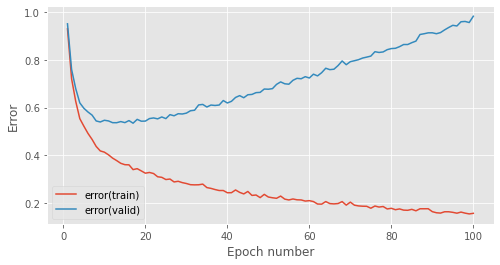

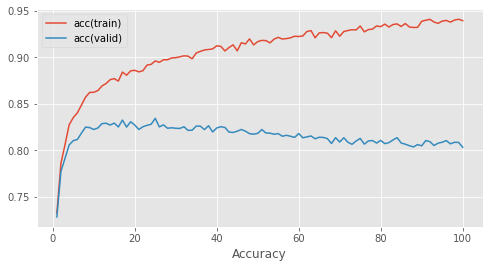

In [46]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# # Create model with ONE hidden layer
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

# Create model with ONE hidden layer with 32 ReluLayer

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
# _ = train_model_and_plot_stats(
#     model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [50]:
data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

# Use the created objects to initialise a new Optimiser instance.
optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)
stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.0s to complete
    error(train)=1.06e-01, acc(train)=9.58e-01, error(valid)=1.65e+00, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.1s to complete
    error(train)=9.80e-02, acc(train)=9.61e-01, error(valid)=1.65e+00, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.2s to complete
    error(train)=9.69e-02, acc(train)=9.62e-01, error(valid)=1.66e+00, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.2s to complete
    error(train)=9.06e-02, acc(train)=9.64e-01, error(valid)=1.66e+00, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.1s to complete
    error(train)=1.06e-01, acc(train)=9.58e-01, error(valid)=1.70e+00, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.1s to complete
    error(train)=9.70e-02, acc(train)=9.62e-01, error(valid)=1.68e+00, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.1s to complete
    error(train)=8.64e-02, acc(train)=9.66e-01, error(valid)=1.65e+00, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.1s to complete
    error(train)=1.03e-01, acc(train)=9.60e-01, error(valid)=1.72e+00, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.0s to complete
    error(train)=9.83e-02, acc(train)=9.61e-01, error(valid)=1.71e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.0s to complete
    error(train)=1.05e-01, acc(train)=9.59e-01, error(valid)=1.72e+00, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.0s to complete
    error(train)=9.45e-02, acc(train)=9.62e-01, error(valid)=1.71e+00, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.9s to complete
    error(train)=9.54e-02, acc(train)=9.63e-01, error(valid)=1.70e+00, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.9s to complete
    error(train)=9.26e-02, acc(train)=9.64e-01, error(valid)=1.72e+00, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.9s to complete
    error(train)=9.60e-02, acc(train)=9.62e-01, error(valid)=1.72e+00, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.0s to complete
    error(train)=9.08e-02, acc(train)=9.64e-01, error(valid)=1.73e+00, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.9s to complete
    error(train)=1.04e-01, acc(train)=9.59e-01, error(valid)=1.78e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.9s to complete
    error(train)=9.09e-02, acc(train)=9.64e-01, error(valid)=1.75e+00, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.0s to complete
    error(train)=1.00e-01, acc(train)=9.60e-01, error(valid)=1.76e+00, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.0s to complete
    error(train)=8.86e-02, acc(train)=9.65e-01, error(valid)=1.75e+00, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.0s to complete
    error(train)=8.41e-02, acc(train)=9.67e-01, error(valid)=1.75e+00, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.0s to complete
    error(train)=9.10e-02, acc(train)=9.65e-01, error(valid)=1.79e+00, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.0s to complete
    error(train)=8.55e-02, acc(train)=9.66e-01, error(valid)=1.77e+00, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.1s to complete
    error(train)=9.65e-02, acc(train)=9.62e-01, error(valid)=1.81e+00, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.0s to complete
    error(train)=1.02e-01, acc(train)=9.60e-01, error(valid)=1.82e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.0s to complete
    error(train)=9.18e-02, acc(train)=9.64e-01, error(valid)=1.81e+00, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.0s to complete
    error(train)=8.96e-02, acc(train)=9.64e-01, error(valid)=1.80e+00, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.0s to complete
    error(train)=8.47e-02, acc(train)=9.67e-01, error(valid)=1.80e+00, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.0s to complete
    error(train)=9.30e-02, acc(train)=9.63e-01, error(valid)=1.83e+00, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.1s to complete
    error(train)=9.75e-02, acc(train)=9.60e-01, error(valid)=1.85e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.0s to complete
    error(train)=9.02e-02, acc(train)=9.65e-01, error(valid)=1.83e+00, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.0s to complete
    error(train)=8.56e-02, acc(train)=9.67e-01, error(valid)=1.84e+00, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.0s to complete
    error(train)=8.51e-02, acc(train)=9.67e-01, error(valid)=1.82e+00, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.0s to complete
    error(train)=1.00e-01, acc(train)=9.59e-01, error(valid)=1.87e+00, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.9s to complete
    error(train)=8.45e-02, acc(train)=9.66e-01, error(valid)=1.84e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.0s to complete
    error(train)=8.92e-02, acc(train)=9.65e-01, error(valid)=1.85e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.0s to complete
    error(train)=8.88e-02, acc(train)=9.66e-01, error(valid)=1.88e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.9s to complete
    error(train)=9.62e-02, acc(train)=9.61e-01, error(valid)=1.87e+00, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.0s to complete
    error(train)=8.17e-02, acc(train)=9.68e-01, error(valid)=1.87e+00, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.0s to complete
    error(train)=9.22e-02, acc(train)=9.63e-01, error(valid)=1.89e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.0s to complete
    error(train)=8.55e-02, acc(train)=9.66e-01, error(valid)=1.89e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.0s to complete
    error(train)=9.30e-02, acc(train)=9.64e-01, error(valid)=1.91e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.0s to complete
    error(train)=8.61e-02, acc(train)=9.67e-01, error(valid)=1.91e+00, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.0s to complete
    error(train)=8.00e-02, acc(train)=9.68e-01, error(valid)=1.90e+00, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.0s to complete
    error(train)=9.49e-02, acc(train)=9.63e-01, error(valid)=1.93e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.0s to complete
    error(train)=8.80e-02, acc(train)=9.65e-01, error(valid)=1.92e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.0s to complete
    error(train)=7.92e-02, acc(train)=9.68e-01, error(valid)=1.91e+00, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.0s to complete
    error(train)=8.91e-02, acc(train)=9.64e-01, error(valid)=1.94e+00, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.0s to complete
    error(train)=8.90e-02, acc(train)=9.65e-01, error(valid)=1.94e+00, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.0s to complete
    error(train)=8.68e-02, acc(train)=9.66e-01, error(valid)=1.96e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.0s to complete
    error(train)=8.66e-02, acc(train)=9.66e-01, error(valid)=1.96e+00, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.1s to complete
    error(train)=9.60e-02, acc(train)=9.61e-01, error(valid)=1.95e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.0s to complete
    error(train)=8.40e-02, acc(train)=9.67e-01, error(valid)=1.95e+00, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.0s to complete
    error(train)=7.99e-02, acc(train)=9.69e-01, error(valid)=1.96e+00, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.9s to complete
    error(train)=8.13e-02, acc(train)=9.67e-01, error(valid)=1.98e+00, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.1s to complete
    error(train)=8.80e-02, acc(train)=9.66e-01, error(valid)=1.98e+00, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.1s to complete
    error(train)=8.40e-02, acc(train)=9.67e-01, error(valid)=1.98e+00, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.1s to complete
    error(train)=7.77e-02, acc(train)=9.69e-01, error(valid)=1.99e+00, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.1s to complete
    error(train)=8.73e-02, acc(train)=9.65e-01, error(valid)=2.00e+00, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.0s to complete
    error(train)=8.10e-02, acc(train)=9.68e-01, error(valid)=1.99e+00, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.0s to complete
    error(train)=8.47e-02, acc(train)=9.67e-01, error(valid)=2.01e+00, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.0s to complete
    error(train)=8.38e-02, acc(train)=9.67e-01, error(valid)=2.02e+00, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.1s to complete
    error(train)=7.45e-02, acc(train)=9.71e-01, error(valid)=2.02e+00, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.0s to complete
    error(train)=8.84e-02, acc(train)=9.65e-01, error(valid)=2.06e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.1s to complete
    error(train)=8.57e-02, acc(train)=9.67e-01, error(valid)=2.05e+00, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.0s to complete
    error(train)=8.73e-02, acc(train)=9.65e-01, error(valid)=2.05e+00, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.1s to complete
    error(train)=8.06e-02, acc(train)=9.68e-01, error(valid)=2.04e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.0s to complete
    error(train)=8.15e-02, acc(train)=9.68e-01, error(valid)=2.05e+00, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.0s to complete
    error(train)=8.77e-02, acc(train)=9.65e-01, error(valid)=2.06e+00, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.0s to complete
    error(train)=7.52e-02, acc(train)=9.71e-01, error(valid)=2.05e+00, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.1s to complete
    error(train)=9.34e-02, acc(train)=9.63e-01, error(valid)=2.10e+00, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.0s to complete
    error(train)=7.75e-02, acc(train)=9.70e-01, error(valid)=2.08e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.0s to complete
    error(train)=8.89e-02, acc(train)=9.65e-01, error(valid)=2.09e+00, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.0s to complete
    error(train)=7.83e-02, acc(train)=9.69e-01, error(valid)=2.09e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.0s to complete
    error(train)=8.11e-02, acc(train)=9.69e-01, error(valid)=2.11e+00, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.0s to complete
    error(train)=8.68e-02, acc(train)=9.66e-01, error(valid)=2.14e+00, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.9s to complete
    error(train)=7.90e-02, acc(train)=9.69e-01, error(valid)=2.12e+00, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.9s to complete
    error(train)=7.26e-02, acc(train)=9.71e-01, error(valid)=2.12e+00, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.9s to complete
    error(train)=7.41e-02, acc(train)=9.70e-01, error(valid)=2.10e+00, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.9s to complete
    error(train)=8.03e-02, acc(train)=9.68e-01, error(valid)=2.13e+00, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.9s to complete
    error(train)=7.58e-02, acc(train)=9.70e-01, error(valid)=2.14e+00, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.0s to complete
    error(train)=7.74e-02, acc(train)=9.69e-01, error(valid)=2.15e+00, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.9s to complete
    error(train)=7.45e-02, acc(train)=9.71e-01, error(valid)=2.14e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.9s to complete
    error(train)=7.76e-02, acc(train)=9.70e-01, error(valid)=2.12e+00, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.0s to complete
    error(train)=8.77e-02, acc(train)=9.65e-01, error(valid)=2.16e+00, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.0s to complete
    error(train)=7.83e-02, acc(train)=9.69e-01, error(valid)=2.16e+00, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.0s to complete
    error(train)=7.85e-02, acc(train)=9.69e-01, error(valid)=2.15e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.0s to complete
    error(train)=7.59e-02, acc(train)=9.71e-01, error(valid)=2.15e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.9s to complete
    error(train)=7.31e-02, acc(train)=9.71e-01, error(valid)=2.14e+00, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.9s to complete
    error(train)=8.14e-02, acc(train)=9.67e-01, error(valid)=2.19e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.9s to complete
    error(train)=8.78e-02, acc(train)=9.66e-01, error(valid)=2.19e+00, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.9s to complete
    error(train)=7.41e-02, acc(train)=9.70e-01, error(valid)=2.19e+00, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.9s to complete
    error(train)=8.63e-02, acc(train)=9.66e-01, error(valid)=2.20e+00, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.9s to complete
    error(train)=7.20e-02, acc(train)=9.72e-01, error(valid)=2.20e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.9s to complete
    error(train)=7.68e-02, acc(train)=9.70e-01, error(valid)=2.21e+00, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.9s to complete
    error(train)=8.44e-02, acc(train)=9.67e-01, error(valid)=2.24e+00, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.6s to complete
    error(train)=8.58e-02, acc(train)=9.65e-01, error(valid)=2.24e+00, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.6s to complete
    error(train)=7.15e-02, acc(train)=9.72e-01, error(valid)=2.20e+00, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.6s to complete
    error(train)=6.91e-02, acc(train)=9.73e-01, error(valid)=2.23e+00, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.6s to complete
    error(train)=7.08e-02, acc(train)=9.72e-01, error(valid)=2.24e+00, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.7s to complete
    error(train)=6.74e-02, acc(train)=9.74e-01, error(valid)=2.24e+00, acc(valid)=7.87e-01


In [51]:
# print(stats.shape)
# print(keys.shape)
min_error = 100000
min_error_index = 0
max_accuracy = 0
max_accuracy_index = 0
for i in range(100):
    if(stats[1:, keys['acc(valid)']][i]>max_accuracy):
        max_accuracy = stats[1:, keys['acc(valid)']][i]
        max_accuracy_index = i
        print('max acc '+str(stats[1:, keys['acc(valid)']][i]))
    if(stats[1:, keys['error(valid)']][i]<min_error):
        min_error = stats[1:, keys['error(valid)']][i]
        min_error_index = i
        print('min error' + str(stats[1:, keys['error(valid)']][i]))

print(min_error_index)
print(max_accuracy_index)
        
# print("original error(train):"+str(stats[1:, keys['error(train)']][99]))
# print("original error(valid):"+str(stats[1:, keys['error(valid)']][99]))
# print("original acc(train):"+str(stats[1:, keys['acc(train)']][99]))
# print("original acc(valid):"+str(stats[1:, keys['acc(valid)']][99]))

max acc 0.7936075949367088
min error1.6457426532722532
max acc 0.7946835443037975
max acc 0.7950632911392402
max acc 0.7958227848101267
0
6


In [4]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1

# 1-hidden layer networks by using either 32, 64 and 128 ReLU hidden units per layer on EMNIST.
input_dim, output_dim, hidden_dim_32 = 784, 47, 32
input_dim, output_dim, hidden_dim_64 = 784, 47, 64
input_dim, output_dim, hidden_dim_128 = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model_32 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim_32, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim_32, output_dim, weights_init, biases_init) # output layer
])

model_64 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim_64, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim_64, output_dim, weights_init, biases_init) # output layer
])

model_128 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim_128, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim_128, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)


# Plot the image about different ReLU hidden layer
data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
optimiser32 = Optimiser(model_32, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)
stats32, keys32, run_time = optimiser32.train(num_epochs=num_epochs, stats_interval=stats_interval)
optimiser64 = Optimiser(model_64, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)
stats64, keys64, run_time = optimiser64.train(num_epochs=num_epochs, stats_interval=stats_interval)
optimiser128 = Optimiser(model_128, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)
stats128, keys128, run_time = optimiser128.train(num_epochs=num_epochs, stats_interval=stats_interval)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.0s to complete
    error(train)=1.22e+00, acc(train)=6.61e-01, error(valid)=1.23e+00, acc(valid)=6.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 0.9s to complete
    error(train)=1.09e+00, acc(train)=6.93e-01, error(valid)=1.11e+00, acc(valid)=6.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 0.9s to complete
    error(train)=1.02e+00, acc(train)=7.15e-01, error(valid)=1.04e+00, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.0s to complete
    error(train)=9.65e-01, acc(train)=7.25e-01, error(valid)=9.93e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.0s to complete
    error(train)=9.17e-01, acc(train)=7.35e-01, error(valid)=9.51e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.0s to complete
    error(train)=8.85e-01, acc(train)=7.44e-01, error(valid)=9.20e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.0s to complete
    error(train)=8.61e-01, acc(train)=7.49e-01, error(valid)=9.04e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 0.9s to complete
    error(train)=8.39e-01, acc(train)=7.56e-01, error(valid)=8.81e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.0s to complete
    error(train)=8.17e-01, acc(train)=7.60e-01, error(valid)=8.63e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.0s to complete
    error(train)=8.02e-01, acc(train)=7.61e-01, error(valid)=8.45e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.0s to complete
    error(train)=7.89e-01, acc(train)=7.66e-01, error(valid)=8.37e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 0.9s to complete
    error(train)=7.70e-01, acc(train)=7.71e-01, error(valid)=8.23e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.0s to complete
    error(train)=7.62e-01, acc(train)=7.72e-01, error(valid)=8.17e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.0s to complete
    error(train)=7.53e-01, acc(train)=7.72e-01, error(valid)=8.14e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.0s to complete
    error(train)=7.34e-01, acc(train)=7.80e-01, error(valid)=7.96e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.0s to complete
    error(train)=7.27e-01, acc(train)=7.80e-01, error(valid)=7.89e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 0.9s to complete
    error(train)=7.19e-01, acc(train)=7.82e-01, error(valid)=7.82e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 0.9s to complete
    error(train)=7.02e-01, acc(train)=7.88e-01, error(valid)=7.64e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.0s to complete
    error(train)=7.01e-01, acc(train)=7.86e-01, error(valid)=7.66e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.0s to complete
    error(train)=6.97e-01, acc(train)=7.87e-01, error(valid)=7.65e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.0s to complete
    error(train)=6.88e-01, acc(train)=7.90e-01, error(valid)=7.55e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 0.9s to complete
    error(train)=6.78e-01, acc(train)=7.92e-01, error(valid)=7.47e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.0s to complete
    error(train)=6.78e-01, acc(train)=7.93e-01, error(valid)=7.48e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 0.9s to complete
    error(train)=6.70e-01, acc(train)=7.96e-01, error(valid)=7.43e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 0.9s to complete
    error(train)=6.66e-01, acc(train)=7.96e-01, error(valid)=7.41e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.0s to complete
    error(train)=6.68e-01, acc(train)=7.94e-01, error(valid)=7.42e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 0.9s to complete
    error(train)=6.62e-01, acc(train)=7.96e-01, error(valid)=7.34e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 0.9s to complete
    error(train)=6.54e-01, acc(train)=7.98e-01, error(valid)=7.27e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.0s to complete
    error(train)=6.53e-01, acc(train)=7.99e-01, error(valid)=7.31e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 0.9s to complete
    error(train)=6.49e-01, acc(train)=7.99e-01, error(valid)=7.25e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.0s to complete
    error(train)=6.52e-01, acc(train)=7.97e-01, error(valid)=7.33e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.0s to complete
    error(train)=6.41e-01, acc(train)=8.02e-01, error(valid)=7.18e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.0s to complete
    error(train)=6.41e-01, acc(train)=8.02e-01, error(valid)=7.19e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 0.9s to complete
    error(train)=6.38e-01, acc(train)=8.03e-01, error(valid)=7.22e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.3s to complete
    error(train)=6.41e-01, acc(train)=7.98e-01, error(valid)=7.27e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.3s to complete
    error(train)=6.31e-01, acc(train)=8.05e-01, error(valid)=7.18e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.3s to complete
    error(train)=6.26e-01, acc(train)=8.06e-01, error(valid)=7.12e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.3s to complete
    error(train)=6.30e-01, acc(train)=8.04e-01, error(valid)=7.19e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.3s to complete
    error(train)=6.27e-01, acc(train)=8.05e-01, error(valid)=7.15e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.3s to complete
    error(train)=6.25e-01, acc(train)=8.05e-01, error(valid)=7.15e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.3s to complete
    error(train)=6.23e-01, acc(train)=8.04e-01, error(valid)=7.13e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.3s to complete
    error(train)=6.18e-01, acc(train)=8.07e-01, error(valid)=7.11e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.3s to complete
    error(train)=6.16e-01, acc(train)=8.08e-01, error(valid)=7.09e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.3s to complete
    error(train)=6.12e-01, acc(train)=8.08e-01, error(valid)=7.08e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.3s to complete
    error(train)=6.13e-01, acc(train)=8.08e-01, error(valid)=7.12e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.3s to complete
    error(train)=6.13e-01, acc(train)=8.08e-01, error(valid)=7.10e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.3s to complete
    error(train)=6.11e-01, acc(train)=8.08e-01, error(valid)=7.14e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.3s to complete
    error(train)=6.04e-01, acc(train)=8.12e-01, error(valid)=7.04e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.3s to complete
    error(train)=6.08e-01, acc(train)=8.09e-01, error(valid)=7.10e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.3s to complete
    error(train)=6.09e-01, acc(train)=8.08e-01, error(valid)=7.17e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.3s to complete
    error(train)=6.01e-01, acc(train)=8.11e-01, error(valid)=7.06e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.3s to complete
    error(train)=6.05e-01, acc(train)=8.10e-01, error(valid)=7.11e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.3s to complete
    error(train)=6.02e-01, acc(train)=8.10e-01, error(valid)=7.10e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.3s to complete
    error(train)=6.04e-01, acc(train)=8.09e-01, error(valid)=7.14e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.3s to complete
    error(train)=5.97e-01, acc(train)=8.11e-01, error(valid)=7.04e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.3s to complete
    error(train)=5.95e-01, acc(train)=8.13e-01, error(valid)=7.07e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.3s to complete
    error(train)=6.03e-01, acc(train)=8.10e-01, error(valid)=7.12e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.3s to complete
    error(train)=5.96e-01, acc(train)=8.12e-01, error(valid)=7.08e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.3s to complete
    error(train)=5.96e-01, acc(train)=8.10e-01, error(valid)=7.11e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.3s to complete
    error(train)=5.92e-01, acc(train)=8.13e-01, error(valid)=7.08e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.3s to complete
    error(train)=5.86e-01, acc(train)=8.15e-01, error(valid)=7.01e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.3s to complete
    error(train)=5.88e-01, acc(train)=8.15e-01, error(valid)=7.03e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 0.9s to complete
    error(train)=5.91e-01, acc(train)=8.14e-01, error(valid)=7.07e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.0s to complete
    error(train)=5.92e-01, acc(train)=8.11e-01, error(valid)=7.12e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.0s to complete
    error(train)=5.87e-01, acc(train)=8.14e-01, error(valid)=7.04e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 0.9s to complete
    error(train)=5.80e-01, acc(train)=8.18e-01, error(valid)=6.98e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.3s to complete
    error(train)=5.90e-01, acc(train)=8.13e-01, error(valid)=7.07e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.3s to complete
    error(train)=5.78e-01, acc(train)=8.17e-01, error(valid)=6.98e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.3s to complete
    error(train)=5.79e-01, acc(train)=8.17e-01, error(valid)=7.02e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.3s to complete
    error(train)=5.81e-01, acc(train)=8.15e-01, error(valid)=7.04e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.3s to complete
    error(train)=5.91e-01, acc(train)=8.12e-01, error(valid)=7.19e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.3s to complete
    error(train)=5.75e-01, acc(train)=8.18e-01, error(valid)=7.00e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.3s to complete
    error(train)=5.76e-01, acc(train)=8.17e-01, error(valid)=7.05e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.3s to complete
    error(train)=5.80e-01, acc(train)=8.15e-01, error(valid)=7.12e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.3s to complete
    error(train)=5.71e-01, acc(train)=8.19e-01, error(valid)=6.95e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.3s to complete
    error(train)=5.75e-01, acc(train)=8.18e-01, error(valid)=7.06e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.3s to complete
    error(train)=5.72e-01, acc(train)=8.19e-01, error(valid)=7.04e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.3s to complete
    error(train)=5.76e-01, acc(train)=8.13e-01, error(valid)=7.08e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.3s to complete
    error(train)=5.72e-01, acc(train)=8.18e-01, error(valid)=7.06e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.3s to complete
    error(train)=5.65e-01, acc(train)=8.21e-01, error(valid)=7.01e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.3s to complete
    error(train)=5.64e-01, acc(train)=8.20e-01, error(valid)=6.98e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.3s to complete
    error(train)=5.65e-01, acc(train)=8.22e-01, error(valid)=7.03e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.3s to complete
    error(train)=5.73e-01, acc(train)=8.18e-01, error(valid)=7.11e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.3s to complete
    error(train)=5.63e-01, acc(train)=8.20e-01, error(valid)=7.00e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.3s to complete
    error(train)=5.62e-01, acc(train)=8.21e-01, error(valid)=7.02e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.3s to complete
    error(train)=5.77e-01, acc(train)=8.17e-01, error(valid)=7.16e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.3s to complete
    error(train)=5.57e-01, acc(train)=8.24e-01, error(valid)=6.96e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.3s to complete
    error(train)=5.62e-01, acc(train)=8.21e-01, error(valid)=7.04e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.3s to complete
    error(train)=5.61e-01, acc(train)=8.21e-01, error(valid)=7.00e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.3s to complete
    error(train)=5.71e-01, acc(train)=8.16e-01, error(valid)=7.11e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.3s to complete
    error(train)=5.63e-01, acc(train)=8.21e-01, error(valid)=7.03e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.3s to complete
    error(train)=5.64e-01, acc(train)=8.20e-01, error(valid)=7.10e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.3s to complete
    error(train)=5.64e-01, acc(train)=8.18e-01, error(valid)=7.10e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.3s to complete
    error(train)=5.51e-01, acc(train)=8.26e-01, error(valid)=6.98e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.3s to complete
    error(train)=5.56e-01, acc(train)=8.24e-01, error(valid)=7.05e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.3s to complete
    error(train)=5.61e-01, acc(train)=8.20e-01, error(valid)=7.08e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.3s to complete
    error(train)=5.57e-01, acc(train)=8.22e-01, error(valid)=7.08e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.3s to complete
    error(train)=5.57e-01, acc(train)=8.23e-01, error(valid)=7.03e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.3s to complete
    error(train)=5.62e-01, acc(train)=8.20e-01, error(valid)=7.11e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.3s to complete
    error(train)=5.54e-01, acc(train)=8.23e-01, error(valid)=7.07e-01, acc(valid)=7.87e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.2s to complete
    error(train)=1.07e+00, acc(train)=6.97e-01, error(valid)=1.09e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.2s to complete
    error(train)=8.94e-01, acc(train)=7.42e-01, error(valid)=9.20e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.2s to complete
    error(train)=8.02e-01, acc(train)=7.62e-01, error(valid)=8.41e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.3s to complete
    error(train)=7.30e-01, acc(train)=7.79e-01, error(valid)=7.74e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.2s to complete
    error(train)=6.84e-01, acc(train)=7.92e-01, error(valid)=7.34e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.2s to complete
    error(train)=6.42e-01, acc(train)=8.03e-01, error(valid)=6.99e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.3s to complete
    error(train)=6.15e-01, acc(train)=8.11e-01, error(valid)=6.74e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.2s to complete
    error(train)=6.00e-01, acc(train)=8.12e-01, error(valid)=6.66e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.2s to complete
    error(train)=5.80e-01, acc(train)=8.16e-01, error(valid)=6.51e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.2s to complete
    error(train)=5.64e-01, acc(train)=8.20e-01, error(valid)=6.39e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.2s to complete
    error(train)=5.46e-01, acc(train)=8.27e-01, error(valid)=6.27e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.2s to complete
    error(train)=5.38e-01, acc(train)=8.28e-01, error(valid)=6.27e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.2s to complete
    error(train)=5.25e-01, acc(train)=8.33e-01, error(valid)=6.18e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.3s to complete
    error(train)=5.10e-01, acc(train)=8.36e-01, error(valid)=6.03e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.3s to complete
    error(train)=5.04e-01, acc(train)=8.37e-01, error(valid)=6.03e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.3s to complete
    error(train)=5.01e-01, acc(train)=8.38e-01, error(valid)=6.09e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.2s to complete
    error(train)=4.88e-01, acc(train)=8.42e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.5s to complete
    error(train)=4.81e-01, acc(train)=8.43e-01, error(valid)=5.92e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.2s to complete
    error(train)=4.72e-01, acc(train)=8.45e-01, error(valid)=5.89e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.2s to complete
    error(train)=4.76e-01, acc(train)=8.45e-01, error(valid)=5.96e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.3s to complete
    error(train)=4.69e-01, acc(train)=8.44e-01, error(valid)=5.95e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.2s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=5.86e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.2s to complete
    error(train)=4.57e-01, acc(train)=8.51e-01, error(valid)=5.86e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.2s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.83e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.2s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=5.94e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.2s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=5.85e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.2s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=5.86e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.2s to complete
    error(train)=4.44e-01, acc(train)=8.52e-01, error(valid)=5.91e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.2s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=5.87e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.2s to complete
    error(train)=4.35e-01, acc(train)=8.56e-01, error(valid)=5.91e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.2s to complete
    error(train)=4.30e-01, acc(train)=8.56e-01, error(valid)=5.90e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.2s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.83e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.2s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.2s to complete
    error(train)=4.25e-01, acc(train)=8.57e-01, error(valid)=5.95e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.2s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.89e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.3s to complete
    error(train)=4.24e-01, acc(train)=8.58e-01, error(valid)=6.02e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.3s to complete
    error(train)=4.18e-01, acc(train)=8.63e-01, error(valid)=5.94e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.4s to complete
    error(train)=4.09e-01, acc(train)=8.64e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.3s to complete
    error(train)=4.20e-01, acc(train)=8.57e-01, error(valid)=6.02e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.3s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.94e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.3s to complete
    error(train)=4.05e-01, acc(train)=8.64e-01, error(valid)=5.96e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.2s to complete
    error(train)=4.01e-01, acc(train)=8.65e-01, error(valid)=5.97e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.2s to complete
    error(train)=4.07e-01, acc(train)=8.62e-01, error(valid)=6.04e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.2s to complete
    error(train)=4.06e-01, acc(train)=8.60e-01, error(valid)=6.09e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.2s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=5.98e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.3s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=5.98e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.3s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=6.02e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.3s to complete
    error(train)=3.99e-01, acc(train)=8.63e-01, error(valid)=6.09e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.3s to complete
    error(train)=3.95e-01, acc(train)=8.67e-01, error(valid)=6.06e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.2s to complete
    error(train)=3.92e-01, acc(train)=8.67e-01, error(valid)=6.09e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.3s to complete
    error(train)=3.88e-01, acc(train)=8.68e-01, error(valid)=6.11e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.3s to complete
    error(train)=3.87e-01, acc(train)=8.69e-01, error(valid)=6.08e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.3s to complete
    error(train)=3.93e-01, acc(train)=8.65e-01, error(valid)=6.18e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.2s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=6.20e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.3s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=6.15e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.2s to complete
    error(train)=3.82e-01, acc(train)=8.70e-01, error(valid)=6.11e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.2s to complete
    error(train)=3.79e-01, acc(train)=8.70e-01, error(valid)=6.12e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.3s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=6.13e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.2s to complete
    error(train)=3.84e-01, acc(train)=8.67e-01, error(valid)=6.20e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.2s to complete
    error(train)=3.75e-01, acc(train)=8.74e-01, error(valid)=6.10e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.3s to complete
    error(train)=3.70e-01, acc(train)=8.76e-01, error(valid)=6.07e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.2s to complete
    error(train)=3.79e-01, acc(train)=8.71e-01, error(valid)=6.27e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.4s to complete
    error(train)=3.79e-01, acc(train)=8.70e-01, error(valid)=6.25e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.4s to complete
    error(train)=3.78e-01, acc(train)=8.70e-01, error(valid)=6.30e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.4s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=6.26e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.4s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=6.20e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.3s to complete
    error(train)=3.74e-01, acc(train)=8.72e-01, error(valid)=6.31e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.2s to complete
    error(train)=3.69e-01, acc(train)=8.75e-01, error(valid)=6.30e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.2s to complete
    error(train)=3.60e-01, acc(train)=8.78e-01, error(valid)=6.21e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.2s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=6.35e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.5s to complete
    error(train)=3.60e-01, acc(train)=8.78e-01, error(valid)=6.24e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.3s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=6.38e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.6s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=6.36e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.2s to complete
    error(train)=3.63e-01, acc(train)=8.75e-01, error(valid)=6.37e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.3s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=6.35e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.3s to complete
    error(train)=3.60e-01, acc(train)=8.75e-01, error(valid)=6.34e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.3s to complete
    error(train)=3.57e-01, acc(train)=8.79e-01, error(valid)=6.32e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.3s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=6.36e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.3s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=6.35e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.3s to complete
    error(train)=3.60e-01, acc(train)=8.76e-01, error(valid)=6.47e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.3s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=6.38e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.5s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=6.51e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.5s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=6.47e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.3s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=6.48e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.3s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=6.49e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.2s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=6.49e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.2s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=6.60e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.2s to complete
    error(train)=3.41e-01, acc(train)=8.83e-01, error(valid)=6.42e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.2s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=6.53e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.2s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=6.56e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.2s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=6.57e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.3s to complete
    error(train)=3.44e-01, acc(train)=8.81e-01, error(valid)=6.58e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.3s to complete
    error(train)=3.47e-01, acc(train)=8.79e-01, error(valid)=6.64e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.3s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=6.69e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.2s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=6.57e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.3s to complete
    error(train)=3.49e-01, acc(train)=8.78e-01, error(valid)=6.70e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.3s to complete
    error(train)=3.40e-01, acc(train)=8.82e-01, error(valid)=6.67e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.2s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=6.64e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.2s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=6.63e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.3s to complete
    error(train)=3.36e-01, acc(train)=8.85e-01, error(valid)=6.60e-01, acc(valid)=8.11e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.1s to complete
    error(train)=9.14e-01, acc(train)=7.34e-01, error(valid)=9.34e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.1s to complete
    error(train)=7.10e-01, acc(train)=7.84e-01, error(valid)=7.45e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.8s to complete
    error(train)=6.07e-01, acc(train)=8.10e-01, error(valid)=6.51e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.8s to complete
    error(train)=5.55e-01, acc(train)=8.27e-01, error(valid)=6.12e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.8s to complete
    error(train)=5.07e-01, acc(train)=8.36e-01, error(valid)=5.78e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.8s to complete
    error(train)=4.74e-01, acc(train)=8.47e-01, error(valid)=5.51e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.9s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=5.49e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.1s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.0s to complete
    error(train)=4.19e-01, acc(train)=8.59e-01, error(valid)=5.30e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.9s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.0s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.1s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.2s to complete
    error(train)=3.80e-01, acc(train)=8.71e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.1s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.8s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.0s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.1s to complete
    error(train)=3.36e-01, acc(train)=8.83e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.1s to complete
    error(train)=3.33e-01, acc(train)=8.84e-01, error(valid)=5.23e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.1s to complete
    error(train)=3.22e-01, acc(train)=8.87e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.9s to complete
    error(train)=3.27e-01, acc(train)=8.85e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.0s to complete
    error(train)=3.15e-01, acc(train)=8.88e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.0s to complete
    error(train)=3.09e-01, acc(train)=8.91e-01, error(valid)=5.31e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.9s to complete
    error(train)=2.99e-01, acc(train)=8.96e-01, error(valid)=5.32e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.9s to complete
    error(train)=3.00e-01, acc(train)=8.94e-01, error(valid)=5.45e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.8s to complete
    error(train)=2.92e-01, acc(train)=8.97e-01, error(valid)=5.40e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.0s to complete
    error(train)=2.93e-01, acc(train)=8.96e-01, error(valid)=5.49e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.5s to complete
    error(train)=2.92e-01, acc(train)=8.96e-01, error(valid)=5.56e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.8s to complete
    error(train)=2.93e-01, acc(train)=8.95e-01, error(valid)=5.66e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.9s to complete
    error(train)=2.80e-01, acc(train)=9.00e-01, error(valid)=5.61e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.6s to complete
    error(train)=2.75e-01, acc(train)=9.01e-01, error(valid)=5.64e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.5s to complete
    error(train)=2.82e-01, acc(train)=8.97e-01, error(valid)=5.76e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.5s to complete
    error(train)=2.66e-01, acc(train)=9.05e-01, error(valid)=5.71e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.5s to complete
    error(train)=2.69e-01, acc(train)=9.02e-01, error(valid)=5.83e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.3s to complete
    error(train)=2.64e-01, acc(train)=9.04e-01, error(valid)=5.79e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.7s to complete
    error(train)=2.54e-01, acc(train)=9.09e-01, error(valid)=5.79e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.9s to complete
    error(train)=2.64e-01, acc(train)=9.04e-01, error(valid)=5.99e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.8s to complete
    error(train)=2.55e-01, acc(train)=9.08e-01, error(valid)=5.95e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.0s to complete
    error(train)=2.55e-01, acc(train)=9.08e-01, error(valid)=6.07e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.7s to complete
    error(train)=2.45e-01, acc(train)=9.11e-01, error(valid)=6.06e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.8s to complete
    error(train)=2.44e-01, acc(train)=9.10e-01, error(valid)=6.05e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.1s to complete
    error(train)=2.44e-01, acc(train)=9.10e-01, error(valid)=6.15e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.2s to complete
    error(train)=2.37e-01, acc(train)=9.13e-01, error(valid)=6.22e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.2s to complete
    error(train)=2.38e-01, acc(train)=9.11e-01, error(valid)=6.21e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.2s to complete
    error(train)=2.35e-01, acc(train)=9.13e-01, error(valid)=6.35e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.5s to complete
    error(train)=2.30e-01, acc(train)=9.15e-01, error(valid)=6.33e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.6s to complete
    error(train)=2.31e-01, acc(train)=9.14e-01, error(valid)=6.45e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.7s to complete
    error(train)=2.25e-01, acc(train)=9.18e-01, error(valid)=6.37e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.6s to complete
    error(train)=2.25e-01, acc(train)=9.17e-01, error(valid)=6.49e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.1s to complete
    error(train)=2.26e-01, acc(train)=9.17e-01, error(valid)=6.56e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.4s to complete
    error(train)=2.24e-01, acc(train)=9.16e-01, error(valid)=6.60e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.5s to complete
    error(train)=2.19e-01, acc(train)=9.18e-01, error(valid)=6.59e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.0s to complete
    error(train)=2.22e-01, acc(train)=9.17e-01, error(valid)=6.72e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.8s to complete
    error(train)=2.23e-01, acc(train)=9.17e-01, error(valid)=6.88e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.0s to complete
    error(train)=2.16e-01, acc(train)=9.19e-01, error(valid)=6.84e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.7s to complete
    error(train)=2.15e-01, acc(train)=9.20e-01, error(valid)=6.89e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.0s to complete
    error(train)=2.06e-01, acc(train)=9.23e-01, error(valid)=6.94e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.2s to complete
    error(train)=2.09e-01, acc(train)=9.23e-01, error(valid)=6.96e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.9s to complete
    error(train)=2.15e-01, acc(train)=9.18e-01, error(valid)=7.15e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.7s to complete
    error(train)=1.99e-01, acc(train)=9.26e-01, error(valid)=7.08e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.6s to complete
    error(train)=2.09e-01, acc(train)=9.22e-01, error(valid)=7.23e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.6s to complete
    error(train)=2.00e-01, acc(train)=9.26e-01, error(valid)=7.24e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.7s to complete
    error(train)=2.06e-01, acc(train)=9.21e-01, error(valid)=7.37e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.8s to complete
    error(train)=2.04e-01, acc(train)=9.22e-01, error(valid)=7.34e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.6s to complete
    error(train)=2.00e-01, acc(train)=9.23e-01, error(valid)=7.48e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.8s to complete
    error(train)=1.97e-01, acc(train)=9.25e-01, error(valid)=7.45e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.6s to complete
    error(train)=1.92e-01, acc(train)=9.28e-01, error(valid)=7.47e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.7s to complete
    error(train)=1.91e-01, acc(train)=9.27e-01, error(valid)=7.54e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.3s to complete
    error(train)=1.83e-01, acc(train)=9.31e-01, error(valid)=7.51e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.3s to complete
    error(train)=1.95e-01, acc(train)=9.25e-01, error(valid)=7.70e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.7s to complete
    error(train)=1.87e-01, acc(train)=9.30e-01, error(valid)=7.66e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.8s to complete
    error(train)=1.83e-01, acc(train)=9.31e-01, error(valid)=7.73e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.1s to complete
    error(train)=1.87e-01, acc(train)=9.30e-01, error(valid)=7.92e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.9s to complete
    error(train)=1.80e-01, acc(train)=9.32e-01, error(valid)=7.90e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.8s to complete
    error(train)=1.92e-01, acc(train)=9.26e-01, error(valid)=8.07e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.6s to complete
    error(train)=1.80e-01, acc(train)=9.32e-01, error(valid)=8.06e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.9s to complete
    error(train)=1.78e-01, acc(train)=9.33e-01, error(valid)=8.06e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.9s to complete
    error(train)=1.80e-01, acc(train)=9.31e-01, error(valid)=8.14e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.7s to complete
    error(train)=1.80e-01, acc(train)=9.31e-01, error(valid)=8.30e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.0s to complete
    error(train)=1.76e-01, acc(train)=9.33e-01, error(valid)=8.27e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.1s to complete
    error(train)=1.83e-01, acc(train)=9.29e-01, error(valid)=8.37e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.9s to complete
    error(train)=1.81e-01, acc(train)=9.31e-01, error(valid)=8.49e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.7s to complete
    error(train)=1.76e-01, acc(train)=9.32e-01, error(valid)=8.38e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.7s to complete
    error(train)=1.80e-01, acc(train)=9.31e-01, error(valid)=8.56e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.0s to complete
    error(train)=1.72e-01, acc(train)=9.34e-01, error(valid)=8.66e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.9s to complete
    error(train)=1.78e-01, acc(train)=9.31e-01, error(valid)=8.79e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.7s to complete
    error(train)=1.72e-01, acc(train)=9.34e-01, error(valid)=8.73e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.0s to complete
    error(train)=1.69e-01, acc(train)=9.35e-01, error(valid)=8.67e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.8s to complete
    error(train)=1.66e-01, acc(train)=9.36e-01, error(valid)=8.73e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.9s to complete
    error(train)=1.63e-01, acc(train)=9.38e-01, error(valid)=8.75e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.7s to complete
    error(train)=1.63e-01, acc(train)=9.38e-01, error(valid)=8.92e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.6s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=8.90e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.6s to complete
    error(train)=1.65e-01, acc(train)=9.37e-01, error(valid)=9.04e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.1s to complete
    error(train)=1.68e-01, acc(train)=9.35e-01, error(valid)=9.04e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.8s to complete
    error(train)=1.61e-01, acc(train)=9.37e-01, error(valid)=9.14e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.2s to complete
    error(train)=1.61e-01, acc(train)=9.38e-01, error(valid)=9.15e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.0s to complete
    error(train)=1.65e-01, acc(train)=9.35e-01, error(valid)=9.37e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.5s to complete
    error(train)=1.55e-01, acc(train)=9.42e-01, error(valid)=9.32e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.6s to complete
    error(train)=1.53e-01, acc(train)=9.41e-01, error(valid)=9.29e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.6s to complete
    error(train)=1.59e-01, acc(train)=9.37e-01, error(valid)=9.51e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.8s to complete
    error(train)=1.59e-01, acc(train)=9.39e-01, error(valid)=9.60e-01, acc(valid)=8.07e-01


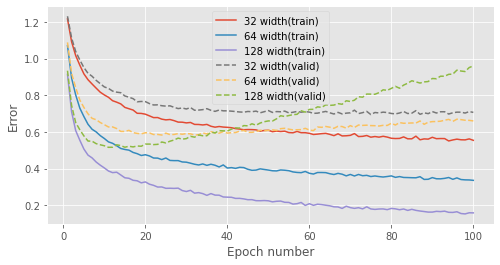

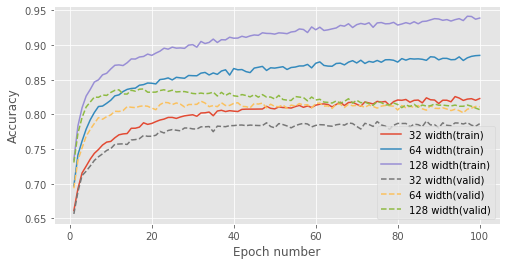

In [7]:
# Plot the change in the width
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for k in ['error(train)', 'error(valid)']:
    if(k == 'error(train)'):
        label = '(train)'
        ls='-'
    elif(k == 'error(valid)'):
        label = '(valid)'
        ls='--'
    ax_1.plot(np.arange(1, stats32.shape[0]) * stats_interval, 
              stats32[1:, keys32[k]], label="32 width"+label,linestyle=ls)
    ax_1.plot(np.arange(1, stats64.shape[0]) * stats_interval, 
              stats64[1:, keys64[k]], label="64 width"+label,linestyle=ls)
    ax_1.plot(np.arange(1, stats128.shape[0]) * stats_interval, 
              stats128[1:, keys128[k]], label="128 width"+label,linestyle=ls)
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')
ax_1.set_ylabel('Error')
fig_1.savefig('width error graph.png')

# Plot the change in the validation and training set accuracy over training.
fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)
for k in ['acc(train)', 'acc(valid)']:
    if(k == 'acc(train)'):
        label = '(train)'
        ls='-'
    elif(k == 'acc(valid)'):
        label = '(valid)'
        ls='--'
    ax_2.plot(np.arange(1, stats32.shape[0]) * stats_interval, 
              stats32[1:, keys32[k]], label='32 width'+label,linestyle=ls)
    ax_2.plot(np.arange(1, stats64.shape[0]) * stats_interval, 
              stats64[1:, keys64[k]], label='64 width'+label,linestyle=ls)
    ax_2.plot(np.arange(1, stats128.shape[0]) * stats_interval, 
              stats128[1:, keys128[k]], label='128 width'+label,linestyle=ls)
ax_2.legend(loc=0)
ax_2.set_xlabel('Epoch number')
ax_2.set_ylabel('Accuracy')
fig_2.savefig('width accuracy graph.png')

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.1s to complete
    error(train)=7.59e-01, acc(train)=7.69e-01, error(valid)=7.78e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.0s to complete
    error(train)=6.04e-01, acc(train)=8.07e-01, error(valid)=6.40e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.0s to complete
    error(train)=5.18e-01, acc(train)=8.29e-01, error(valid)=5.68e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.1s to complete
    error(train)=4.58e-01, acc(train)=8.47e-01, error(valid)=5.24e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.1s to complete
    error(train)=4.40e-01, acc(train)=8.49e-01, error(valid)=5.32e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.7s to complete
    error(train)=3.99e-01, acc(train)=8.60e-01, error(valid)=5.05e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.7s to complete
    error(train)=4.02e-01, acc(train)=8.58e-01, error(valid)=5.21e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.6s to complete
    error(train)=3.65e-01, acc(train)=8.71e-01, error(valid)=4.96e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.5s to complete
    error(train)=3.43e-01, acc(train)=8.79e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.6s to complete
    error(train)=3.34e-01, acc(train)=8.80e-01, error(valid)=4.98e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.7s to complete
    error(train)=3.17e-01, acc(train)=8.85e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.5s to complete
    error(train)=3.14e-01, acc(train)=8.86e-01, error(valid)=5.07e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.6s to complete
    error(train)=3.00e-01, acc(train)=8.88e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.6s to complete
    error(train)=2.89e-01, acc(train)=8.93e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.4s to complete
    error(train)=2.76e-01, acc(train)=8.97e-01, error(valid)=5.04e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.9s to complete
    error(train)=2.66e-01, acc(train)=9.00e-01, error(valid)=5.19e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.9s to complete
    error(train)=2.66e-01, acc(train)=9.01e-01, error(valid)=5.35e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.5s to complete
    error(train)=2.59e-01, acc(train)=9.03e-01, error(valid)=5.38e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.6s to complete
    error(train)=2.40e-01, acc(train)=9.08e-01, error(valid)=5.31e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.8s to complete
    error(train)=2.40e-01, acc(train)=9.08e-01, error(valid)=5.54e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.4s to complete
    error(train)=2.37e-01, acc(train)=9.09e-01, error(valid)=5.74e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.6s to complete
    error(train)=2.29e-01, acc(train)=9.12e-01, error(valid)=5.78e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.7s to complete
    error(train)=2.20e-01, acc(train)=9.14e-01, error(valid)=5.69e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.5s to complete
    error(train)=2.17e-01, acc(train)=9.14e-01, error(valid)=5.89e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.7s to complete
    error(train)=2.10e-01, acc(train)=9.17e-01, error(valid)=5.91e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.6s to complete
    error(train)=2.00e-01, acc(train)=9.21e-01, error(valid)=6.09e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.4s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=6.24e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.7s to complete
    error(train)=2.09e-01, acc(train)=9.15e-01, error(valid)=6.48e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.6s to complete
    error(train)=1.85e-01, acc(train)=9.27e-01, error(valid)=6.33e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.4s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=6.53e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.7s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=6.61e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.7s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=6.79e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.7s to complete
    error(train)=1.92e-01, acc(train)=9.21e-01, error(valid)=7.00e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.2s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=7.12e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.8s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=7.26e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.7s to complete
    error(train)=1.72e-01, acc(train)=9.29e-01, error(valid)=7.27e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.7s to complete
    error(train)=1.70e-01, acc(train)=9.29e-01, error(valid)=7.42e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.7s to complete
    error(train)=1.67e-01, acc(train)=9.31e-01, error(valid)=7.72e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.7s to complete
    error(train)=1.63e-01, acc(train)=9.34e-01, error(valid)=7.80e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.7s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=7.80e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.1s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=7.90e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.7s to complete
    error(train)=1.63e-01, acc(train)=9.33e-01, error(valid)=8.20e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.7s to complete
    error(train)=1.56e-01, acc(train)=9.36e-01, error(valid)=8.04e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.7s to complete
    error(train)=1.59e-01, acc(train)=9.33e-01, error(valid)=8.49e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.1s to complete
    error(train)=1.52e-01, acc(train)=9.37e-01, error(valid)=8.33e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.1s to complete
    error(train)=1.51e-01, acc(train)=9.37e-01, error(valid)=8.59e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.1s to complete
    error(train)=1.41e-01, acc(train)=9.41e-01, error(valid)=8.62e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.1s to complete
    error(train)=1.47e-01, acc(train)=9.38e-01, error(valid)=8.94e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.3s to complete
    error(train)=1.48e-01, acc(train)=9.38e-01, error(valid)=9.13e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.2s to complete
    error(train)=1.45e-01, acc(train)=9.40e-01, error(valid)=9.14e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.1s to complete
    error(train)=1.38e-01, acc(train)=9.43e-01, error(valid)=9.32e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.2s to complete
    error(train)=1.37e-01, acc(train)=9.43e-01, error(valid)=9.59e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.2s to complete
    error(train)=1.37e-01, acc(train)=9.43e-01, error(valid)=9.58e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.1s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=9.86e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.1s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=9.90e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.1s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=1.00e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.2s to complete
    error(train)=1.25e-01, acc(train)=9.48e-01, error(valid)=9.97e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.1s to complete
    error(train)=1.34e-01, acc(train)=9.44e-01, error(valid)=1.02e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.1s to complete
    error(train)=1.41e-01, acc(train)=9.43e-01, error(valid)=1.06e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.0s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=1.07e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.9s to complete
    error(train)=1.27e-01, acc(train)=9.47e-01, error(valid)=1.08e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.5s to complete
    error(train)=1.21e-01, acc(train)=9.49e-01, error(valid)=1.08e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.7s to complete
    error(train)=1.24e-01, acc(train)=9.48e-01, error(valid)=1.09e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.0s to complete
    error(train)=1.15e-01, acc(train)=9.53e-01, error(valid)=1.11e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.0s to complete
    error(train)=1.40e-01, acc(train)=9.43e-01, error(valid)=1.13e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.5s to complete
    error(train)=1.28e-01, acc(train)=9.45e-01, error(valid)=1.15e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.0s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=1.16e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.4s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=1.18e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.8s to complete
    error(train)=1.12e-01, acc(train)=9.53e-01, error(valid)=1.18e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.5s to complete
    error(train)=1.20e-01, acc(train)=9.50e-01, error(valid)=1.21e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.0s to complete
    error(train)=1.18e-01, acc(train)=9.53e-01, error(valid)=1.21e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.5s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.24e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.0s to complete
    error(train)=1.15e-01, acc(train)=9.54e-01, error(valid)=1.23e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.5s to complete
    error(train)=1.05e-01, acc(train)=9.56e-01, error(valid)=1.24e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.9s to complete
    error(train)=1.10e-01, acc(train)=9.55e-01, error(valid)=1.23e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.4s to complete
    error(train)=1.15e-01, acc(train)=9.53e-01, error(valid)=1.27e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.9s to complete
    error(train)=1.10e-01, acc(train)=9.53e-01, error(valid)=1.27e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.4s to complete
    error(train)=1.21e-01, acc(train)=9.51e-01, error(valid)=1.32e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.9s to complete
    error(train)=1.10e-01, acc(train)=9.54e-01, error(valid)=1.30e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.4s to complete
    error(train)=1.06e-01, acc(train)=9.56e-01, error(valid)=1.32e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.9s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=1.35e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.4s to complete
    error(train)=1.04e-01, acc(train)=9.57e-01, error(valid)=1.32e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.0s to complete
    error(train)=9.97e-02, acc(train)=9.58e-01, error(valid)=1.36e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.4s to complete
    error(train)=1.13e-01, acc(train)=9.54e-01, error(valid)=1.38e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.9s to complete
    error(train)=1.09e-01, acc(train)=9.57e-01, error(valid)=1.41e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.4s to complete
    error(train)=9.43e-02, acc(train)=9.62e-01, error(valid)=1.38e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.9s to complete
    error(train)=1.06e-01, acc(train)=9.57e-01, error(valid)=1.42e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.0s to complete
    error(train)=1.10e-01, acc(train)=9.55e-01, error(valid)=1.46e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.5s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=1.45e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.1s to complete
    error(train)=8.97e-02, acc(train)=9.63e-01, error(valid)=1.43e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.5s to complete
    error(train)=1.10e-01, acc(train)=9.55e-01, error(valid)=1.49e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.0s to complete
    error(train)=1.11e-01, acc(train)=9.57e-01, error(valid)=1.50e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.4s to complete
    error(train)=1.17e-01, acc(train)=9.54e-01, error(valid)=1.52e+00, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.0s to complete
    error(train)=1.02e-01, acc(train)=9.59e-01, error(valid)=1.53e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.4s to complete
    error(train)=1.10e-01, acc(train)=9.57e-01, error(valid)=1.51e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.9s to complete
    error(train)=1.11e-01, acc(train)=9.57e-01, error(valid)=1.54e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.4s to complete
    error(train)=9.53e-02, acc(train)=9.61e-01, error(valid)=1.55e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.0s to complete
    error(train)=1.15e-01, acc(train)=9.56e-01, error(valid)=1.59e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.5s to complete
    error(train)=8.99e-02, acc(train)=9.63e-01, error(valid)=1.58e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.0s to complete
    error(train)=1.04e-01, acc(train)=9.58e-01, error(valid)=1.56e+00, acc(valid)=8.12e-01


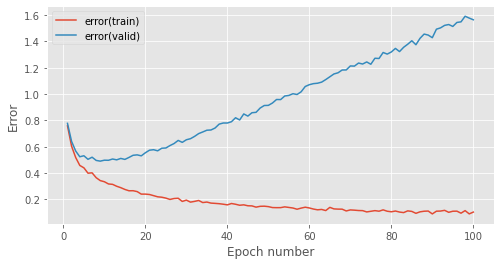

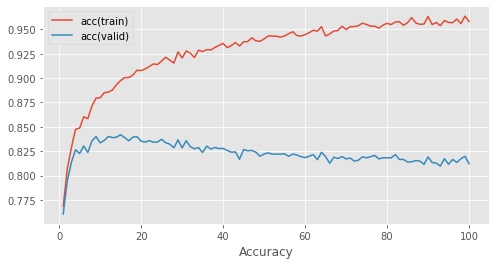

In [8]:
# Create model with TWO hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [9]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# # Create model with ONE hidden layer
model1 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])
# Create model with TWO hidden layers
model2 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])
# Create model with Three hidden layers
model3 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)
# Plot the image about different ReLU hidden layer
data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser1 = Optimiser(model1, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)
stats1, keys1, run_time = optimiser1.train(num_epochs=num_epochs, stats_interval=stats_interval)

optimiser2 = Optimiser(model2, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)
stats2, keys2, run_time = optimiser2.train(num_epochs=num_epochs, stats_interval=stats_interval)

optimiser3 = Optimiser(model3, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)
stats3, keys3, run_time = optimiser3.train(num_epochs=num_epochs, stats_interval=stats_interval)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.1s to complete
    error(train)=8.90e-01, acc(train)=7.43e-01, error(valid)=9.07e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.1s to complete
    error(train)=7.06e-01, acc(train)=7.86e-01, error(valid)=7.33e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.2s to complete
    error(train)=6.13e-01, acc(train)=8.12e-01, error(valid)=6.58e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.1s to complete
    error(train)=5.62e-01, acc(train)=8.23e-01, error(valid)=6.12e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.2s to complete
    error(train)=5.14e-01, acc(train)=8.33e-01, error(valid)=5.77e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.2s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.2s to complete
    error(train)=4.56e-01, acc(train)=8.52e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.3s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.3s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.2s to complete
    error(train)=4.09e-01, acc(train)=8.64e-01, error(valid)=5.30e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.3s to complete
    error(train)=3.91e-01, acc(train)=8.69e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.2s to complete
    error(train)=3.92e-01, acc(train)=8.65e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.3s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.3s to complete
    error(train)=3.64e-01, acc(train)=8.74e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.2s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.2s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.2s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=5.47e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.2s to complete
    error(train)=3.36e-01, acc(train)=8.85e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.3s to complete
    error(train)=3.31e-01, acc(train)=8.85e-01, error(valid)=5.32e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.3s to complete
    error(train)=3.23e-01, acc(train)=8.87e-01, error(valid)=5.36e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.2s to complete
    error(train)=3.19e-01, acc(train)=8.87e-01, error(valid)=5.41e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.2s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=5.40e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.2s to complete
    error(train)=3.10e-01, acc(train)=8.91e-01, error(valid)=5.50e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.2s to complete
    error(train)=3.09e-01, acc(train)=8.90e-01, error(valid)=5.50e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.2s to complete
    error(train)=3.00e-01, acc(train)=8.93e-01, error(valid)=5.54e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.3s to complete
    error(train)=2.95e-01, acc(train)=8.96e-01, error(valid)=5.58e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.3s to complete
    error(train)=2.94e-01, acc(train)=8.95e-01, error(valid)=5.63e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.2s to complete
    error(train)=2.81e-01, acc(train)=9.00e-01, error(valid)=5.59e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.2s to complete
    error(train)=2.86e-01, acc(train)=8.98e-01, error(valid)=5.78e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.2s to complete
    error(train)=2.79e-01, acc(train)=9.00e-01, error(valid)=5.82e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.2s to complete
    error(train)=2.81e-01, acc(train)=9.00e-01, error(valid)=5.88e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.1s to complete
    error(train)=2.73e-01, acc(train)=9.02e-01, error(valid)=5.83e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.1s to complete
    error(train)=2.72e-01, acc(train)=9.00e-01, error(valid)=5.85e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.1s to complete
    error(train)=2.64e-01, acc(train)=9.06e-01, error(valid)=5.88e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.1s to complete
    error(train)=2.62e-01, acc(train)=9.06e-01, error(valid)=5.97e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.1s to complete
    error(train)=2.66e-01, acc(train)=9.04e-01, error(valid)=6.07e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.1s to complete
    error(train)=2.52e-01, acc(train)=9.10e-01, error(valid)=5.96e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.1s to complete
    error(train)=2.57e-01, acc(train)=9.07e-01, error(valid)=6.16e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.0s to complete
    error(train)=2.51e-01, acc(train)=9.09e-01, error(valid)=6.16e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.6s to complete
    error(train)=2.46e-01, acc(train)=9.12e-01, error(valid)=6.17e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.0s to complete
    error(train)=2.51e-01, acc(train)=9.07e-01, error(valid)=6.27e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.0s to complete
    error(train)=2.44e-01, acc(train)=9.12e-01, error(valid)=6.29e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.7s to complete
    error(train)=2.45e-01, acc(train)=9.10e-01, error(valid)=6.38e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.9s to complete
    error(train)=2.37e-01, acc(train)=9.14e-01, error(valid)=6.36e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.0s to complete
    error(train)=2.42e-01, acc(train)=9.12e-01, error(valid)=6.52e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.7s to complete
    error(train)=2.33e-01, acc(train)=9.15e-01, error(valid)=6.44e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.0s to complete
    error(train)=2.33e-01, acc(train)=9.15e-01, error(valid)=6.50e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.0s to complete
    error(train)=2.45e-01, acc(train)=9.10e-01, error(valid)=6.77e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.6s to complete
    error(train)=2.26e-01, acc(train)=9.18e-01, error(valid)=6.53e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.9s to complete
    error(train)=2.27e-01, acc(train)=9.16e-01, error(valid)=6.70e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.1s to complete
    error(train)=2.20e-01, acc(train)=9.20e-01, error(valid)=6.69e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.7s to complete
    error(train)=2.19e-01, acc(train)=9.19e-01, error(valid)=6.70e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.1s to complete
    error(train)=2.14e-01, acc(train)=9.22e-01, error(valid)=6.72e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.1s to complete
    error(train)=2.24e-01, acc(train)=9.18e-01, error(valid)=6.97e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.7s to complete
    error(train)=2.16e-01, acc(train)=9.21e-01, error(valid)=6.95e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.0s to complete
    error(train)=2.19e-01, acc(train)=9.18e-01, error(valid)=7.05e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.1s to complete
    error(train)=2.23e-01, acc(train)=9.16e-01, error(valid)=7.21e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.7s to complete
    error(train)=2.08e-01, acc(train)=9.23e-01, error(valid)=7.13e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.0s to complete
    error(train)=2.13e-01, acc(train)=9.20e-01, error(valid)=7.26e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.1s to complete
    error(train)=2.11e-01, acc(train)=9.21e-01, error(valid)=7.32e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.7s to complete
    error(train)=2.01e-01, acc(train)=9.25e-01, error(valid)=7.21e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.0s to complete
    error(train)=2.06e-01, acc(train)=9.24e-01, error(valid)=7.46e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.1s to complete
    error(train)=2.08e-01, acc(train)=9.22e-01, error(valid)=7.53e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.7s to complete
    error(train)=2.05e-01, acc(train)=9.24e-01, error(valid)=7.56e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.9s to complete
    error(train)=2.02e-01, acc(train)=9.25e-01, error(valid)=7.57e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.0s to complete
    error(train)=2.03e-01, acc(train)=9.24e-01, error(valid)=7.67e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.7s to complete
    error(train)=2.00e-01, acc(train)=9.25e-01, error(valid)=7.67e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.0s to complete
    error(train)=1.90e-01, acc(train)=9.30e-01, error(valid)=7.63e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.9s to complete
    error(train)=1.95e-01, acc(train)=9.27e-01, error(valid)=7.84e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.7s to complete
    error(train)=1.93e-01, acc(train)=9.28e-01, error(valid)=7.73e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.0s to complete
    error(train)=1.88e-01, acc(train)=9.30e-01, error(valid)=7.81e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.0s to complete
    error(train)=1.87e-01, acc(train)=9.32e-01, error(valid)=7.84e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.6s to complete
    error(train)=1.89e-01, acc(train)=9.30e-01, error(valid)=7.93e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.0s to complete
    error(train)=1.81e-01, acc(train)=9.33e-01, error(valid)=8.03e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.0s to complete
    error(train)=1.88e-01, acc(train)=9.29e-01, error(valid)=8.14e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.6s to complete
    error(train)=1.83e-01, acc(train)=9.31e-01, error(valid)=8.20e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.9s to complete
    error(train)=1.82e-01, acc(train)=9.31e-01, error(valid)=8.15e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.9s to complete
    error(train)=1.96e-01, acc(train)=9.26e-01, error(valid)=8.45e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.6s to complete
    error(train)=1.74e-01, acc(train)=9.36e-01, error(valid)=8.21e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.1s to complete
    error(train)=1.80e-01, acc(train)=9.32e-01, error(valid)=8.53e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.0s to complete
    error(train)=1.80e-01, acc(train)=9.32e-01, error(valid)=8.46e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.7s to complete
    error(train)=1.86e-01, acc(train)=9.29e-01, error(valid)=8.73e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.9s to complete
    error(train)=1.80e-01, acc(train)=9.30e-01, error(valid)=8.65e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.9s to complete
    error(train)=1.77e-01, acc(train)=9.33e-01, error(valid)=8.72e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.7s to complete
    error(train)=1.77e-01, acc(train)=9.33e-01, error(valid)=8.76e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.8s to complete
    error(train)=1.73e-01, acc(train)=9.35e-01, error(valid)=8.71e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.6s to complete
    error(train)=1.80e-01, acc(train)=9.31e-01, error(valid)=9.05e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.0s to complete
    error(train)=1.79e-01, acc(train)=9.32e-01, error(valid)=9.04e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.6s to complete
    error(train)=1.68e-01, acc(train)=9.37e-01, error(valid)=8.92e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.0s to complete
    error(train)=1.65e-01, acc(train)=9.39e-01, error(valid)=9.01e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.6s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=9.09e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.0s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=9.21e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.7s to complete
    error(train)=1.75e-01, acc(train)=9.33e-01, error(valid)=9.33e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.0s to complete
    error(train)=1.64e-01, acc(train)=9.37e-01, error(valid)=9.26e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.6s to complete
    error(train)=1.64e-01, acc(train)=9.38e-01, error(valid)=9.41e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.0s to complete
    error(train)=1.61e-01, acc(train)=9.39e-01, error(valid)=9.47e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.6s to complete
    error(train)=1.55e-01, acc(train)=9.42e-01, error(valid)=9.38e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.9s to complete
    error(train)=1.60e-01, acc(train)=9.39e-01, error(valid)=9.55e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.6s to complete
    error(train)=1.58e-01, acc(train)=9.39e-01, error(valid)=9.57e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.9s to complete
    error(train)=1.60e-01, acc(train)=9.38e-01, error(valid)=9.65e-01, acc(valid)=8.10e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.4s to complete
    error(train)=7.31e-01, acc(train)=7.79e-01, error(valid)=7.55e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.3s to complete
    error(train)=5.97e-01, acc(train)=8.10e-01, error(valid)=6.42e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.4s to complete
    error(train)=5.03e-01, acc(train)=8.36e-01, error(valid)=5.62e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.3s to complete
    error(train)=4.66e-01, acc(train)=8.46e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.3s to complete
    error(train)=4.24e-01, acc(train)=8.56e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.0s to complete
    error(train)=4.17e-01, acc(train)=8.56e-01, error(valid)=5.20e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.9s to complete
    error(train)=3.77e-01, acc(train)=8.69e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.3s to complete
    error(train)=3.65e-01, acc(train)=8.71e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.3s to complete
    error(train)=3.44e-01, acc(train)=8.79e-01, error(valid)=4.93e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.2s to complete
    error(train)=3.20e-01, acc(train)=8.86e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.9s to complete
    error(train)=3.09e-01, acc(train)=8.88e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.2s to complete
    error(train)=3.07e-01, acc(train)=8.87e-01, error(valid)=4.98e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.6s to complete
    error(train)=3.00e-01, acc(train)=8.90e-01, error(valid)=5.07e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.6s to complete
    error(train)=2.76e-01, acc(train)=8.97e-01, error(valid)=5.04e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.4s to complete
    error(train)=2.73e-01, acc(train)=8.97e-01, error(valid)=5.16e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.4s to complete
    error(train)=2.72e-01, acc(train)=8.94e-01, error(valid)=5.20e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.4s to complete
    error(train)=2.50e-01, acc(train)=9.06e-01, error(valid)=5.18e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.3s to complete
    error(train)=2.65e-01, acc(train)=8.98e-01, error(valid)=5.48e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.2s to complete
    error(train)=2.42e-01, acc(train)=9.08e-01, error(valid)=5.50e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.6s to complete
    error(train)=2.34e-01, acc(train)=9.09e-01, error(valid)=5.44e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.0s to complete
    error(train)=2.31e-01, acc(train)=9.11e-01, error(valid)=5.45e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.1s to complete
    error(train)=2.17e-01, acc(train)=9.16e-01, error(valid)=5.58e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.6s to complete
    error(train)=2.24e-01, acc(train)=9.12e-01, error(valid)=5.90e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.0s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=5.89e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.9s to complete
    error(train)=2.10e-01, acc(train)=9.17e-01, error(valid)=5.96e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.9s to complete
    error(train)=1.93e-01, acc(train)=9.24e-01, error(valid)=5.95e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.8s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=6.16e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.9s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=6.31e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.9s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=6.35e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.9s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=6.46e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.8s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=6.63e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.0s to complete
    error(train)=1.83e-01, acc(train)=9.27e-01, error(valid)=6.77e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.9s to complete
    error(train)=1.72e-01, acc(train)=9.30e-01, error(valid)=6.87e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.9s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=7.05e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.9s to complete
    error(train)=1.74e-01, acc(train)=9.28e-01, error(valid)=7.23e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.8s to complete
    error(train)=1.90e-01, acc(train)=9.22e-01, error(valid)=7.55e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.0s to complete
    error(train)=1.64e-01, acc(train)=9.33e-01, error(valid)=7.47e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.9s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=7.38e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.9s to complete
    error(train)=1.88e-01, acc(train)=9.23e-01, error(valid)=8.31e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.8s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=7.83e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.8s to complete
    error(train)=1.62e-01, acc(train)=9.33e-01, error(valid)=7.93e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.8s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=8.15e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.8s to complete
    error(train)=1.59e-01, acc(train)=9.36e-01, error(valid)=8.13e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.8s to complete
    error(train)=1.54e-01, acc(train)=9.37e-01, error(valid)=8.51e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.8s to complete
    error(train)=1.44e-01, acc(train)=9.40e-01, error(valid)=8.46e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.8s to complete
    error(train)=1.39e-01, acc(train)=9.42e-01, error(valid)=8.48e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.0s to complete
    error(train)=1.50e-01, acc(train)=9.38e-01, error(valid)=8.95e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.0s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=8.77e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.8s to complete
    error(train)=1.38e-01, acc(train)=9.43e-01, error(valid)=8.98e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.9s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=9.26e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.8s to complete
    error(train)=1.38e-01, acc(train)=9.42e-01, error(valid)=9.42e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.9s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=9.51e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.8s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=9.52e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.9s to complete
    error(train)=1.29e-01, acc(train)=9.46e-01, error(valid)=9.77e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.8s to complete
    error(train)=1.31e-01, acc(train)=9.45e-01, error(valid)=9.62e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.8s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=9.72e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.8s to complete
    error(train)=1.21e-01, acc(train)=9.50e-01, error(valid)=1.02e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.9s to complete
    error(train)=1.37e-01, acc(train)=9.42e-01, error(valid)=1.04e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.9s to complete
    error(train)=1.28e-01, acc(train)=9.46e-01, error(valid)=1.05e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.9s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=1.05e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.9s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.06e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.8s to complete
    error(train)=1.35e-01, acc(train)=9.44e-01, error(valid)=1.09e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.9s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=1.08e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.8s to complete
    error(train)=1.22e-01, acc(train)=9.49e-01, error(valid)=1.11e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.8s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.09e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.9s to complete
    error(train)=1.11e-01, acc(train)=9.54e-01, error(valid)=1.10e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.9s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.14e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.9s to complete
    error(train)=1.08e-01, acc(train)=9.55e-01, error(valid)=1.14e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.9s to complete
    error(train)=1.35e-01, acc(train)=9.47e-01, error(valid)=1.20e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.9s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.19e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.9s to complete
    error(train)=1.15e-01, acc(train)=9.52e-01, error(valid)=1.20e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.9s to complete
    error(train)=1.13e-01, acc(train)=9.53e-01, error(valid)=1.22e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.9s to complete
    error(train)=1.10e-01, acc(train)=9.54e-01, error(valid)=1.24e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.0s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.25e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.0s to complete
    error(train)=1.07e-01, acc(train)=9.56e-01, error(valid)=1.23e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.9s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.26e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.9s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.28e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.9s to complete
    error(train)=1.10e-01, acc(train)=9.54e-01, error(valid)=1.29e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.9s to complete
    error(train)=1.14e-01, acc(train)=9.54e-01, error(valid)=1.34e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.9s to complete
    error(train)=1.02e-01, acc(train)=9.58e-01, error(valid)=1.33e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.9s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.34e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.9s to complete
    error(train)=1.12e-01, acc(train)=9.53e-01, error(valid)=1.37e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.9s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.37e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.9s to complete
    error(train)=1.05e-01, acc(train)=9.57e-01, error(valid)=1.36e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.9s to complete
    error(train)=1.06e-01, acc(train)=9.57e-01, error(valid)=1.38e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.8s to complete
    error(train)=1.11e-01, acc(train)=9.54e-01, error(valid)=1.40e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.8s to complete
    error(train)=8.97e-02, acc(train)=9.63e-01, error(valid)=1.37e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.8s to complete
    error(train)=9.99e-02, acc(train)=9.59e-01, error(valid)=1.43e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.8s to complete
    error(train)=1.04e-01, acc(train)=9.58e-01, error(valid)=1.46e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.8s to complete
    error(train)=1.17e-01, acc(train)=9.54e-01, error(valid)=1.50e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.8s to complete
    error(train)=1.07e-01, acc(train)=9.57e-01, error(valid)=1.48e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.9s to complete
    error(train)=1.07e-01, acc(train)=9.56e-01, error(valid)=1.47e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.8s to complete
    error(train)=8.93e-02, acc(train)=9.63e-01, error(valid)=1.44e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.9s to complete
    error(train)=9.62e-02, acc(train)=9.61e-01, error(valid)=1.51e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.8s to complete
    error(train)=1.14e-01, acc(train)=9.54e-01, error(valid)=1.51e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.9s to complete
    error(train)=1.09e-01, acc(train)=9.57e-01, error(valid)=1.52e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.9s to complete
    error(train)=9.52e-02, acc(train)=9.61e-01, error(valid)=1.53e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.9s to complete
    error(train)=9.64e-02, acc(train)=9.62e-01, error(valid)=1.55e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.8s to complete
    error(train)=9.59e-02, acc(train)=9.61e-01, error(valid)=1.55e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.8s to complete
    error(train)=9.87e-02, acc(train)=9.59e-01, error(valid)=1.57e+00, acc(valid)=8.16e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.2s to complete
    error(train)=6.80e-01, acc(train)=7.87e-01, error(valid)=7.08e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.2s to complete
    error(train)=5.65e-01, acc(train)=8.12e-01, error(valid)=6.18e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.2s to complete
    error(train)=4.76e-01, acc(train)=8.39e-01, error(valid)=5.51e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.4s to complete
    error(train)=4.33e-01, acc(train)=8.53e-01, error(valid)=5.21e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.4s to complete
    error(train)=4.00e-01, acc(train)=8.59e-01, error(valid)=4.98e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.4s to complete
    error(train)=3.73e-01, acc(train)=8.68e-01, error(valid)=4.86e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.3s to complete
    error(train)=3.58e-01, acc(train)=8.71e-01, error(valid)=4.91e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.3s to complete
    error(train)=3.35e-01, acc(train)=8.78e-01, error(valid)=4.84e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.3s to complete
    error(train)=3.24e-01, acc(train)=8.80e-01, error(valid)=4.87e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.4s to complete
    error(train)=3.12e-01, acc(train)=8.82e-01, error(valid)=4.85e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.3s to complete
    error(train)=3.06e-01, acc(train)=8.85e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.3s to complete
    error(train)=2.82e-01, acc(train)=8.94e-01, error(valid)=4.95e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.3s to complete
    error(train)=2.83e-01, acc(train)=8.91e-01, error(valid)=5.04e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.3s to complete
    error(train)=2.69e-01, acc(train)=8.98e-01, error(valid)=5.09e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.4s to complete
    error(train)=2.55e-01, acc(train)=9.01e-01, error(valid)=5.09e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.5s to complete
    error(train)=2.45e-01, acc(train)=9.05e-01, error(valid)=5.20e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.2s to complete
    error(train)=2.47e-01, acc(train)=9.04e-01, error(valid)=5.41e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.3s to complete
    error(train)=2.39e-01, acc(train)=9.06e-01, error(valid)=5.62e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.3s to complete
    error(train)=2.23e-01, acc(train)=9.12e-01, error(valid)=5.58e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.2s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=5.66e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.3s to complete
    error(train)=2.23e-01, acc(train)=9.11e-01, error(valid)=5.97e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.3s to complete
    error(train)=2.13e-01, acc(train)=9.14e-01, error(valid)=6.03e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.4s to complete
    error(train)=2.18e-01, acc(train)=9.12e-01, error(valid)=6.19e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.3s to complete
    error(train)=2.05e-01, acc(train)=9.15e-01, error(valid)=6.19e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.3s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=6.22e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.3s to complete
    error(train)=1.99e-01, acc(train)=9.19e-01, error(valid)=6.65e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.4s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=6.64e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.3s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=6.49e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.3s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=6.87e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.4s to complete
    error(train)=1.87e-01, acc(train)=9.23e-01, error(valid)=7.07e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.4s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=7.14e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.3s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=7.29e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.3s to complete
    error(train)=1.83e-01, acc(train)=9.25e-01, error(valid)=7.38e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.3s to complete
    error(train)=1.66e-01, acc(train)=9.31e-01, error(valid)=7.46e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.3s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=7.81e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.3s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=7.76e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.3s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=7.93e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.3s to complete
    error(train)=1.57e-01, acc(train)=9.35e-01, error(valid)=8.18e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.4s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=8.49e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.4s to complete
    error(train)=1.51e-01, acc(train)=9.37e-01, error(valid)=8.38e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.3s to complete
    error(train)=1.49e-01, acc(train)=9.38e-01, error(valid)=8.41e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.4s to complete
    error(train)=1.59e-01, acc(train)=9.33e-01, error(valid)=8.76e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.4s to complete
    error(train)=1.54e-01, acc(train)=9.37e-01, error(valid)=8.99e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.3s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=8.78e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.3s to complete
    error(train)=1.51e-01, acc(train)=9.39e-01, error(valid)=9.18e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.3s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=9.56e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.3s to complete
    error(train)=1.62e-01, acc(train)=9.33e-01, error(valid)=9.50e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.5s to complete
    error(train)=1.48e-01, acc(train)=9.40e-01, error(valid)=9.85e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.8s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=9.94e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.2s to complete
    error(train)=1.30e-01, acc(train)=9.46e-01, error(valid)=9.80e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.5s to complete
    error(train)=1.41e-01, acc(train)=9.41e-01, error(valid)=9.63e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.8s to complete
    error(train)=1.38e-01, acc(train)=9.42e-01, error(valid)=1.02e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.4s to complete
    error(train)=1.40e-01, acc(train)=9.43e-01, error(valid)=1.04e+00, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.5s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=1.03e+00, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.8s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=1.08e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.2s to complete
    error(train)=1.34e-01, acc(train)=9.46e-01, error(valid)=1.06e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.4s to complete
    error(train)=1.29e-01, acc(train)=9.48e-01, error(valid)=1.08e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.9s to complete
    error(train)=1.63e-01, acc(train)=9.36e-01, error(valid)=1.14e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.4s to complete
    error(train)=1.27e-01, acc(train)=9.48e-01, error(valid)=1.10e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.5s to complete
    error(train)=1.32e-01, acc(train)=9.47e-01, error(valid)=1.13e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.8s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=1.15e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.3s to complete
    error(train)=1.30e-01, acc(train)=9.48e-01, error(valid)=1.18e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.7s to complete
    error(train)=1.50e-01, acc(train)=9.41e-01, error(valid)=1.18e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.8s to complete
    error(train)=1.70e-01, acc(train)=9.37e-01, error(valid)=1.25e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.3s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=1.19e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.5s to complete
    error(train)=1.21e-01, acc(train)=9.51e-01, error(valid)=1.22e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.9s to complete
    error(train)=1.30e-01, acc(train)=9.48e-01, error(valid)=1.21e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.2s to complete
    error(train)=1.26e-01, acc(train)=9.50e-01, error(valid)=1.23e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.4s to complete
    error(train)=1.36e-01, acc(train)=9.47e-01, error(valid)=1.27e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.0s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.26e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.4s to complete
    error(train)=1.28e-01, acc(train)=9.49e-01, error(valid)=1.25e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.4s to complete
    error(train)=1.30e-01, acc(train)=9.50e-01, error(valid)=1.29e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.8s to complete
    error(train)=1.22e-01, acc(train)=9.51e-01, error(valid)=1.31e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.2s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.30e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.4s to complete
    error(train)=1.29e-01, acc(train)=9.49e-01, error(valid)=1.35e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.7s to complete
    error(train)=1.30e-01, acc(train)=9.50e-01, error(valid)=1.37e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.3s to complete
    error(train)=1.30e-01, acc(train)=9.48e-01, error(valid)=1.36e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.6s to complete
    error(train)=1.22e-01, acc(train)=9.53e-01, error(valid)=1.40e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.8s to complete
    error(train)=1.01e-01, acc(train)=9.58e-01, error(valid)=1.36e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.5s to complete
    error(train)=1.13e-01, acc(train)=9.55e-01, error(valid)=1.41e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.8s to complete
    error(train)=1.23e-01, acc(train)=9.51e-01, error(valid)=1.43e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.5s to complete
    error(train)=1.10e-01, acc(train)=9.57e-01, error(valid)=1.41e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.9s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=1.46e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.6s to complete
    error(train)=1.16e-01, acc(train)=9.55e-01, error(valid)=1.42e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.9s to complete
    error(train)=1.14e-01, acc(train)=9.55e-01, error(valid)=1.44e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.6s to complete
    error(train)=1.18e-01, acc(train)=9.54e-01, error(valid)=1.51e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.9s to complete
    error(train)=1.22e-01, acc(train)=9.53e-01, error(valid)=1.52e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.4s to complete
    error(train)=1.12e-01, acc(train)=9.56e-01, error(valid)=1.51e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.8s to complete
    error(train)=1.20e-01, acc(train)=9.54e-01, error(valid)=1.53e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.5s to complete
    error(train)=1.01e-01, acc(train)=9.60e-01, error(valid)=1.54e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.8s to complete
    error(train)=1.12e-01, acc(train)=9.57e-01, error(valid)=1.58e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.5s to complete
    error(train)=1.06e-01, acc(train)=9.58e-01, error(valid)=1.54e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.9s to complete
    error(train)=1.21e-01, acc(train)=9.54e-01, error(valid)=1.57e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.6s to complete
    error(train)=1.06e-01, acc(train)=9.59e-01, error(valid)=1.57e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.8s to complete
    error(train)=1.30e-01, acc(train)=9.52e-01, error(valid)=1.65e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.6s to complete
    error(train)=1.21e-01, acc(train)=9.53e-01, error(valid)=1.60e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.9s to complete
    error(train)=1.34e-01, acc(train)=9.51e-01, error(valid)=1.69e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.5s to complete
    error(train)=1.01e-01, acc(train)=9.62e-01, error(valid)=1.59e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.8s to complete
    error(train)=1.05e-01, acc(train)=9.59e-01, error(valid)=1.67e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.5s to complete
    error(train)=1.17e-01, acc(train)=9.57e-01, error(valid)=1.69e+00, acc(valid)=8.19e-01


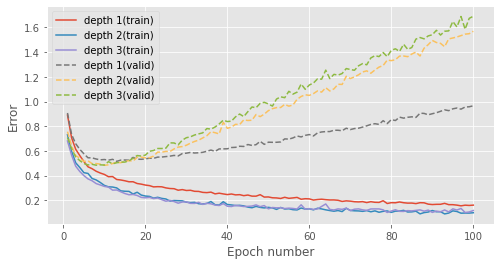

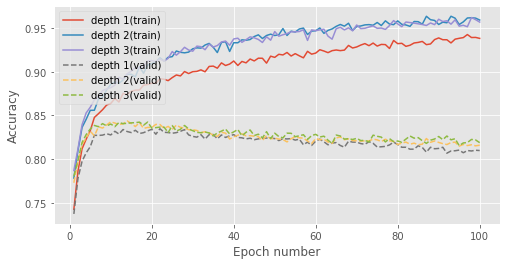

In [11]:
# Plot the change in the depth
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for k in ['error(train)', 'error(valid)']:
    if(k == 'error(train)'):
        label = '(train)'
        ls='-'
    elif(k == 'error(valid)'):
        label = '(valid)'
        ls='--'
    ax_1.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
              stats1[1:, keys1[k]], label="depth 1"+label,linestyle=ls)
    ax_1.plot(np.arange(1, stats2.shape[0]) * stats_interval, 
              stats2[1:, keys2[k]], label="depth 2"+label,linestyle=ls)
    ax_1.plot(np.arange(1, stats3.shape[0]) * stats_interval, 
              stats3[1:, keys3[k]], label="depth 3"+label,linestyle=ls)
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')
ax_1.set_ylabel('Error')
fig_1.savefig('depth error graph.png')

# Plot the change in the validation and training set accuracy over training.
fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)
for k in ['acc(train)', 'acc(valid)']:
    if(k == 'acc(train)'):
        label = '(train)'
        ls='-'
    elif(k == 'acc(valid)'):
        label = '(valid)'
        ls='--'
    ax_2.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
              stats1[1:, keys1[k]], label='depth 1'+label,linestyle=ls)
    ax_2.plot(np.arange(1, stats64.shape[0]) * stats_interval, 
              stats2[1:, keys2[k]], label='depth 2'+label,linestyle=ls)
    ax_2.plot(np.arange(1, stats128.shape[0]) * stats_interval, 
              stats3[1:, keys3[k]], label='depth 3'+label,linestyle=ls)
ax_2.legend(loc=0)
ax_2.set_xlabel('Epoch number')
ax_2.set_ylabel('Accuracy')
fig_2.savefig('depth accuracy graph.png')

In [32]:
# print the error(train),error(valid),acc(train),acc(valid) when the epoch is 100
print("depth 1 error(train):"+str(stats1[1:, keys1['error(train)']][99]))
print("depth 1 error(valid):"+str(stats1[1:, keys1['error(valid)']][99]))
print("depth 1 acc(train):"+str(stats1[1:, keys1['acc(train)']][99]))
print("depth 1 acc(valid):"+str(stats1[1:, keys1['acc(valid)']][99]))
print()
print("depth 2 error(train):"+str(stats2[1:, keys2['error(train)']][99]))
print("depth 2 error(valid):"+str(stats2[1:, keys2['error(valid)']][99]))
print("depth 2 acc(train):"+str(stats2[1:, keys2['acc(train)']][99]))
print("depth 2 acc(valid):"+str(stats2[1:, keys2['acc(valid)']][99]))
print()
print("depth 3 error(train):"+str(stats3[1:, keys3['error(train)']][99]))
print("depth 3 error(valid):"+str(stats3[1:, keys3['error(valid)']][99]))
print("depth 3 acc(train):"+str(stats3[1:, keys3['acc(train)']][99]))
print("depth 3 acc(valid):"+str(stats3[1:, keys3['acc(valid)']][99]))
print()
print("width 32 error(train):"+str(stats32[1:, keys32['error(train)']][99]))
print("width 32 error(valid):"+str(stats32[1:, keys32['error(valid)']][99]))
print("width 32 acc(train):"+str(stats32[1:, keys32['acc(train)']][99]))
print("width 32 acc(valid):"+str(stats32[1:, keys32['acc(valid)']][99]))
print()
print("width 64 error(train):"+str(stats64[1:, keys64['error(train)']][99]))
print("width 64 error(valid):"+str(stats64[1:, keys64['error(valid)']][99]))
print("width 64 acc(train):"+str(stats64[1:, keys64['acc(train)']][99]))
print("width 64 acc(valid):"+str(stats64[1:, keys64['acc(valid)']][99]))
print()
print("width 128 error(train):"+str(stats128[1:, keys128['error(train)']][99]))
print("width 128 error(valid):"+str(stats128[1:, keys128['error(valid)']][99]))
print("width 128 acc(train):"+str(stats128[1:, keys128['acc(train)']][99]))
print("width 128 acc(valid):"+str(stats128[1:, keys128['acc(valid)']][99]))

depth 1 error(train):0.16043553559128956
depth 1 error(valid):0.9654086035877448
depth 1 acc(train):0.9380100000000033
depth 1 acc(valid):0.8099999999999998

depth 2 error(train):0.09874747564151264
depth 2 error(valid):1.5692742280384844
depth 2 acc(train):0.9589400000000117
depth 2 acc(valid):0.8160759493670886

depth 3 error(train):0.11668713481202855
depth 3 error(valid):1.6909950453470295
depth 3 acc(train):0.9565800000000115
depth 3 acc(valid):0.8189873417721519

width 32 error(train):0.5542632593507483
width 32 error(valid):0.7067390419333126
width 32 acc(train):0.8228900000000003
width 32 acc(valid):0.7865822784810124

width 64 error(train):0.33593977853136936
width 64 error(valid):0.6601339678303024
width 64 acc(train):0.885179999999998
width 64 acc(valid):0.8110759493670888

width 128 error(train):0.15852678449490976
width 128 error(valid):0.9601693672560502
width 128 acc(train):0.9390900000000045
width 128 acc(valid):0.8069620253164558


In [8]:
# Section-2

In [28]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty
import os
os.environ['MLP_DATA_DIR']='F:\MLP\mlpractical\data'
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider


# Setup hyperparameters
learning_rate = 1e-4 # Adam optimizer with a learning rate of 10−4 as specified in the template
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

weight_penalty = L2Penalty(5e-3)
biases_penalty = L2Penalty(5e-3)
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# Create model with Three hidden layers with 128 ReLU hidden units
model3 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weight_penalty,biases_penalty), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weight_penalty,biases_penalty), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weight_penalty,biases_penalty), # third hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# _ = train_model_and_plot_stats(
#     model3, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)


# As well as monitoring the error over training also monitor classification
# accuracy i.e. proportion of most-probable predicted classes being equal to targets
data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

# Use the created objects to initialise a new Optimiser instance.
optimiser = Optimiser(model3, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)

# Run the optimiser for num_epochs epochs (full passes through the training set)
# printing statistics every epoch.
stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D28F50A6B0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D28F66F640>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.6s to complete
    error(train)=1.39e+00, acc(train)=6.16e-01, error(valid)=1.39e+00, acc(valid)=6.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.6s to complete
    error(train)=1.18e+00, acc(train)=6.71e-01, error(valid)=1.19e+00, acc(valid)=6.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.6s to complete
    error(train)=1.07e+00, acc(train)=6.98e-01, error(valid)=1.08e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.5s to complete
    error(train)=9.84e-01, acc(train)=7.20e-01, error(valid)=9.93e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.6s to complete
    error(train)=9.22e-01, acc(train)=7.35e-01, error(valid)=9.32e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.5s to complete
    error(train)=8.75e-01, acc(train)=7.47e-01, error(valid)=8.86e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.6s to complete
    error(train)=8.36e-01, acc(train)=7.57e-01, error(valid)=8.48e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.7s to complete
    error(train)=8.03e-01, acc(train)=7.65e-01, error(valid)=8.15e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.8s to complete
    error(train)=7.79e-01, acc(train)=7.73e-01, error(valid)=7.91e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.7s to complete
    error(train)=7.57e-01, acc(train)=7.78e-01, error(valid)=7.70e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.8s to complete
    error(train)=7.40e-01, acc(train)=7.82e-01, error(valid)=7.55e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.9s to complete
    error(train)=7.24e-01, acc(train)=7.85e-01, error(valid)=7.39e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.9s to complete
    error(train)=7.09e-01, acc(train)=7.90e-01, error(valid)=7.24e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.1s to complete
    error(train)=6.96e-01, acc(train)=7.92e-01, error(valid)=7.11e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.8s to complete
    error(train)=6.86e-01, acc(train)=7.96e-01, error(valid)=7.00e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.4s to complete
    error(train)=6.77e-01, acc(train)=7.97e-01, error(valid)=6.92e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.3s to complete
    error(train)=6.69e-01, acc(train)=7.99e-01, error(valid)=6.85e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 10.7s to complete
    error(train)=6.60e-01, acc(train)=8.01e-01, error(valid)=6.76e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 9.9s to complete
    error(train)=6.54e-01, acc(train)=8.01e-01, error(valid)=6.73e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.7s to complete
    error(train)=6.44e-01, acc(train)=8.08e-01, error(valid)=6.62e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.1s to complete
    error(train)=6.32e-01, acc(train)=8.10e-01, error(valid)=6.48e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.5s to complete
    error(train)=6.29e-01, acc(train)=8.09e-01, error(valid)=6.48e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.2s to complete
    error(train)=6.21e-01, acc(train)=8.13e-01, error(valid)=6.40e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.0s to complete
    error(train)=6.16e-01, acc(train)=8.13e-01, error(valid)=6.35e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.0s to complete
    error(train)=6.09e-01, acc(train)=8.16e-01, error(valid)=6.29e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.0s to complete
    error(train)=6.00e-01, acc(train)=8.17e-01, error(valid)=6.20e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.9s to complete
    error(train)=6.00e-01, acc(train)=8.19e-01, error(valid)=6.20e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.0s to complete
    error(train)=5.95e-01, acc(train)=8.19e-01, error(valid)=6.18e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.0s to complete
    error(train)=5.89e-01, acc(train)=8.22e-01, error(valid)=6.10e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.3s to complete
    error(train)=5.86e-01, acc(train)=8.21e-01, error(valid)=6.09e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.1s to complete
    error(train)=5.78e-01, acc(train)=8.24e-01, error(valid)=6.00e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.8s to complete
    error(train)=5.73e-01, acc(train)=8.26e-01, error(valid)=5.95e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.1s to complete
    error(train)=5.73e-01, acc(train)=8.26e-01, error(valid)=5.96e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.3s to complete
    error(train)=5.69e-01, acc(train)=8.27e-01, error(valid)=5.92e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.7s to complete
    error(train)=5.62e-01, acc(train)=8.29e-01, error(valid)=5.87e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.2s to complete
    error(train)=5.57e-01, acc(train)=8.29e-01, error(valid)=5.84e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.0s to complete
    error(train)=5.57e-01, acc(train)=8.30e-01, error(valid)=5.82e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.1s to complete
    error(train)=5.51e-01, acc(train)=8.30e-01, error(valid)=5.77e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.9s to complete
    error(train)=5.50e-01, acc(train)=8.31e-01, error(valid)=5.76e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.9s to complete
    error(train)=5.44e-01, acc(train)=8.33e-01, error(valid)=5.70e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.1s to complete
    error(train)=5.42e-01, acc(train)=8.33e-01, error(valid)=5.70e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.1s to complete
    error(train)=5.39e-01, acc(train)=8.36e-01, error(valid)=5.64e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.0s to complete
    error(train)=5.37e-01, acc(train)=8.34e-01, error(valid)=5.65e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.9s to complete
    error(train)=5.35e-01, acc(train)=8.35e-01, error(valid)=5.62e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.9s to complete
    error(train)=5.32e-01, acc(train)=8.36e-01, error(valid)=5.61e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.9s to complete
    error(train)=5.32e-01, acc(train)=8.35e-01, error(valid)=5.62e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.0s to complete
    error(train)=5.27e-01, acc(train)=8.36e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.9s to complete
    error(train)=5.27e-01, acc(train)=8.37e-01, error(valid)=5.58e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.8s to complete
    error(train)=5.31e-01, acc(train)=8.37e-01, error(valid)=5.61e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.9s to complete
    error(train)=5.26e-01, acc(train)=8.38e-01, error(valid)=5.54e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.9s to complete
    error(train)=5.16e-01, acc(train)=8.40e-01, error(valid)=5.46e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.8s to complete
    error(train)=5.13e-01, acc(train)=8.42e-01, error(valid)=5.45e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.0s to complete
    error(train)=5.17e-01, acc(train)=8.39e-01, error(valid)=5.48e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.8s to complete
    error(train)=5.13e-01, acc(train)=8.42e-01, error(valid)=5.44e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.9s to complete
    error(train)=5.16e-01, acc(train)=8.40e-01, error(valid)=5.50e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.1s to complete
    error(train)=5.11e-01, acc(train)=8.42e-01, error(valid)=5.43e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.4s to complete
    error(train)=5.07e-01, acc(train)=8.42e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.2s to complete
    error(train)=5.10e-01, acc(train)=8.41e-01, error(valid)=5.43e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.2s to complete
    error(train)=5.02e-01, acc(train)=8.44e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.6s to complete
    error(train)=5.02e-01, acc(train)=8.43e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.2s to complete
    error(train)=5.03e-01, acc(train)=8.43e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.2s to complete
    error(train)=5.00e-01, acc(train)=8.44e-01, error(valid)=5.36e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.4s to complete
    error(train)=5.00e-01, acc(train)=8.43e-01, error(valid)=5.36e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.2s to complete
    error(train)=4.97e-01, acc(train)=8.44e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.3s to complete
    error(train)=5.00e-01, acc(train)=8.45e-01, error(valid)=5.36e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.6s to complete
    error(train)=4.98e-01, acc(train)=8.43e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.5s to complete
    error(train)=4.91e-01, acc(train)=8.45e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.3s to complete
    error(train)=4.92e-01, acc(train)=8.45e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.3s to complete
    error(train)=4.89e-01, acc(train)=8.47e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.2s to complete
    error(train)=4.89e-01, acc(train)=8.47e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.4s to complete
    error(train)=4.85e-01, acc(train)=8.49e-01, error(valid)=5.21e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.8s to complete
    error(train)=4.83e-01, acc(train)=8.49e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.9s to complete
    error(train)=4.84e-01, acc(train)=8.48e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.7s to complete
    error(train)=4.85e-01, acc(train)=8.48e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.7s to complete
    error(train)=4.81e-01, acc(train)=8.48e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.8s to complete
    error(train)=4.83e-01, acc(train)=8.49e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.6s to complete
    error(train)=4.77e-01, acc(train)=8.50e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.9s to complete
    error(train)=4.75e-01, acc(train)=8.51e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.7s to complete
    error(train)=4.78e-01, acc(train)=8.50e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.5s to complete
    error(train)=4.83e-01, acc(train)=8.48e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.8s to complete
    error(train)=4.80e-01, acc(train)=8.48e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.9s to complete
    error(train)=4.70e-01, acc(train)=8.52e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.6s to complete
    error(train)=4.71e-01, acc(train)=8.50e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.8s to complete
    error(train)=4.76e-01, acc(train)=8.49e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.8s to complete
    error(train)=4.67e-01, acc(train)=8.54e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.6s to complete
    error(train)=4.72e-01, acc(train)=8.52e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.8s to complete
    error(train)=4.66e-01, acc(train)=8.53e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.8s to complete
    error(train)=4.69e-01, acc(train)=8.52e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 5.5s to complete
    error(train)=4.69e-01, acc(train)=8.52e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.8s to complete
    error(train)=4.60e-01, acc(train)=8.55e-01, error(valid)=5.02e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.9s to complete
    error(train)=4.65e-01, acc(train)=8.53e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.7s to complete
    error(train)=4.64e-01, acc(train)=8.54e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.8s to complete
    error(train)=4.62e-01, acc(train)=8.53e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.8s to complete
    error(train)=4.60e-01, acc(train)=8.54e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.5s to complete
    error(train)=4.59e-01, acc(train)=8.55e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.8s to complete
    error(train)=4.65e-01, acc(train)=8.52e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.9s to complete
    error(train)=4.62e-01, acc(train)=8.54e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.6s to complete
    error(train)=4.58e-01, acc(train)=8.55e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.8s to complete
    error(train)=4.54e-01, acc(train)=8.56e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.8s to complete
    error(train)=4.58e-01, acc(train)=8.55e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


error(train):0.4579995273238898
error(valid):0.5018793978307521
acc(train):0.8547000000000009
acc(valid):0.8385443037974679


Text(0.5, 0, 'Accuracy')

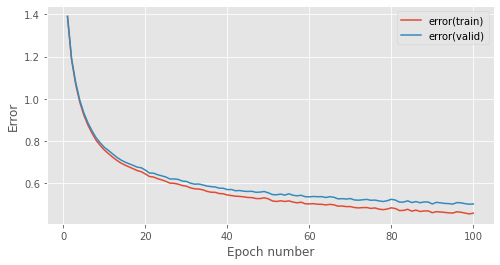

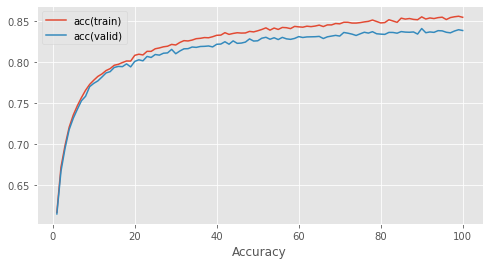

In [29]:
print("error(train):"+str(stats[1:, keys['error(train)']][99]))
print("error(valid):"+str(stats[1:, keys['error(valid)']][99]))
print("acc(train):"+str(stats[1:, keys['acc(train)']][99]))
print("acc(valid):"+str(stats[1:, keys['acc(valid)']][99]))

# Plot the change in the validation and training set error over training.
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for k in ['error(train)', 'error(valid)']:
    ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:, keys[k]], label=k)
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')
ax_1.set_ylabel('Error')
#     fig_1.savefig('width accuracy graph.png')

# Plot the change in the validation and training set accuracy over training.
fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)
for k in ['acc(train)', 'acc(valid)']:
    ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:, keys[k]], label=k)
ax_2.legend(loc=0)
ax_2.set_xlabel('Epoch number')
ax_2.set_xlabel('Accuracy')
#     fig_2.savefig('img2.png')

In [32]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty
import os
os.environ['MLP_DATA_DIR']='F:\MLP\mlpractical\data'
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider


# Setup hyperparameters
learning_rate = 1e-4 # Adam optimizer with a learning rate of 10−4 as specified in the template
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

# weight_penalty = L2Penalty(5e-3)
# biases_penalty = L2Penalty(5e-3)
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

dropout_prob = 0.7

# Create model with Three hidden layers with 128 ReLU hidden units
model3 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),# first hidden layer
    DropoutLayer(rng, dropout_prob),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    DropoutLayer(rng, dropout_prob),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # third hidden layer
    DropoutLayer(rng, dropout_prob),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# _ = train_model_and_plot_stats(
#     model3, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)


# As well as monitoring the error over training also monitor classification
# accuracy i.e. proportion of most-probable predicted classes being equal to targets
data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

# Use the created objects to initialise a new Optimiser instance.
optimiser = Optimiser(model3, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)

# Run the optimiser for num_epochs epochs (full passes through the training set)
# printing statistics every epoch.
stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D28F0EC220>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D28F07A260>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.7s to complete
    error(train)=2.30e+00, acc(train)=4.65e-01, error(valid)=2.29e+00, acc(valid)=4.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.9s to complete
    error(train)=1.72e+00, acc(train)=5.52e-01, error(valid)=1.72e+00, acc(valid)=5.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.0s to complete
    error(train)=1.51e+00, acc(train)=5.96e-01, error(valid)=1.51e+00, acc(valid)=5.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.0s to complete
    error(train)=1.36e+00, acc(train)=6.23e-01, error(valid)=1.36e+00, acc(valid)=6.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.0s to complete
    error(train)=1.26e+00, acc(train)=6.45e-01, error(valid)=1.27e+00, acc(valid)=6.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.0s to complete
    error(train)=1.18e+00, acc(train)=6.65e-01, error(valid)=1.18e+00, acc(valid)=6.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.0s to complete
    error(train)=1.11e+00, acc(train)=6.79e-01, error(valid)=1.12e+00, acc(valid)=6.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.9s to complete
    error(train)=1.06e+00, acc(train)=6.90e-01, error(valid)=1.07e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.9s to complete
    error(train)=1.01e+00, acc(train)=7.04e-01, error(valid)=1.01e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.0s to complete
    error(train)=9.68e-01, acc(train)=7.13e-01, error(valid)=9.76e-01, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.1s to complete
    error(train)=9.33e-01, acc(train)=7.20e-01, error(valid)=9.41e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.1s to complete
    error(train)=9.00e-01, acc(train)=7.29e-01, error(valid)=9.10e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.9s to complete
    error(train)=8.75e-01, acc(train)=7.34e-01, error(valid)=8.86e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.9s to complete
    error(train)=8.46e-01, acc(train)=7.41e-01, error(valid)=8.58e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.2s to complete
    error(train)=8.23e-01, acc(train)=7.48e-01, error(valid)=8.36e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.2s to complete
    error(train)=8.12e-01, acc(train)=7.49e-01, error(valid)=8.25e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.1s to complete
    error(train)=7.84e-01, acc(train)=7.56e-01, error(valid)=7.99e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.1s to complete
    error(train)=7.71e-01, acc(train)=7.60e-01, error(valid)=7.86e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.1s to complete
    error(train)=7.56e-01, acc(train)=7.63e-01, error(valid)=7.72e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.1s to complete
    error(train)=7.45e-01, acc(train)=7.67e-01, error(valid)=7.61e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.0s to complete
    error(train)=7.33e-01, acc(train)=7.70e-01, error(valid)=7.50e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.0s to complete
    error(train)=7.19e-01, acc(train)=7.74e-01, error(valid)=7.36e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.0s to complete
    error(train)=7.11e-01, acc(train)=7.75e-01, error(valid)=7.29e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.0s to complete
    error(train)=6.94e-01, acc(train)=7.80e-01, error(valid)=7.13e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.2s to complete
    error(train)=6.86e-01, acc(train)=7.83e-01, error(valid)=7.07e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.2s to complete
    error(train)=6.75e-01, acc(train)=7.85e-01, error(valid)=6.95e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.1s to complete
    error(train)=6.66e-01, acc(train)=7.88e-01, error(valid)=6.88e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.0s to complete
    error(train)=6.57e-01, acc(train)=7.91e-01, error(valid)=6.79e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.9s to complete
    error(train)=6.52e-01, acc(train)=7.91e-01, error(valid)=6.76e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.8s to complete
    error(train)=6.45e-01, acc(train)=7.93e-01, error(valid)=6.70e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.9s to complete
    error(train)=6.38e-01, acc(train)=7.96e-01, error(valid)=6.62e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.0s to complete
    error(train)=6.28e-01, acc(train)=7.98e-01, error(valid)=6.52e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.2s to complete
    error(train)=6.23e-01, acc(train)=8.00e-01, error(valid)=6.48e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.9s to complete
    error(train)=6.17e-01, acc(train)=8.01e-01, error(valid)=6.44e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.0s to complete
    error(train)=6.12e-01, acc(train)=8.02e-01, error(valid)=6.38e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.0s to complete
    error(train)=6.05e-01, acc(train)=8.03e-01, error(valid)=6.32e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.0s to complete
    error(train)=6.00e-01, acc(train)=8.04e-01, error(valid)=6.28e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.8s to complete
    error(train)=5.93e-01, acc(train)=8.06e-01, error(valid)=6.21e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.9s to complete
    error(train)=5.89e-01, acc(train)=8.08e-01, error(valid)=6.18e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.9s to complete
    error(train)=5.85e-01, acc(train)=8.09e-01, error(valid)=6.14e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.8s to complete
    error(train)=5.79e-01, acc(train)=8.11e-01, error(valid)=6.10e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.7s to complete
    error(train)=5.74e-01, acc(train)=8.13e-01, error(valid)=6.05e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.8s to complete
    error(train)=5.70e-01, acc(train)=8.14e-01, error(valid)=6.00e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.8s to complete
    error(train)=5.67e-01, acc(train)=8.15e-01, error(valid)=5.99e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.0s to complete
    error(train)=5.64e-01, acc(train)=8.15e-01, error(valid)=5.97e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.9s to complete
    error(train)=5.60e-01, acc(train)=8.16e-01, error(valid)=5.93e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.8s to complete
    error(train)=5.55e-01, acc(train)=8.17e-01, error(valid)=5.88e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.8s to complete
    error(train)=5.53e-01, acc(train)=8.18e-01, error(valid)=5.87e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.8s to complete
    error(train)=5.49e-01, acc(train)=8.19e-01, error(valid)=5.84e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.8s to complete
    error(train)=5.45e-01, acc(train)=8.20e-01, error(valid)=5.80e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.9s to complete
    error(train)=5.41e-01, acc(train)=8.20e-01, error(valid)=5.77e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.9s to complete
    error(train)=5.41e-01, acc(train)=8.20e-01, error(valid)=5.79e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.9s to complete
    error(train)=5.35e-01, acc(train)=8.21e-01, error(valid)=5.73e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.0s to complete
    error(train)=5.34e-01, acc(train)=8.22e-01, error(valid)=5.74e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.8s to complete
    error(train)=5.30e-01, acc(train)=8.23e-01, error(valid)=5.68e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.8s to complete
    error(train)=5.27e-01, acc(train)=8.24e-01, error(valid)=5.66e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.9s to complete
    error(train)=5.22e-01, acc(train)=8.26e-01, error(valid)=5.62e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.6s to complete
    error(train)=5.20e-01, acc(train)=8.25e-01, error(valid)=5.59e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.5s to complete
    error(train)=5.16e-01, acc(train)=8.27e-01, error(valid)=5.57e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.1s to complete
    error(train)=5.14e-01, acc(train)=8.27e-01, error(valid)=5.55e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.6s to complete
    error(train)=5.14e-01, acc(train)=8.27e-01, error(valid)=5.56e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.4s to complete
    error(train)=5.10e-01, acc(train)=8.28e-01, error(valid)=5.53e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.3s to complete
    error(train)=5.08e-01, acc(train)=8.29e-01, error(valid)=5.50e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.4s to complete
    error(train)=5.07e-01, acc(train)=8.30e-01, error(valid)=5.49e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.5s to complete
    error(train)=5.04e-01, acc(train)=8.31e-01, error(valid)=5.47e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.3s to complete
    error(train)=5.01e-01, acc(train)=8.30e-01, error(valid)=5.45e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.3s to complete
    error(train)=5.00e-01, acc(train)=8.31e-01, error(valid)=5.44e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.5s to complete
    error(train)=4.99e-01, acc(train)=8.32e-01, error(valid)=5.44e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.5s to complete
    error(train)=4.94e-01, acc(train)=8.32e-01, error(valid)=5.40e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.4s to complete
    error(train)=4.93e-01, acc(train)=8.33e-01, error(valid)=5.40e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.4s to complete
    error(train)=4.90e-01, acc(train)=8.34e-01, error(valid)=5.38e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.5s to complete
    error(train)=4.89e-01, acc(train)=8.35e-01, error(valid)=5.36e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.6s to complete
    error(train)=4.88e-01, acc(train)=8.34e-01, error(valid)=5.36e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.6s to complete
    error(train)=4.86e-01, acc(train)=8.35e-01, error(valid)=5.34e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.4s to complete
    error(train)=4.82e-01, acc(train)=8.36e-01, error(valid)=5.30e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.4s to complete
    error(train)=4.79e-01, acc(train)=8.37e-01, error(valid)=5.28e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.5s to complete
    error(train)=4.80e-01, acc(train)=8.36e-01, error(valid)=5.31e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.5s to complete
    error(train)=4.78e-01, acc(train)=8.37e-01, error(valid)=5.28e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.3s to complete
    error(train)=4.77e-01, acc(train)=8.38e-01, error(valid)=5.27e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.5s to complete
    error(train)=4.73e-01, acc(train)=8.38e-01, error(valid)=5.25e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.4s to complete
    error(train)=4.71e-01, acc(train)=8.39e-01, error(valid)=5.21e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.5s to complete
    error(train)=4.70e-01, acc(train)=8.39e-01, error(valid)=5.23e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.5s to complete
    error(train)=4.68e-01, acc(train)=8.40e-01, error(valid)=5.21e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.3s to complete
    error(train)=4.68e-01, acc(train)=8.40e-01, error(valid)=5.21e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.4s to complete
    error(train)=4.65e-01, acc(train)=8.40e-01, error(valid)=5.19e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.5s to complete
    error(train)=4.65e-01, acc(train)=8.41e-01, error(valid)=5.18e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.7s to complete
    error(train)=4.62e-01, acc(train)=8.41e-01, error(valid)=5.16e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.6s to complete
    error(train)=4.64e-01, acc(train)=8.40e-01, error(valid)=5.19e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.3s to complete
    error(train)=4.61e-01, acc(train)=8.42e-01, error(valid)=5.16e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.5s to complete
    error(train)=4.59e-01, acc(train)=8.42e-01, error(valid)=5.14e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.5s to complete
    error(train)=4.58e-01, acc(train)=8.43e-01, error(valid)=5.13e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.4s to complete
    error(train)=4.56e-01, acc(train)=8.43e-01, error(valid)=5.14e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.5s to complete
    error(train)=4.53e-01, acc(train)=8.44e-01, error(valid)=5.11e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.5s to complete
    error(train)=4.52e-01, acc(train)=8.45e-01, error(valid)=5.09e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.6s to complete
    error(train)=4.51e-01, acc(train)=8.45e-01, error(valid)=5.09e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.6s to complete
    error(train)=4.51e-01, acc(train)=8.44e-01, error(valid)=5.08e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.5s to complete
    error(train)=4.50e-01, acc(train)=8.44e-01, error(valid)=5.09e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.4s to complete
    error(train)=4.46e-01, acc(train)=8.46e-01, error(valid)=5.04e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.6s to complete
    error(train)=4.46e-01, acc(train)=8.45e-01, error(valid)=5.05e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.5s to complete
    error(train)=4.44e-01, acc(train)=8.47e-01, error(valid)=5.04e-01, acc(valid)=8.32e-01


In [36]:
def train_model_Dropout_L1L2(dropout_prob,L1_val,L2_val):
    # Create model with Three hidden layers with 128 ReLU hidden units
    if L1_val == 0:
        weight_penalty = L2Penalty(L2_val)
        biases_penalty = L2Penalty(L2_val)
    else:
        weight_penalty = L1Penalty(L1_val)
        biases_penalty = L1Penalty(L1_val)
    
    # Setup hyperparameters
    learning_rate = 1e-4 # Adam optimizer with a learning rate of 10−4 as specified in the template
    num_epochs = 100
    stats_interval = 1
    input_dim, output_dim, hidden_dim = 784, 47, 128
    # Seed a random number generator
    seed = 11102019 
    rng = np.random.RandomState(seed)
    batch_size = 100
    # Set up a logger object to print info about the training run to stdout
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    logger.handlers = [logging.StreamHandler()]

    # Create data provider objects for the MNIST data set
    train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
    valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weight_penalty,biases_penalty),# first hidden layer
        DropoutLayer(rng, dropout_prob),
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weight_penalty,biases_penalty), # second hidden layer
        DropoutLayer(rng, dropout_prob),
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weight_penalty,biases_penalty), # third hidden layer
        DropoutLayer(rng, dropout_prob),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weight_penalty,biases_penalty) # output layer])
    ])
    
    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)    
    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)    
        
    return stats

In [83]:
def train_model_Dropout(dropout_prob):
    
    # Setup hyperparameters
    learning_rate = 1e-4 # Adam optimizer with a learning rate of 10−4 as specified in the template
    num_epochs = 100
    stats_interval = 1
    input_dim, output_dim, hidden_dim = 784, 47, 128
    # Seed a random number generator
    seed = 11102019 
    rng = np.random.RandomState(seed)
    batch_size = 100
    # Set up a logger object to print info about the training run to stdout
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    logger.handlers = [logging.StreamHandler()]

    # Create data provider objects for the MNIST data set
    train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
    valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),# first hidden layer
        DropoutLayer(rng, dropout_prob),
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
        DropoutLayer(rng, dropout_prob),
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # third hidden layer
        DropoutLayer(rng, dropout_prob),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer])
    ])
    
    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)    
    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)    
        
    return stats

In [111]:


stats_drop_06 = train_model_Dropout(0.6)
stats_drop_07 = train_model_Dropout(0.7)
stats_drop_085 = train_model_Dropout(0.85)
stats_drop_097 = train_model_Dropout(0.97)

np.save('stats_drop_06.npy',stats_drop_06)
np.save('stats_drop_07.npy',stats_drop_07)
np.save('stats_drop_085.npy',stats_drop_085)
np.save('stats_drop_097.npy',stats_drop_097)


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2BA1C0220>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B617ED10>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.5s to complete
    error(train)=2.81e+00, acc(train)=3.50e-01, error(valid)=2.80e+00, acc(valid)=3.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.3s to complete
    error(train)=2.12e+00, acc(train)=4.85e-01, error(valid)=2.12e+00, acc(valid)=4.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.2s to complete
    error(train)=1.82e+00, acc(train)=5.35e-01, error(valid)=1.83e+00, acc(valid)=5.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.0s to complete
    error(train)=1.63e+00, acc(train)=5.68e-01, error(valid)=1.63e+00, acc(valid)=5.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.6s to complete
    error(train)=1.50e+00, acc(train)=5.95e-01, error(valid)=1.50e+00, acc(valid)=5.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.3s to complete
    error(train)=1.41e+00, acc(train)=6.12e-01, error(valid)=1.41e+00, acc(valid)=6.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.3s to complete
    error(train)=1.33e+00, acc(train)=6.30e-01, error(valid)=1.34e+00, acc(valid)=6.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.2s to complete
    error(train)=1.28e+00, acc(train)=6.41e-01, error(valid)=1.28e+00, acc(valid)=6.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.0s to complete
    error(train)=1.22e+00, acc(train)=6.55e-01, error(valid)=1.22e+00, acc(valid)=6.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.7s to complete
    error(train)=1.17e+00, acc(train)=6.66e-01, error(valid)=1.18e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.4s to complete
    error(train)=1.12e+00, acc(train)=6.74e-01, error(valid)=1.13e+00, acc(valid)=6.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.6s to complete
    error(train)=1.09e+00, acc(train)=6.82e-01, error(valid)=1.10e+00, acc(valid)=6.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.4s to complete
    error(train)=1.07e+00, acc(train)=6.89e-01, error(valid)=1.07e+00, acc(valid)=6.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.2s to complete
    error(train)=1.03e+00, acc(train)=6.96e-01, error(valid)=1.04e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.7s to complete
    error(train)=1.01e+00, acc(train)=7.02e-01, error(valid)=1.01e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.4s to complete
    error(train)=9.85e-01, acc(train)=7.06e-01, error(valid)=9.94e-01, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.3s to complete
    error(train)=9.55e-01, acc(train)=7.12e-01, error(valid)=9.66e-01, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.3s to complete
    error(train)=9.37e-01, acc(train)=7.19e-01, error(valid)=9.48e-01, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.2s to complete
    error(train)=9.20e-01, acc(train)=7.21e-01, error(valid)=9.31e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.6s to complete
    error(train)=9.01e-01, acc(train)=7.25e-01, error(valid)=9.13e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.3s to complete
    error(train)=8.94e-01, acc(train)=7.28e-01, error(valid)=9.06e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.3s to complete
    error(train)=8.72e-01, acc(train)=7.34e-01, error(valid)=8.84e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.2s to complete
    error(train)=8.59e-01, acc(train)=7.35e-01, error(valid)=8.72e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.0s to complete
    error(train)=8.39e-01, acc(train)=7.40e-01, error(valid)=8.54e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.6s to complete
    error(train)=8.30e-01, acc(train)=7.44e-01, error(valid)=8.45e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.4s to complete
    error(train)=8.21e-01, acc(train)=7.46e-01, error(valid)=8.35e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.3s to complete
    error(train)=8.06e-01, acc(train)=7.51e-01, error(valid)=8.22e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.3s to complete
    error(train)=7.94e-01, acc(train)=7.54e-01, error(valid)=8.10e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.4s to complete
    error(train)=7.86e-01, acc(train)=7.53e-01, error(valid)=8.04e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.4s to complete
    error(train)=7.80e-01, acc(train)=7.56e-01, error(valid)=8.00e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.4s to complete
    error(train)=7.69e-01, acc(train)=7.60e-01, error(valid)=7.87e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.4s to complete
    error(train)=7.56e-01, acc(train)=7.64e-01, error(valid)=7.75e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.4s to complete
    error(train)=7.53e-01, acc(train)=7.64e-01, error(valid)=7.73e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.4s to complete
    error(train)=7.45e-01, acc(train)=7.65e-01, error(valid)=7.66e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.4s to complete
    error(train)=7.35e-01, acc(train)=7.69e-01, error(valid)=7.56e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.5s to complete
    error(train)=7.30e-01, acc(train)=7.70e-01, error(valid)=7.51e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.4s to complete
    error(train)=7.23e-01, acc(train)=7.71e-01, error(valid)=7.46e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.6s to complete
    error(train)=7.15e-01, acc(train)=7.72e-01, error(valid)=7.37e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.4s to complete
    error(train)=7.11e-01, acc(train)=7.75e-01, error(valid)=7.33e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.6s to complete
    error(train)=7.04e-01, acc(train)=7.77e-01, error(valid)=7.27e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.4s to complete
    error(train)=6.98e-01, acc(train)=7.77e-01, error(valid)=7.22e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.6s to complete
    error(train)=6.92e-01, acc(train)=7.80e-01, error(valid)=7.16e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.4s to complete
    error(train)=6.88e-01, acc(train)=7.81e-01, error(valid)=7.12e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.6s to complete
    error(train)=6.83e-01, acc(train)=7.83e-01, error(valid)=7.08e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.4s to complete
    error(train)=6.78e-01, acc(train)=7.84e-01, error(valid)=7.04e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.6s to complete
    error(train)=6.74e-01, acc(train)=7.84e-01, error(valid)=7.00e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.4s to complete
    error(train)=6.70e-01, acc(train)=7.87e-01, error(valid)=6.95e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.6s to complete
    error(train)=6.66e-01, acc(train)=7.87e-01, error(valid)=6.91e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.4s to complete
    error(train)=6.63e-01, acc(train)=7.88e-01, error(valid)=6.90e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.6s to complete
    error(train)=6.56e-01, acc(train)=7.90e-01, error(valid)=6.83e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.4s to complete
    error(train)=6.55e-01, acc(train)=7.90e-01, error(valid)=6.83e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.6s to complete
    error(train)=6.53e-01, acc(train)=7.90e-01, error(valid)=6.81e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.4s to complete
    error(train)=6.45e-01, acc(train)=7.92e-01, error(valid)=6.75e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.6s to complete
    error(train)=6.45e-01, acc(train)=7.93e-01, error(valid)=6.75e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.4s to complete
    error(train)=6.39e-01, acc(train)=7.95e-01, error(valid)=6.68e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.7s to complete
    error(train)=6.37e-01, acc(train)=7.95e-01, error(valid)=6.66e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.4s to complete
    error(train)=6.32e-01, acc(train)=7.97e-01, error(valid)=6.63e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.8s to complete
    error(train)=6.28e-01, acc(train)=7.96e-01, error(valid)=6.60e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.4s to complete
    error(train)=6.25e-01, acc(train)=7.98e-01, error(valid)=6.56e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.6s to complete
    error(train)=6.23e-01, acc(train)=7.99e-01, error(valid)=6.54e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.4s to complete
    error(train)=6.21e-01, acc(train)=7.98e-01, error(valid)=6.53e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.7s to complete
    error(train)=6.16e-01, acc(train)=8.00e-01, error(valid)=6.48e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.4s to complete
    error(train)=6.15e-01, acc(train)=8.00e-01, error(valid)=6.47e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.6s to complete
    error(train)=6.14e-01, acc(train)=8.01e-01, error(valid)=6.47e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.6s to complete
    error(train)=6.09e-01, acc(train)=8.04e-01, error(valid)=6.41e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.4s to complete
    error(train)=6.08e-01, acc(train)=8.02e-01, error(valid)=6.41e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.6s to complete
    error(train)=6.05e-01, acc(train)=8.02e-01, error(valid)=6.39e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.4s to complete
    error(train)=6.03e-01, acc(train)=8.04e-01, error(valid)=6.38e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.6s to complete
    error(train)=5.98e-01, acc(train)=8.05e-01, error(valid)=6.33e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.4s to complete
    error(train)=5.98e-01, acc(train)=8.06e-01, error(valid)=6.34e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.6s to complete
    error(train)=5.95e-01, acc(train)=8.06e-01, error(valid)=6.31e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.4s to complete
    error(train)=5.97e-01, acc(train)=8.06e-01, error(valid)=6.32e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.6s to complete
    error(train)=5.92e-01, acc(train)=8.06e-01, error(valid)=6.29e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.4s to complete
    error(train)=5.88e-01, acc(train)=8.09e-01, error(valid)=6.25e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.6s to complete
    error(train)=5.86e-01, acc(train)=8.08e-01, error(valid)=6.22e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.4s to complete
    error(train)=5.83e-01, acc(train)=8.09e-01, error(valid)=6.22e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.6s to complete
    error(train)=5.83e-01, acc(train)=8.09e-01, error(valid)=6.19e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.4s to complete
    error(train)=5.80e-01, acc(train)=8.10e-01, error(valid)=6.18e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.6s to complete
    error(train)=5.80e-01, acc(train)=8.11e-01, error(valid)=6.18e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.4s to complete
    error(train)=5.77e-01, acc(train)=8.10e-01, error(valid)=6.16e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.6s to complete
    error(train)=5.75e-01, acc(train)=8.12e-01, error(valid)=6.14e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.4s to complete
    error(train)=5.74e-01, acc(train)=8.11e-01, error(valid)=6.15e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.6s to complete
    error(train)=5.71e-01, acc(train)=8.12e-01, error(valid)=6.11e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.4s to complete
    error(train)=5.73e-01, acc(train)=8.12e-01, error(valid)=6.13e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.6s to complete
    error(train)=5.71e-01, acc(train)=8.13e-01, error(valid)=6.13e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.4s to complete
    error(train)=5.67e-01, acc(train)=8.14e-01, error(valid)=6.09e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.6s to complete
    error(train)=5.67e-01, acc(train)=8.13e-01, error(valid)=6.09e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.4s to complete
    error(train)=5.68e-01, acc(train)=8.13e-01, error(valid)=6.11e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.6s to complete
    error(train)=5.65e-01, acc(train)=8.15e-01, error(valid)=6.06e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.4s to complete
    error(train)=5.61e-01, acc(train)=8.16e-01, error(valid)=6.04e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.6s to complete
    error(train)=5.59e-01, acc(train)=8.16e-01, error(valid)=6.02e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.4s to complete
    error(train)=5.58e-01, acc(train)=8.15e-01, error(valid)=6.02e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.6s to complete
    error(train)=5.57e-01, acc(train)=8.15e-01, error(valid)=6.01e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.4s to complete
    error(train)=5.53e-01, acc(train)=8.18e-01, error(valid)=5.96e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.6s to complete
    error(train)=5.52e-01, acc(train)=8.18e-01, error(valid)=5.97e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.4s to complete
    error(train)=5.51e-01, acc(train)=8.18e-01, error(valid)=5.96e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.6s to complete
    error(train)=5.53e-01, acc(train)=8.17e-01, error(valid)=5.98e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.4s to complete
    error(train)=5.49e-01, acc(train)=8.18e-01, error(valid)=5.94e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.6s to complete
    error(train)=5.47e-01, acc(train)=8.19e-01, error(valid)=5.93e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.4s to complete
    error(train)=5.45e-01, acc(train)=8.20e-01, error(valid)=5.92e-01, acc(valid)=8.06e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2BA3FACE0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2BA1C0220>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.5s to complete
    error(train)=2.30e+00, acc(train)=4.65e-01, error(valid)=2.29e+00, acc(valid)=4.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.5s to complete
    error(train)=1.72e+00, acc(train)=5.52e-01, error(valid)=1.72e+00, acc(valid)=5.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.5s to complete
    error(train)=1.51e+00, acc(train)=5.96e-01, error(valid)=1.51e+00, acc(valid)=5.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.5s to complete
    error(train)=1.36e+00, acc(train)=6.23e-01, error(valid)=1.36e+00, acc(valid)=6.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.5s to complete
    error(train)=1.26e+00, acc(train)=6.45e-01, error(valid)=1.27e+00, acc(valid)=6.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.5s to complete
    error(train)=1.18e+00, acc(train)=6.65e-01, error(valid)=1.18e+00, acc(valid)=6.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.5s to complete
    error(train)=1.11e+00, acc(train)=6.79e-01, error(valid)=1.12e+00, acc(valid)=6.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.5s to complete
    error(train)=1.06e+00, acc(train)=6.90e-01, error(valid)=1.07e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.5s to complete
    error(train)=1.01e+00, acc(train)=7.04e-01, error(valid)=1.01e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.5s to complete
    error(train)=9.68e-01, acc(train)=7.13e-01, error(valid)=9.76e-01, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.7s to complete
    error(train)=9.33e-01, acc(train)=7.20e-01, error(valid)=9.41e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.7s to complete
    error(train)=9.00e-01, acc(train)=7.29e-01, error(valid)=9.10e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.6s to complete
    error(train)=8.75e-01, acc(train)=7.34e-01, error(valid)=8.86e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.6s to complete
    error(train)=8.46e-01, acc(train)=7.41e-01, error(valid)=8.58e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.5s to complete
    error(train)=8.23e-01, acc(train)=7.48e-01, error(valid)=8.36e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.5s to complete
    error(train)=8.12e-01, acc(train)=7.49e-01, error(valid)=8.25e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.5s to complete
    error(train)=7.84e-01, acc(train)=7.56e-01, error(valid)=7.99e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.5s to complete
    error(train)=7.71e-01, acc(train)=7.60e-01, error(valid)=7.86e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.3s to complete
    error(train)=7.56e-01, acc(train)=7.63e-01, error(valid)=7.72e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.3s to complete
    error(train)=7.45e-01, acc(train)=7.67e-01, error(valid)=7.61e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.6s to complete
    error(train)=7.33e-01, acc(train)=7.70e-01, error(valid)=7.50e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.7s to complete
    error(train)=7.19e-01, acc(train)=7.74e-01, error(valid)=7.36e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.1s to complete
    error(train)=7.11e-01, acc(train)=7.75e-01, error(valid)=7.29e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.1s to complete
    error(train)=6.94e-01, acc(train)=7.80e-01, error(valid)=7.13e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.7s to complete
    error(train)=6.86e-01, acc(train)=7.83e-01, error(valid)=7.07e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.1s to complete
    error(train)=6.75e-01, acc(train)=7.85e-01, error(valid)=6.95e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.1s to complete
    error(train)=6.66e-01, acc(train)=7.88e-01, error(valid)=6.88e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.7s to complete
    error(train)=6.57e-01, acc(train)=7.91e-01, error(valid)=6.79e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.1s to complete
    error(train)=6.52e-01, acc(train)=7.91e-01, error(valid)=6.76e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.1s to complete
    error(train)=6.45e-01, acc(train)=7.93e-01, error(valid)=6.70e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.7s to complete
    error(train)=6.38e-01, acc(train)=7.96e-01, error(valid)=6.62e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.1s to complete
    error(train)=6.28e-01, acc(train)=7.98e-01, error(valid)=6.52e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.1s to complete
    error(train)=6.23e-01, acc(train)=8.00e-01, error(valid)=6.48e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.7s to complete
    error(train)=6.17e-01, acc(train)=8.01e-01, error(valid)=6.44e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.1s to complete
    error(train)=6.12e-01, acc(train)=8.02e-01, error(valid)=6.38e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.1s to complete
    error(train)=6.05e-01, acc(train)=8.03e-01, error(valid)=6.32e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.7s to complete
    error(train)=6.00e-01, acc(train)=8.04e-01, error(valid)=6.28e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.1s to complete
    error(train)=5.93e-01, acc(train)=8.06e-01, error(valid)=6.21e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.1s to complete
    error(train)=5.89e-01, acc(train)=8.08e-01, error(valid)=6.18e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.7s to complete
    error(train)=5.85e-01, acc(train)=8.09e-01, error(valid)=6.14e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.1s to complete
    error(train)=5.79e-01, acc(train)=8.11e-01, error(valid)=6.10e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.1s to complete
    error(train)=5.74e-01, acc(train)=8.13e-01, error(valid)=6.05e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.7s to complete
    error(train)=5.70e-01, acc(train)=8.14e-01, error(valid)=6.00e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.1s to complete
    error(train)=5.67e-01, acc(train)=8.15e-01, error(valid)=5.99e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.1s to complete
    error(train)=5.64e-01, acc(train)=8.15e-01, error(valid)=5.97e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.7s to complete
    error(train)=5.60e-01, acc(train)=8.16e-01, error(valid)=5.93e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.7s to complete
    error(train)=5.55e-01, acc(train)=8.17e-01, error(valid)=5.88e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.7s to complete
    error(train)=5.53e-01, acc(train)=8.18e-01, error(valid)=5.87e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.7s to complete
    error(train)=5.49e-01, acc(train)=8.19e-01, error(valid)=5.84e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.7s to complete
    error(train)=5.45e-01, acc(train)=8.20e-01, error(valid)=5.80e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.7s to complete
    error(train)=5.41e-01, acc(train)=8.20e-01, error(valid)=5.77e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.7s to complete
    error(train)=5.41e-01, acc(train)=8.20e-01, error(valid)=5.79e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.7s to complete
    error(train)=5.35e-01, acc(train)=8.21e-01, error(valid)=5.73e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.7s to complete
    error(train)=5.34e-01, acc(train)=8.22e-01, error(valid)=5.74e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.7s to complete
    error(train)=5.30e-01, acc(train)=8.23e-01, error(valid)=5.68e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.7s to complete
    error(train)=5.27e-01, acc(train)=8.24e-01, error(valid)=5.66e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.7s to complete
    error(train)=5.22e-01, acc(train)=8.26e-01, error(valid)=5.62e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.7s to complete
    error(train)=5.20e-01, acc(train)=8.25e-01, error(valid)=5.59e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.7s to complete
    error(train)=5.16e-01, acc(train)=8.27e-01, error(valid)=5.57e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.7s to complete
    error(train)=5.14e-01, acc(train)=8.27e-01, error(valid)=5.55e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.7s to complete
    error(train)=5.14e-01, acc(train)=8.27e-01, error(valid)=5.56e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.7s to complete
    error(train)=5.10e-01, acc(train)=8.28e-01, error(valid)=5.53e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.7s to complete
    error(train)=5.08e-01, acc(train)=8.29e-01, error(valid)=5.50e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.7s to complete
    error(train)=5.07e-01, acc(train)=8.30e-01, error(valid)=5.49e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.7s to complete
    error(train)=5.04e-01, acc(train)=8.31e-01, error(valid)=5.47e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.7s to complete
    error(train)=5.01e-01, acc(train)=8.30e-01, error(valid)=5.45e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.7s to complete
    error(train)=5.00e-01, acc(train)=8.31e-01, error(valid)=5.44e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.7s to complete
    error(train)=4.99e-01, acc(train)=8.32e-01, error(valid)=5.44e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.7s to complete
    error(train)=4.94e-01, acc(train)=8.32e-01, error(valid)=5.40e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.7s to complete
    error(train)=4.93e-01, acc(train)=8.33e-01, error(valid)=5.40e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.7s to complete
    error(train)=4.90e-01, acc(train)=8.34e-01, error(valid)=5.38e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.7s to complete
    error(train)=4.89e-01, acc(train)=8.35e-01, error(valid)=5.36e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.7s to complete
    error(train)=4.88e-01, acc(train)=8.34e-01, error(valid)=5.36e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.7s to complete
    error(train)=4.86e-01, acc(train)=8.35e-01, error(valid)=5.34e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.7s to complete
    error(train)=4.82e-01, acc(train)=8.36e-01, error(valid)=5.30e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.7s to complete
    error(train)=4.79e-01, acc(train)=8.37e-01, error(valid)=5.28e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.7s to complete
    error(train)=4.80e-01, acc(train)=8.36e-01, error(valid)=5.31e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.7s to complete
    error(train)=4.78e-01, acc(train)=8.37e-01, error(valid)=5.28e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.7s to complete
    error(train)=4.77e-01, acc(train)=8.38e-01, error(valid)=5.27e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.7s to complete
    error(train)=4.73e-01, acc(train)=8.38e-01, error(valid)=5.25e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.7s to complete
    error(train)=4.71e-01, acc(train)=8.39e-01, error(valid)=5.21e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.7s to complete
    error(train)=4.70e-01, acc(train)=8.39e-01, error(valid)=5.23e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.7s to complete
    error(train)=4.68e-01, acc(train)=8.40e-01, error(valid)=5.21e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.7s to complete
    error(train)=4.68e-01, acc(train)=8.40e-01, error(valid)=5.21e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.7s to complete
    error(train)=4.65e-01, acc(train)=8.40e-01, error(valid)=5.19e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.7s to complete
    error(train)=4.65e-01, acc(train)=8.41e-01, error(valid)=5.18e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.7s to complete
    error(train)=4.62e-01, acc(train)=8.41e-01, error(valid)=5.16e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.7s to complete
    error(train)=4.64e-01, acc(train)=8.40e-01, error(valid)=5.19e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.7s to complete
    error(train)=4.61e-01, acc(train)=8.42e-01, error(valid)=5.16e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.7s to complete
    error(train)=4.59e-01, acc(train)=8.42e-01, error(valid)=5.14e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.7s to complete
    error(train)=4.58e-01, acc(train)=8.43e-01, error(valid)=5.13e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.7s to complete
    error(train)=4.56e-01, acc(train)=8.43e-01, error(valid)=5.14e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.7s to complete
    error(train)=4.53e-01, acc(train)=8.44e-01, error(valid)=5.11e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.7s to complete
    error(train)=4.52e-01, acc(train)=8.45e-01, error(valid)=5.09e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.7s to complete
    error(train)=4.51e-01, acc(train)=8.45e-01, error(valid)=5.09e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.7s to complete
    error(train)=4.51e-01, acc(train)=8.44e-01, error(valid)=5.08e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.7s to complete
    error(train)=4.50e-01, acc(train)=8.44e-01, error(valid)=5.09e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.7s to complete
    error(train)=4.46e-01, acc(train)=8.46e-01, error(valid)=5.04e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.7s to complete
    error(train)=4.46e-01, acc(train)=8.45e-01, error(valid)=5.05e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.7s to complete
    error(train)=4.44e-01, acc(train)=8.47e-01, error(valid)=5.04e-01, acc(valid)=8.32e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2BBA87DC0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2BBA87DC0>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.6s to complete
    error(train)=1.72e+00, acc(train)=5.56e-01, error(valid)=1.72e+00, acc(valid)=5.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.6s to complete
    error(train)=1.37e+00, acc(train)=6.21e-01, error(valid)=1.37e+00, acc(valid)=6.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.6s to complete
    error(train)=1.20e+00, acc(train)=6.60e-01, error(valid)=1.21e+00, acc(valid)=6.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.6s to complete
    error(train)=1.08e+00, acc(train)=6.88e-01, error(valid)=1.09e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.6s to complete
    error(train)=9.91e-01, acc(train)=7.09e-01, error(valid)=9.98e-01, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.6s to complete
    error(train)=9.18e-01, acc(train)=7.26e-01, error(valid)=9.26e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.6s to complete
    error(train)=8.62e-01, acc(train)=7.40e-01, error(valid)=8.72e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.6s to complete
    error(train)=8.16e-01, acc(train)=7.52e-01, error(valid)=8.26e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.6s to complete
    error(train)=7.76e-01, acc(train)=7.62e-01, error(valid)=7.89e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.6s to complete
    error(train)=7.46e-01, acc(train)=7.71e-01, error(valid)=7.61e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.7s to complete
    error(train)=7.21e-01, acc(train)=7.76e-01, error(valid)=7.38e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.6s to complete
    error(train)=6.92e-01, acc(train)=7.84e-01, error(valid)=7.11e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.7s to complete
    error(train)=6.70e-01, acc(train)=7.90e-01, error(valid)=6.91e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.7s to complete
    error(train)=6.50e-01, acc(train)=7.95e-01, error(valid)=6.72e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.6s to complete
    error(train)=6.34e-01, acc(train)=7.98e-01, error(valid)=6.58e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.7s to complete
    error(train)=6.24e-01, acc(train)=8.01e-01, error(valid)=6.48e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.7s to complete
    error(train)=6.06e-01, acc(train)=8.06e-01, error(valid)=6.33e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.6s to complete
    error(train)=5.90e-01, acc(train)=8.10e-01, error(valid)=6.17e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.7s to complete
    error(train)=5.81e-01, acc(train)=8.12e-01, error(valid)=6.08e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.7s to complete
    error(train)=5.72e-01, acc(train)=8.15e-01, error(valid)=6.00e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.6s to complete
    error(train)=5.61e-01, acc(train)=8.18e-01, error(valid)=5.90e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.7s to complete
    error(train)=5.51e-01, acc(train)=8.20e-01, error(valid)=5.82e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.7s to complete
    error(train)=5.45e-01, acc(train)=8.21e-01, error(valid)=5.76e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.7s to complete
    error(train)=5.33e-01, acc(train)=8.25e-01, error(valid)=5.66e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.7s to complete
    error(train)=5.29e-01, acc(train)=8.26e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.7s to complete
    error(train)=5.19e-01, acc(train)=8.29e-01, error(valid)=5.54e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.7s to complete
    error(train)=5.11e-01, acc(train)=8.31e-01, error(valid)=5.50e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.7s to complete
    error(train)=5.05e-01, acc(train)=8.33e-01, error(valid)=5.44e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.7s to complete
    error(train)=5.00e-01, acc(train)=8.34e-01, error(valid)=5.40e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.8s to complete
    error(train)=4.95e-01, acc(train)=8.35e-01, error(valid)=5.34e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.9s to complete
    error(train)=4.89e-01, acc(train)=8.38e-01, error(valid)=5.30e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.8s to complete
    error(train)=4.83e-01, acc(train)=8.38e-01, error(valid)=5.26e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.8s to complete
    error(train)=4.75e-01, acc(train)=8.41e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.7s to complete
    error(train)=4.72e-01, acc(train)=8.42e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.7s to complete
    error(train)=4.69e-01, acc(train)=8.42e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.7s to complete
    error(train)=4.64e-01, acc(train)=8.44e-01, error(valid)=5.10e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.7s to complete
    error(train)=4.61e-01, acc(train)=8.45e-01, error(valid)=5.09e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.7s to complete
    error(train)=4.52e-01, acc(train)=8.46e-01, error(valid)=5.01e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.7s to complete
    error(train)=4.51e-01, acc(train)=8.47e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.6s to complete
    error(train)=4.49e-01, acc(train)=8.48e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.7s to complete
    error(train)=4.42e-01, acc(train)=8.49e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.7s to complete
    error(train)=4.38e-01, acc(train)=8.51e-01, error(valid)=4.91e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.7s to complete
    error(train)=4.34e-01, acc(train)=8.52e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.8s to complete
    error(train)=4.31e-01, acc(train)=8.53e-01, error(valid)=4.85e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.8s to complete
    error(train)=4.29e-01, acc(train)=8.53e-01, error(valid)=4.85e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.7s to complete
    error(train)=4.27e-01, acc(train)=8.53e-01, error(valid)=4.85e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.7s to complete
    error(train)=4.22e-01, acc(train)=8.55e-01, error(valid)=4.79e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.9s to complete
    error(train)=4.19e-01, acc(train)=8.56e-01, error(valid)=4.78e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.9s to complete
    error(train)=4.16e-01, acc(train)=8.56e-01, error(valid)=4.75e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.0s to complete
    error(train)=4.14e-01, acc(train)=8.57e-01, error(valid)=4.74e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.1s to complete
    error(train)=4.11e-01, acc(train)=8.59e-01, error(valid)=4.72e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.0s to complete
    error(train)=4.10e-01, acc(train)=8.57e-01, error(valid)=4.71e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.8s to complete
    error(train)=4.06e-01, acc(train)=8.60e-01, error(valid)=4.69e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.8s to complete
    error(train)=4.06e-01, acc(train)=8.59e-01, error(valid)=4.71e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.8s to complete
    error(train)=4.01e-01, acc(train)=8.61e-01, error(valid)=4.65e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.8s to complete
    error(train)=3.99e-01, acc(train)=8.62e-01, error(valid)=4.63e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.8s to complete
    error(train)=3.95e-01, acc(train)=8.62e-01, error(valid)=4.61e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.8s to complete
    error(train)=3.93e-01, acc(train)=8.63e-01, error(valid)=4.60e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.8s to complete
    error(train)=3.91e-01, acc(train)=8.64e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.9s to complete
    error(train)=3.91e-01, acc(train)=8.64e-01, error(valid)=4.59e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.9s to complete
    error(train)=3.90e-01, acc(train)=8.64e-01, error(valid)=4.59e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.8s to complete
    error(train)=3.87e-01, acc(train)=8.65e-01, error(valid)=4.58e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.9s to complete
    error(train)=3.84e-01, acc(train)=8.65e-01, error(valid)=4.55e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.0s to complete
    error(train)=3.83e-01, acc(train)=8.66e-01, error(valid)=4.54e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.1s to complete
    error(train)=3.78e-01, acc(train)=8.68e-01, error(valid)=4.50e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.6s to complete
    error(train)=3.80e-01, acc(train)=8.67e-01, error(valid)=4.53e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.6s to complete
    error(train)=3.76e-01, acc(train)=8.68e-01, error(valid)=4.50e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.6s to complete
    error(train)=3.75e-01, acc(train)=8.68e-01, error(valid)=4.49e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.7s to complete
    error(train)=3.72e-01, acc(train)=8.70e-01, error(valid)=4.48e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.9s to complete
    error(train)=3.69e-01, acc(train)=8.71e-01, error(valid)=4.47e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.7s to complete
    error(train)=3.69e-01, acc(train)=8.70e-01, error(valid)=4.47e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.7s to complete
    error(train)=3.67e-01, acc(train)=8.71e-01, error(valid)=4.45e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.7s to complete
    error(train)=3.65e-01, acc(train)=8.72e-01, error(valid)=4.44e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.7s to complete
    error(train)=3.64e-01, acc(train)=8.72e-01, error(valid)=4.43e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.7s to complete
    error(train)=3.62e-01, acc(train)=8.73e-01, error(valid)=4.42e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.7s to complete
    error(train)=3.59e-01, acc(train)=8.74e-01, error(valid)=4.41e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.7s to complete
    error(train)=3.60e-01, acc(train)=8.73e-01, error(valid)=4.42e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.7s to complete
    error(train)=3.57e-01, acc(train)=8.74e-01, error(valid)=4.40e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.7s to complete
    error(train)=3.56e-01, acc(train)=8.74e-01, error(valid)=4.39e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.7s to complete
    error(train)=3.55e-01, acc(train)=8.75e-01, error(valid)=4.40e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.7s to complete
    error(train)=3.52e-01, acc(train)=8.76e-01, error(valid)=4.36e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.7s to complete
    error(train)=3.53e-01, acc(train)=8.75e-01, error(valid)=4.40e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.7s to complete
    error(train)=3.49e-01, acc(train)=8.77e-01, error(valid)=4.37e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.7s to complete
    error(train)=3.49e-01, acc(train)=8.76e-01, error(valid)=4.36e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.7s to complete
    error(train)=3.47e-01, acc(train)=8.77e-01, error(valid)=4.35e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.7s to complete
    error(train)=3.46e-01, acc(train)=8.78e-01, error(valid)=4.34e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.7s to complete
    error(train)=3.45e-01, acc(train)=8.78e-01, error(valid)=4.36e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.7s to complete
    error(train)=3.44e-01, acc(train)=8.77e-01, error(valid)=4.36e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.7s to complete
    error(train)=3.42e-01, acc(train)=8.79e-01, error(valid)=4.33e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.7s to complete
    error(train)=3.40e-01, acc(train)=8.79e-01, error(valid)=4.32e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.7s to complete
    error(train)=3.38e-01, acc(train)=8.79e-01, error(valid)=4.30e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.7s to complete
    error(train)=3.39e-01, acc(train)=8.80e-01, error(valid)=4.32e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.7s to complete
    error(train)=3.37e-01, acc(train)=8.80e-01, error(valid)=4.30e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.7s to complete
    error(train)=3.36e-01, acc(train)=8.81e-01, error(valid)=4.31e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.7s to complete
    error(train)=3.33e-01, acc(train)=8.81e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.7s to complete
    error(train)=3.32e-01, acc(train)=8.81e-01, error(valid)=4.28e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.7s to complete
    error(train)=3.31e-01, acc(train)=8.82e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.7s to complete
    error(train)=3.31e-01, acc(train)=8.82e-01, error(valid)=4.26e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.7s to complete
    error(train)=3.29e-01, acc(train)=8.83e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.7s to complete
    error(train)=3.29e-01, acc(train)=8.83e-01, error(valid)=4.26e-01, acc(valid)=8.55e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2BBEE7040>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2BBEE6D40>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.6s to complete
    error(train)=1.41e+00, acc(train)=6.12e-01, error(valid)=1.41e+00, acc(valid)=6.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.6s to complete
    error(train)=1.15e+00, acc(train)=6.77e-01, error(valid)=1.15e+00, acc(valid)=6.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.6s to complete
    error(train)=1.00e+00, acc(train)=7.10e-01, error(valid)=1.01e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.6s to complete
    error(train)=9.04e-01, acc(train)=7.35e-01, error(valid)=9.14e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.6s to complete
    error(train)=8.20e-01, acc(train)=7.56e-01, error(valid)=8.33e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.6s to complete
    error(train)=7.61e-01, acc(train)=7.71e-01, error(valid)=7.74e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.6s to complete
    error(train)=7.14e-01, acc(train)=7.82e-01, error(valid)=7.31e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.6s to complete
    error(train)=6.74e-01, acc(train)=7.93e-01, error(valid)=6.93e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.6s to complete
    error(train)=6.46e-01, acc(train)=7.99e-01, error(valid)=6.70e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.7s to complete
    error(train)=6.17e-01, acc(train)=8.08e-01, error(valid)=6.42e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.6s to complete
    error(train)=5.99e-01, acc(train)=8.11e-01, error(valid)=6.28e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.6s to complete
    error(train)=5.75e-01, acc(train)=8.17e-01, error(valid)=6.05e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.6s to complete
    error(train)=5.60e-01, acc(train)=8.22e-01, error(valid)=5.94e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.6s to complete
    error(train)=5.44e-01, acc(train)=8.27e-01, error(valid)=5.80e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.6s to complete
    error(train)=5.28e-01, acc(train)=8.30e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.7s to complete
    error(train)=5.18e-01, acc(train)=8.33e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.6s to complete
    error(train)=5.03e-01, acc(train)=8.38e-01, error(valid)=5.47e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.6s to complete
    error(train)=4.93e-01, acc(train)=8.40e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.7s to complete
    error(train)=4.84e-01, acc(train)=8.43e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.7s to complete
    error(train)=4.73e-01, acc(train)=8.46e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.7s to complete
    error(train)=4.65e-01, acc(train)=8.48e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.7s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.6s to complete
    error(train)=4.51e-01, acc(train)=8.51e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.6s to complete
    error(train)=4.41e-01, acc(train)=8.55e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.7s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.6s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.6s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.6s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.6s to complete
    error(train)=4.15e-01, acc(train)=8.60e-01, error(valid)=4.89e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.6s to complete
    error(train)=4.09e-01, acc(train)=8.64e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.6s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=4.79e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.6s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=4.76e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.6s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=4.74e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.6s to complete
    error(train)=3.92e-01, acc(train)=8.67e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.7s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=4.69e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.7s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=4.66e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.6s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=4.68e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.7s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=4.64e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.7s to complete
    error(train)=3.67e-01, acc(train)=8.75e-01, error(valid)=4.62e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.6s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=4.61e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.7s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.7s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.7s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=4.56e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.7s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=4.56e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.7s to complete
    error(train)=3.48e-01, acc(train)=8.80e-01, error(valid)=4.55e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.7s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.6s to complete
    error(train)=3.42e-01, acc(train)=8.82e-01, error(valid)=4.51e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.7s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=4.50e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.7s to complete
    error(train)=3.35e-01, acc(train)=8.84e-01, error(valid)=4.48e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.7s to complete
    error(train)=3.33e-01, acc(train)=8.85e-01, error(valid)=4.49e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.6s to complete
    error(train)=3.31e-01, acc(train)=8.85e-01, error(valid)=4.49e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.7s to complete
    error(train)=3.29e-01, acc(train)=8.85e-01, error(valid)=4.48e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.7s to complete
    error(train)=3.26e-01, acc(train)=8.86e-01, error(valid)=4.46e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.7s to complete
    error(train)=3.23e-01, acc(train)=8.87e-01, error(valid)=4.46e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.7s to complete
    error(train)=3.20e-01, acc(train)=8.89e-01, error(valid)=4.44e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.7s to complete
    error(train)=3.18e-01, acc(train)=8.88e-01, error(valid)=4.44e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.7s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.7s to complete
    error(train)=3.11e-01, acc(train)=8.92e-01, error(valid)=4.42e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.7s to complete
    error(train)=3.11e-01, acc(train)=8.91e-01, error(valid)=4.44e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.7s to complete
    error(train)=3.09e-01, acc(train)=8.92e-01, error(valid)=4.45e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.6s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=4.45e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.7s to complete
    error(train)=3.05e-01, acc(train)=8.92e-01, error(valid)=4.44e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.7s to complete
    error(train)=3.01e-01, acc(train)=8.94e-01, error(valid)=4.40e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.7s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=4.40e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.7s to complete
    error(train)=2.97e-01, acc(train)=8.96e-01, error(valid)=4.40e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.7s to complete
    error(train)=2.97e-01, acc(train)=8.94e-01, error(valid)=4.44e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.7s to complete
    error(train)=2.94e-01, acc(train)=8.96e-01, error(valid)=4.41e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.7s to complete
    error(train)=2.92e-01, acc(train)=8.95e-01, error(valid)=4.41e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.7s to complete
    error(train)=2.92e-01, acc(train)=8.96e-01, error(valid)=4.43e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.7s to complete
    error(train)=2.87e-01, acc(train)=8.98e-01, error(valid)=4.41e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.7s to complete
    error(train)=2.85e-01, acc(train)=8.98e-01, error(valid)=4.39e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.7s to complete
    error(train)=2.85e-01, acc(train)=8.99e-01, error(valid)=4.40e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.7s to complete
    error(train)=2.82e-01, acc(train)=8.99e-01, error(valid)=4.40e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.7s to complete
    error(train)=2.80e-01, acc(train)=9.00e-01, error(valid)=4.39e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.6s to complete
    error(train)=2.78e-01, acc(train)=9.01e-01, error(valid)=4.38e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.7s to complete
    error(train)=2.75e-01, acc(train)=9.02e-01, error(valid)=4.37e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.7s to complete
    error(train)=2.74e-01, acc(train)=9.01e-01, error(valid)=4.38e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.7s to complete
    error(train)=2.72e-01, acc(train)=9.03e-01, error(valid)=4.39e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.7s to complete
    error(train)=2.73e-01, acc(train)=9.02e-01, error(valid)=4.40e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.7s to complete
    error(train)=2.69e-01, acc(train)=9.03e-01, error(valid)=4.40e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.7s to complete
    error(train)=2.68e-01, acc(train)=9.03e-01, error(valid)=4.39e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.7s to complete
    error(train)=2.67e-01, acc(train)=9.04e-01, error(valid)=4.40e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.7s to complete
    error(train)=2.64e-01, acc(train)=9.05e-01, error(valid)=4.38e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.6s to complete
    error(train)=2.67e-01, acc(train)=9.03e-01, error(valid)=4.40e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.7s to complete
    error(train)=2.60e-01, acc(train)=9.07e-01, error(valid)=4.37e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.7s to complete
    error(train)=2.60e-01, acc(train)=9.06e-01, error(valid)=4.40e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.7s to complete
    error(train)=2.60e-01, acc(train)=9.06e-01, error(valid)=4.42e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.7s to complete
    error(train)=2.58e-01, acc(train)=9.06e-01, error(valid)=4.43e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.7s to complete
    error(train)=2.57e-01, acc(train)=9.08e-01, error(valid)=4.40e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.7s to complete
    error(train)=2.54e-01, acc(train)=9.08e-01, error(valid)=4.38e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.7s to complete
    error(train)=2.54e-01, acc(train)=9.08e-01, error(valid)=4.40e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.7s to complete
    error(train)=2.51e-01, acc(train)=9.10e-01, error(valid)=4.40e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.7s to complete
    error(train)=2.50e-01, acc(train)=9.09e-01, error(valid)=4.41e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.7s to complete
    error(train)=2.49e-01, acc(train)=9.10e-01, error(valid)=4.41e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.7s to complete
    error(train)=2.46e-01, acc(train)=9.11e-01, error(valid)=4.38e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.7s to complete
    error(train)=2.46e-01, acc(train)=9.10e-01, error(valid)=4.41e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.7s to complete
    error(train)=2.46e-01, acc(train)=9.10e-01, error(valid)=4.41e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.7s to complete
    error(train)=2.43e-01, acc(train)=9.12e-01, error(valid)=4.43e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.7s to complete
    error(train)=2.42e-01, acc(train)=9.12e-01, error(valid)=4.43e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.7s to complete
    error(train)=2.41e-01, acc(train)=9.13e-01, error(valid)=4.43e-01, acc(valid)=8.55e-01


[0.6  0.7  0.85 0.97]
[0.80550633 0.83202532 0.85525316 0.85462025]
[0.046554958073035446, 0.05934742290145678, 0.09756344575212411, 0.20258685931923442]


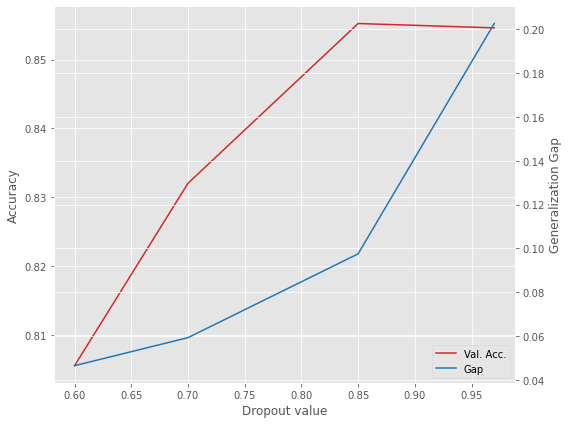

In [117]:
accuracy1 =[stats_drop_06[1:, keys['acc(valid)']][99],
            stats_drop_07[1:, keys['acc(valid)']][99],
            stats_drop_085[1:, keys['acc(valid)']][99],
            stats_drop_097[1:, keys['acc(valid)']][99]]

dropout1 = [0.6,0.7,0.85,0.97]

gap_06 = stats_drop_06[1:, keys['error(valid)']][99]-stats_drop_06[1:, keys['error(train)']][99]
gap_07 = stats_drop_07[1:, keys['error(valid)']][99]-stats_drop_07[1:, keys['error(train)']][99]
gap_085 = stats_drop_085[1:, keys['error(valid)']][99]-stats_drop_085[1:, keys['error(train)']][99]
gap_097 = stats_drop_097[1:, keys['error(valid)']][99]-stats_drop_097[1:, keys['error(train)']][99]

gap1 = [gap_06,gap_07,gap_085,gap_097]

accuracy1 = np.array(accuracy1)
dropout1 = np.array(dropout1)
print(dropout1)
print(accuracy1)
print(gap1)


# ax_1 = fig_1.add_subplot(111)

fig, ax1 = plt.subplots(figsize=(8,6))
plt.grid(color='w', linestyle='solid')
ln1 = ax1.plot(dropout1,accuracy1, label='Val. Acc.',color = 'tab:red')

ax1.set_xlabel('Dropout value')
ax1.set_ylabel('Accuracy')
ax2 = ax1.twinx()

ax2.set_ylabel('Generalization Gap')
ln2 = ax2.plot(dropout1, gap1, label='Gap',color = 'tab:blue')

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=4)
ax_1.legend(loc=0)
fig.tight_layout()
plt.show()
fig.savefig('dropout accuracy graph.png')

In [106]:
def train_model_L1L2(L1_val,L2_val):
    if L1_val == 0:
        weight_penalty = L2Penalty(L2_val)
        biases_penalty = L2Penalty(L2_val)
    else:
        weight_penalty = L1Penalty(L1_val)
        biases_penalty = L1Penalty(L1_val)
       
    # Setup hyperparameters
    learning_rate = 1e-4 # Adam optimizer with a learning rate of 10−4 as specified in the template
    num_epochs = 100
    stats_interval = 1
    input_dim, output_dim, hidden_dim = 784, 47, 128
    # Seed a random number generator
    seed = 11102019 
    rng = np.random.RandomState(seed)
    batch_size = 100
    # Set up a logger object to print info about the training run to stdout
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    logger.handlers = [logging.StreamHandler()]

    # Create data provider objects for the MNIST data set
    train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
    valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weight_penalty,biases_penalty),# first hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weight_penalty,biases_penalty), # second hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weight_penalty,biases_penalty), # third hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weight_penalty,biases_penalty) # output layer])
    ])
    
    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)    
    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)    
        
    return stats

In [107]:
starts_L1_5e4 = train_model_L1L2(5e-4,0)
starts_L1_1e3 = train_model_L1L2(1e-3,0)
starts_L1_5e3 = train_model_L1L2(5e-3,0)
starts_L1_5e2 = train_model_L1L2(5e-2,0)

starts_L2_5e4 = train_model_L1L2(0,5e-4)
starts_L2_1e3 = train_model_L1L2(0,1e-3)
starts_L2_5e3 = train_model_L1L2(0,5e-3)
starts_L2_5e2 = train_model_L1L2(0,5e-2)



KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B6DEB580>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B6DEB580>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.2s to complete
    error(train)=1.47e+00, acc(train)=6.00e-01, error(valid)=1.47e+00, acc(valid)=5.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.1s to complete
    error(train)=1.30e+00, acc(train)=6.41e-01, error(valid)=1.31e+00, acc(valid)=6.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.5s to complete
    error(train)=1.23e+00, acc(train)=6.60e-01, error(valid)=1.24e+00, acc(valid)=6.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.1s to complete
    error(train)=1.16e+00, acc(train)=6.77e-01, error(valid)=1.17e+00, acc(valid)=6.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.5s to complete
    error(train)=1.11e+00, acc(train)=6.90e-01, error(valid)=1.12e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.2s to complete
    error(train)=1.07e+00, acc(train)=6.99e-01, error(valid)=1.08e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.6s to complete
    error(train)=1.03e+00, acc(train)=7.10e-01, error(valid)=1.03e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.1s to complete
    error(train)=9.90e-01, acc(train)=7.18e-01, error(valid)=9.96e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.5s to complete
    error(train)=9.61e-01, acc(train)=7.27e-01, error(valid)=9.66e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.2s to complete
    error(train)=9.35e-01, acc(train)=7.32e-01, error(valid)=9.40e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.6s to complete
    error(train)=9.11e-01, acc(train)=7.39e-01, error(valid)=9.17e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.1s to complete
    error(train)=8.92e-01, acc(train)=7.43e-01, error(valid)=8.97e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.2s to complete
    error(train)=8.77e-01, acc(train)=7.46e-01, error(valid)=8.82e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.1s to complete
    error(train)=8.59e-01, acc(train)=7.50e-01, error(valid)=8.65e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.3s to complete
    error(train)=8.47e-01, acc(train)=7.55e-01, error(valid)=8.52e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.1s to complete
    error(train)=8.37e-01, acc(train)=7.54e-01, error(valid)=8.42e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.0s to complete
    error(train)=8.27e-01, acc(train)=7.59e-01, error(valid)=8.33e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.1s to complete
    error(train)=8.18e-01, acc(train)=7.59e-01, error(valid)=8.23e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.1s to complete
    error(train)=8.12e-01, acc(train)=7.61e-01, error(valid)=8.20e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.1s to complete
    error(train)=8.02e-01, acc(train)=7.65e-01, error(valid)=8.09e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.0s to complete
    error(train)=7.93e-01, acc(train)=7.67e-01, error(valid)=7.98e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.1s to complete
    error(train)=7.89e-01, acc(train)=7.68e-01, error(valid)=7.95e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.1s to complete
    error(train)=7.83e-01, acc(train)=7.70e-01, error(valid)=7.89e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.1s to complete
    error(train)=7.79e-01, acc(train)=7.69e-01, error(valid)=7.85e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.0s to complete
    error(train)=7.70e-01, acc(train)=7.73e-01, error(valid)=7.77e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.0s to complete
    error(train)=7.63e-01, acc(train)=7.74e-01, error(valid)=7.69e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.0s to complete
    error(train)=7.61e-01, acc(train)=7.75e-01, error(valid)=7.66e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.0s to complete
    error(train)=7.57e-01, acc(train)=7.75e-01, error(valid)=7.65e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.8s to complete
    error(train)=7.53e-01, acc(train)=7.77e-01, error(valid)=7.59e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.9s to complete
    error(train)=7.48e-01, acc(train)=7.78e-01, error(valid)=7.55e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.9s to complete
    error(train)=7.42e-01, acc(train)=7.79e-01, error(valid)=7.50e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.0s to complete
    error(train)=7.38e-01, acc(train)=7.81e-01, error(valid)=7.45e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.0s to complete
    error(train)=7.35e-01, acc(train)=7.81e-01, error(valid)=7.42e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.8s to complete
    error(train)=7.36e-01, acc(train)=7.79e-01, error(valid)=7.43e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.8s to complete
    error(train)=7.29e-01, acc(train)=7.81e-01, error(valid)=7.37e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.9s to complete
    error(train)=7.26e-01, acc(train)=7.82e-01, error(valid)=7.36e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.9s to complete
    error(train)=7.22e-01, acc(train)=7.84e-01, error(valid)=7.29e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.8s to complete
    error(train)=7.20e-01, acc(train)=7.83e-01, error(valid)=7.27e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.1s to complete
    error(train)=7.19e-01, acc(train)=7.85e-01, error(valid)=7.27e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.2s to complete
    error(train)=7.14e-01, acc(train)=7.85e-01, error(valid)=7.22e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.0s to complete
    error(train)=7.13e-01, acc(train)=7.85e-01, error(valid)=7.23e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.9s to complete
    error(train)=7.08e-01, acc(train)=7.89e-01, error(valid)=7.15e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.0s to complete
    error(train)=7.12e-01, acc(train)=7.86e-01, error(valid)=7.21e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.9s to complete
    error(train)=7.06e-01, acc(train)=7.88e-01, error(valid)=7.13e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.0s to complete
    error(train)=7.01e-01, acc(train)=7.89e-01, error(valid)=7.10e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.8s to complete
    error(train)=7.05e-01, acc(train)=7.87e-01, error(valid)=7.14e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.0s to complete
    error(train)=6.99e-01, acc(train)=7.90e-01, error(valid)=7.08e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.0s to complete
    error(train)=6.95e-01, acc(train)=7.91e-01, error(valid)=7.05e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.0s to complete
    error(train)=7.01e-01, acc(train)=7.89e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.8s to complete
    error(train)=6.95e-01, acc(train)=7.90e-01, error(valid)=7.03e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.9s to complete
    error(train)=6.92e-01, acc(train)=7.91e-01, error(valid)=7.00e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.0s to complete
    error(train)=6.90e-01, acc(train)=7.92e-01, error(valid)=7.00e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.0s to complete
    error(train)=6.90e-01, acc(train)=7.90e-01, error(valid)=7.01e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.9s to complete
    error(train)=6.88e-01, acc(train)=7.92e-01, error(valid)=6.96e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.0s to complete
    error(train)=6.85e-01, acc(train)=7.92e-01, error(valid)=6.97e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.0s to complete
    error(train)=6.84e-01, acc(train)=7.93e-01, error(valid)=6.94e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.8s to complete
    error(train)=6.80e-01, acc(train)=7.94e-01, error(valid)=6.90e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.9s to complete
    error(train)=6.80e-01, acc(train)=7.94e-01, error(valid)=6.90e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.0s to complete
    error(train)=6.78e-01, acc(train)=7.95e-01, error(valid)=6.88e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.0s to complete
    error(train)=6.77e-01, acc(train)=7.94e-01, error(valid)=6.87e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.0s to complete
    error(train)=6.74e-01, acc(train)=7.95e-01, error(valid)=6.85e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.9s to complete
    error(train)=6.75e-01, acc(train)=7.95e-01, error(valid)=6.86e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.0s to complete
    error(train)=6.74e-01, acc(train)=7.95e-01, error(valid)=6.86e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.9s to complete
    error(train)=6.71e-01, acc(train)=7.96e-01, error(valid)=6.82e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.2s to complete
    error(train)=6.70e-01, acc(train)=7.97e-01, error(valid)=6.81e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.0s to complete
    error(train)=6.73e-01, acc(train)=7.94e-01, error(valid)=6.84e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.0s to complete
    error(train)=6.70e-01, acc(train)=7.95e-01, error(valid)=6.81e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.8s to complete
    error(train)=6.66e-01, acc(train)=7.97e-01, error(valid)=6.77e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.9s to complete
    error(train)=6.66e-01, acc(train)=7.96e-01, error(valid)=6.76e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.0s to complete
    error(train)=6.69e-01, acc(train)=7.95e-01, error(valid)=6.81e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.0s to complete
    error(train)=6.63e-01, acc(train)=7.97e-01, error(valid)=6.74e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.9s to complete
    error(train)=6.60e-01, acc(train)=7.99e-01, error(valid)=6.71e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.8s to complete
    error(train)=6.61e-01, acc(train)=7.98e-01, error(valid)=6.73e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.8s to complete
    error(train)=6.58e-01, acc(train)=7.99e-01, error(valid)=6.71e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.9s to complete
    error(train)=6.60e-01, acc(train)=7.98e-01, error(valid)=6.73e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.0s to complete
    error(train)=6.57e-01, acc(train)=7.99e-01, error(valid)=6.69e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.9s to complete
    error(train)=6.56e-01, acc(train)=7.99e-01, error(valid)=6.69e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.9s to complete
    error(train)=6.56e-01, acc(train)=7.99e-01, error(valid)=6.69e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.1s to complete
    error(train)=6.55e-01, acc(train)=7.99e-01, error(valid)=6.69e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.0s to complete
    error(train)=6.52e-01, acc(train)=8.00e-01, error(valid)=6.66e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.9s to complete
    error(train)=6.54e-01, acc(train)=8.01e-01, error(valid)=6.68e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.9s to complete
    error(train)=6.52e-01, acc(train)=7.99e-01, error(valid)=6.65e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.9s to complete
    error(train)=6.53e-01, acc(train)=7.98e-01, error(valid)=6.67e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.9s to complete
    error(train)=6.53e-01, acc(train)=7.99e-01, error(valid)=6.65e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.9s to complete
    error(train)=6.49e-01, acc(train)=8.01e-01, error(valid)=6.62e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.0s to complete
    error(train)=6.50e-01, acc(train)=8.01e-01, error(valid)=6.63e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.9s to complete
    error(train)=6.48e-01, acc(train)=8.00e-01, error(valid)=6.62e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.9s to complete
    error(train)=6.48e-01, acc(train)=8.01e-01, error(valid)=6.62e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.1s to complete
    error(train)=6.49e-01, acc(train)=8.00e-01, error(valid)=6.64e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.1s to complete
    error(train)=6.44e-01, acc(train)=8.02e-01, error(valid)=6.57e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.0s to complete
    error(train)=6.46e-01, acc(train)=8.00e-01, error(valid)=6.63e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.9s to complete
    error(train)=6.42e-01, acc(train)=8.02e-01, error(valid)=6.57e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.9s to complete
    error(train)=6.45e-01, acc(train)=8.01e-01, error(valid)=6.59e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.0s to complete
    error(train)=6.41e-01, acc(train)=8.03e-01, error(valid)=6.56e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.9s to complete
    error(train)=6.41e-01, acc(train)=8.02e-01, error(valid)=6.55e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.9s to complete
    error(train)=6.39e-01, acc(train)=8.04e-01, error(valid)=6.54e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.9s to complete
    error(train)=6.40e-01, acc(train)=8.02e-01, error(valid)=6.58e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.9s to complete
    error(train)=6.39e-01, acc(train)=8.03e-01, error(valid)=6.55e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.9s to complete
    error(train)=6.36e-01, acc(train)=8.04e-01, error(valid)=6.53e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.9s to complete
    error(train)=6.41e-01, acc(train)=8.03e-01, error(valid)=6.57e-01, acc(valid)=7.97e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B617ED10>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D29C535360>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.9s to complete
    error(train)=1.67e+00, acc(train)=5.60e-01, error(valid)=1.68e+00, acc(valid)=5.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.5s to complete
    error(train)=1.53e+00, acc(train)=5.94e-01, error(valid)=1.53e+00, acc(valid)=5.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.4s to complete
    error(train)=1.46e+00, acc(train)=6.08e-01, error(valid)=1.47e+00, acc(valid)=6.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.4s to complete
    error(train)=1.41e+00, acc(train)=6.20e-01, error(valid)=1.42e+00, acc(valid)=6.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.5s to complete
    error(train)=1.37e+00, acc(train)=6.29e-01, error(valid)=1.38e+00, acc(valid)=6.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.5s to complete
    error(train)=1.34e+00, acc(train)=6.33e-01, error(valid)=1.35e+00, acc(valid)=6.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.4s to complete
    error(train)=1.31e+00, acc(train)=6.42e-01, error(valid)=1.32e+00, acc(valid)=6.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.5s to complete
    error(train)=1.28e+00, acc(train)=6.47e-01, error(valid)=1.29e+00, acc(valid)=6.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.5s to complete
    error(train)=1.26e+00, acc(train)=6.53e-01, error(valid)=1.27e+00, acc(valid)=6.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.5s to complete
    error(train)=1.24e+00, acc(train)=6.58e-01, error(valid)=1.25e+00, acc(valid)=6.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.5s to complete
    error(train)=1.22e+00, acc(train)=6.63e-01, error(valid)=1.22e+00, acc(valid)=6.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.5s to complete
    error(train)=1.20e+00, acc(train)=6.65e-01, error(valid)=1.21e+00, acc(valid)=6.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.6s to complete
    error(train)=1.19e+00, acc(train)=6.70e-01, error(valid)=1.19e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.6s to complete
    error(train)=1.17e+00, acc(train)=6.74e-01, error(valid)=1.18e+00, acc(valid)=6.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.6s to complete
    error(train)=1.16e+00, acc(train)=6.77e-01, error(valid)=1.16e+00, acc(valid)=6.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.6s to complete
    error(train)=1.15e+00, acc(train)=6.77e-01, error(valid)=1.15e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.6s to complete
    error(train)=1.13e+00, acc(train)=6.83e-01, error(valid)=1.14e+00, acc(valid)=6.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.6s to complete
    error(train)=1.12e+00, acc(train)=6.85e-01, error(valid)=1.13e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.6s to complete
    error(train)=1.11e+00, acc(train)=6.84e-01, error(valid)=1.12e+00, acc(valid)=6.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.6s to complete
    error(train)=1.10e+00, acc(train)=6.90e-01, error(valid)=1.11e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.6s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.10e+00, acc(valid)=6.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.6s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.09e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.6s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.6s to complete
    error(train)=1.07e+00, acc(train)=6.96e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.6s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.7s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.7s to complete
    error(train)=1.04e+00, acc(train)=7.04e-01, error(valid)=1.04e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.6s to complete
    error(train)=1.03e+00, acc(train)=7.06e-01, error(valid)=1.04e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.6s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.03e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.6s to complete
    error(train)=1.02e+00, acc(train)=7.09e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.6s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.01e+00, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.6s to complete
    error(train)=1.00e+00, acc(train)=7.13e-01, error(valid)=1.00e+00, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.6s to complete
    error(train)=9.94e-01, acc(train)=7.15e-01, error(valid)=9.97e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.6s to complete
    error(train)=9.92e-01, acc(train)=7.14e-01, error(valid)=9.96e-01, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.6s to complete
    error(train)=9.82e-01, acc(train)=7.17e-01, error(valid)=9.86e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.6s to complete
    error(train)=9.80e-01, acc(train)=7.17e-01, error(valid)=9.85e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.6s to complete
    error(train)=9.71e-01, acc(train)=7.21e-01, error(valid)=9.75e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.6s to complete
    error(train)=9.66e-01, acc(train)=7.21e-01, error(valid)=9.70e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.6s to complete
    error(train)=9.63e-01, acc(train)=7.22e-01, error(valid)=9.68e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.6s to complete
    error(train)=9.57e-01, acc(train)=7.23e-01, error(valid)=9.60e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.6s to complete
    error(train)=9.53e-01, acc(train)=7.24e-01, error(valid)=9.58e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.6s to complete
    error(train)=9.48e-01, acc(train)=7.27e-01, error(valid)=9.52e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.6s to complete
    error(train)=9.48e-01, acc(train)=7.26e-01, error(valid)=9.53e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.6s to complete
    error(train)=9.40e-01, acc(train)=7.28e-01, error(valid)=9.44e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.6s to complete
    error(train)=9.37e-01, acc(train)=7.29e-01, error(valid)=9.42e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.6s to complete
    error(train)=9.36e-01, acc(train)=7.27e-01, error(valid)=9.41e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.6s to complete
    error(train)=9.30e-01, acc(train)=7.30e-01, error(valid)=9.34e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.6s to complete
    error(train)=9.26e-01, acc(train)=7.31e-01, error(valid)=9.32e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.6s to complete
    error(train)=9.29e-01, acc(train)=7.31e-01, error(valid)=9.34e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.6s to complete
    error(train)=9.23e-01, acc(train)=7.33e-01, error(valid)=9.27e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.6s to complete
    error(train)=9.18e-01, acc(train)=7.34e-01, error(valid)=9.22e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.7s to complete
    error(train)=9.15e-01, acc(train)=7.34e-01, error(valid)=9.21e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.6s to complete
    error(train)=9.15e-01, acc(train)=7.33e-01, error(valid)=9.21e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.5s to complete
    error(train)=9.10e-01, acc(train)=7.35e-01, error(valid)=9.15e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.5s to complete
    error(train)=9.08e-01, acc(train)=7.35e-01, error(valid)=9.14e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.5s to complete
    error(train)=9.06e-01, acc(train)=7.36e-01, error(valid)=9.10e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.5s to complete
    error(train)=9.01e-01, acc(train)=7.37e-01, error(valid)=9.07e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.5s to complete
    error(train)=9.00e-01, acc(train)=7.37e-01, error(valid)=9.06e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.5s to complete
    error(train)=8.98e-01, acc(train)=7.38e-01, error(valid)=9.03e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.5s to complete
    error(train)=8.96e-01, acc(train)=7.38e-01, error(valid)=9.03e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.5s to complete
    error(train)=8.93e-01, acc(train)=7.39e-01, error(valid)=8.98e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.5s to complete
    error(train)=8.93e-01, acc(train)=7.39e-01, error(valid)=9.00e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.5s to complete
    error(train)=8.91e-01, acc(train)=7.40e-01, error(valid)=8.98e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.5s to complete
    error(train)=8.87e-01, acc(train)=7.41e-01, error(valid)=8.93e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.5s to complete
    error(train)=8.86e-01, acc(train)=7.42e-01, error(valid)=8.92e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.5s to complete
    error(train)=8.85e-01, acc(train)=7.41e-01, error(valid)=8.92e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.5s to complete
    error(train)=8.83e-01, acc(train)=7.41e-01, error(valid)=8.90e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.5s to complete
    error(train)=8.80e-01, acc(train)=7.43e-01, error(valid)=8.86e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.5s to complete
    error(train)=8.79e-01, acc(train)=7.42e-01, error(valid)=8.85e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.5s to complete
    error(train)=8.81e-01, acc(train)=7.42e-01, error(valid)=8.87e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.5s to complete
    error(train)=8.75e-01, acc(train)=7.44e-01, error(valid)=8.82e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.5s to complete
    error(train)=8.73e-01, acc(train)=7.45e-01, error(valid)=8.80e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.5s to complete
    error(train)=8.73e-01, acc(train)=7.44e-01, error(valid)=8.79e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.5s to complete
    error(train)=8.70e-01, acc(train)=7.44e-01, error(valid)=8.77e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.5s to complete
    error(train)=8.68e-01, acc(train)=7.45e-01, error(valid)=8.75e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.5s to complete
    error(train)=8.67e-01, acc(train)=7.46e-01, error(valid)=8.75e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.5s to complete
    error(train)=8.65e-01, acc(train)=7.45e-01, error(valid)=8.73e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.6s to complete
    error(train)=8.65e-01, acc(train)=7.47e-01, error(valid)=8.73e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.7s to complete
    error(train)=8.64e-01, acc(train)=7.48e-01, error(valid)=8.72e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.7s to complete
    error(train)=8.61e-01, acc(train)=7.47e-01, error(valid)=8.69e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.6s to complete
    error(train)=8.60e-01, acc(train)=7.48e-01, error(valid)=8.69e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.6s to complete
    error(train)=8.59e-01, acc(train)=7.48e-01, error(valid)=8.66e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.6s to complete
    error(train)=8.58e-01, acc(train)=7.47e-01, error(valid)=8.65e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.4s to complete
    error(train)=8.56e-01, acc(train)=7.48e-01, error(valid)=8.63e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.5s to complete
    error(train)=8.54e-01, acc(train)=7.50e-01, error(valid)=8.61e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.7s to complete
    error(train)=8.54e-01, acc(train)=7.49e-01, error(valid)=8.61e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.5s to complete
    error(train)=8.53e-01, acc(train)=7.50e-01, error(valid)=8.61e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.6s to complete
    error(train)=8.49e-01, acc(train)=7.50e-01, error(valid)=8.56e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.8s to complete
    error(train)=8.51e-01, acc(train)=7.49e-01, error(valid)=8.59e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.5s to complete
    error(train)=8.46e-01, acc(train)=7.51e-01, error(valid)=8.54e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.6s to complete
    error(train)=8.50e-01, acc(train)=7.50e-01, error(valid)=8.58e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.6s to complete
    error(train)=8.46e-01, acc(train)=7.51e-01, error(valid)=8.54e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.5s to complete
    error(train)=8.46e-01, acc(train)=7.51e-01, error(valid)=8.53e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.5s to complete
    error(train)=8.43e-01, acc(train)=7.52e-01, error(valid)=8.51e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.4s to complete
    error(train)=8.44e-01, acc(train)=7.52e-01, error(valid)=8.51e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.4s to complete
    error(train)=8.40e-01, acc(train)=7.52e-01, error(valid)=8.48e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.4s to complete
    error(train)=8.40e-01, acc(train)=7.53e-01, error(valid)=8.49e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.4s to complete
    error(train)=8.38e-01, acc(train)=7.53e-01, error(valid)=8.47e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.4s to complete
    error(train)=8.37e-01, acc(train)=7.54e-01, error(valid)=8.46e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.4s to complete
    error(train)=8.41e-01, acc(train)=7.52e-01, error(valid)=8.49e-01, acc(valid)=7.51e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B807F4F0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D29BC05390>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.4s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.4s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.4s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.41e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B851CC10>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B851CC10>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.14e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.41e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.14e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.14e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B8983E20>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B89837C0>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.5s to complete
    error(train)=1.33e+00, acc(train)=6.29e-01, error(valid)=1.33e+00, acc(valid)=6.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.5s to complete
    error(train)=1.10e+00, acc(train)=6.89e-01, error(valid)=1.11e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.5s to complete
    error(train)=9.73e-01, acc(train)=7.19e-01, error(valid)=9.84e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.5s to complete
    error(train)=8.82e-01, acc(train)=7.42e-01, error(valid)=8.96e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.5s to complete
    error(train)=8.16e-01, acc(train)=7.58e-01, error(valid)=8.32e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.5s to complete
    error(train)=7.64e-01, acc(train)=7.72e-01, error(valid)=7.81e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.5s to complete
    error(train)=7.21e-01, acc(train)=7.83e-01, error(valid)=7.42e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.5s to complete
    error(train)=6.87e-01, acc(train)=7.90e-01, error(valid)=7.11e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.5s to complete
    error(train)=6.57e-01, acc(train)=8.00e-01, error(valid)=6.84e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.5s to complete
    error(train)=6.37e-01, acc(train)=8.05e-01, error(valid)=6.64e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.5s to complete
    error(train)=6.16e-01, acc(train)=8.10e-01, error(valid)=6.49e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.5s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=6.32e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.5s to complete
    error(train)=5.81e-01, acc(train)=8.19e-01, error(valid)=6.17e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.1s to complete
    error(train)=5.68e-01, acc(train)=8.22e-01, error(valid)=6.05e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.3s to complete
    error(train)=5.56e-01, acc(train)=8.26e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.1s to complete
    error(train)=5.45e-01, acc(train)=8.28e-01, error(valid)=5.87e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.0s to complete
    error(train)=5.32e-01, acc(train)=8.32e-01, error(valid)=5.77e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.7s to complete
    error(train)=5.28e-01, acc(train)=8.30e-01, error(valid)=5.73e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.9s to complete
    error(train)=5.15e-01, acc(train)=8.35e-01, error(valid)=5.64e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.9s to complete
    error(train)=5.07e-01, acc(train)=8.39e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.9s to complete
    error(train)=4.97e-01, acc(train)=8.43e-01, error(valid)=5.47e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.0s to complete
    error(train)=4.93e-01, acc(train)=8.42e-01, error(valid)=5.47e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.0s to complete
    error(train)=4.84e-01, acc(train)=8.45e-01, error(valid)=5.41e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.0s to complete
    error(train)=4.78e-01, acc(train)=8.47e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.9s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.0s to complete
    error(train)=4.63e-01, acc(train)=8.50e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.0s to complete
    error(train)=4.60e-01, acc(train)=8.53e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.0s to complete
    error(train)=4.54e-01, acc(train)=8.54e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.9s to complete
    error(train)=4.53e-01, acc(train)=8.54e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 8.0s to complete
    error(train)=4.46e-01, acc(train)=8.55e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.9s to complete
    error(train)=4.39e-01, acc(train)=8.58e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.4s to complete
    error(train)=4.38e-01, acc(train)=8.58e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.4s to complete
    error(train)=4.28e-01, acc(train)=8.61e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.4s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.4s to complete
    error(train)=4.22e-01, acc(train)=8.63e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.5s to complete
    error(train)=4.18e-01, acc(train)=8.64e-01, error(valid)=4.96e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.5s to complete
    error(train)=4.15e-01, acc(train)=8.65e-01, error(valid)=4.94e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.4s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 8.4s to complete
    error(train)=4.09e-01, acc(train)=8.67e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 8.4s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 8.5s to complete
    error(train)=4.01e-01, acc(train)=8.68e-01, error(valid)=4.88e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 8.4s to complete
    error(train)=3.97e-01, acc(train)=8.70e-01, error(valid)=4.81e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.4s to complete
    error(train)=4.01e-01, acc(train)=8.68e-01, error(valid)=4.89e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 8.4s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.4s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=4.81e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.4s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.4s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=4.80e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.4s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=4.78e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.4s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 8.4s to complete
    error(train)=3.84e-01, acc(train)=8.70e-01, error(valid)=4.79e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 8.4s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.6s to complete
    error(train)=3.72e-01, acc(train)=8.77e-01, error(valid)=4.73e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.4s to complete
    error(train)=3.74e-01, acc(train)=8.76e-01, error(valid)=4.75e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.4s to complete
    error(train)=3.72e-01, acc(train)=8.76e-01, error(valid)=4.73e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.5s to complete
    error(train)=3.66e-01, acc(train)=8.78e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.4s to complete
    error(train)=3.65e-01, acc(train)=8.78e-01, error(valid)=4.68e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.4s to complete
    error(train)=3.62e-01, acc(train)=8.79e-01, error(valid)=4.69e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.5s to complete
    error(train)=3.59e-01, acc(train)=8.80e-01, error(valid)=4.66e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.4s to complete
    error(train)=3.59e-01, acc(train)=8.80e-01, error(valid)=4.67e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.0s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=4.66e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.5s to complete
    error(train)=3.56e-01, acc(train)=8.81e-01, error(valid)=4.67e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.0s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.5s to complete
    error(train)=3.53e-01, acc(train)=8.82e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.0s to complete
    error(train)=3.50e-01, acc(train)=8.82e-01, error(valid)=4.66e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.5s to complete
    error(train)=3.52e-01, acc(train)=8.82e-01, error(valid)=4.69e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.0s to complete
    error(train)=3.56e-01, acc(train)=8.79e-01, error(valid)=4.74e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.5s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.0s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.4s to complete
    error(train)=3.41e-01, acc(train)=8.85e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 8.0s to complete
    error(train)=3.42e-01, acc(train)=8.85e-01, error(valid)=4.64e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.4s to complete
    error(train)=3.39e-01, acc(train)=8.86e-01, error(valid)=4.60e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 8.0s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=4.62e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.4s to complete
    error(train)=3.35e-01, acc(train)=8.86e-01, error(valid)=4.58e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.9s to complete
    error(train)=3.37e-01, acc(train)=8.87e-01, error(valid)=4.60e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 8.1s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=4.59e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.0s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=4.62e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.0s to complete
    error(train)=3.29e-01, acc(train)=8.89e-01, error(valid)=4.57e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.0s to complete
    error(train)=3.28e-01, acc(train)=8.89e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.0s to complete
    error(train)=3.29e-01, acc(train)=8.89e-01, error(valid)=4.57e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.9s to complete
    error(train)=3.30e-01, acc(train)=8.86e-01, error(valid)=4.62e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.0s to complete
    error(train)=3.31e-01, acc(train)=8.88e-01, error(valid)=4.63e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.0s to complete
    error(train)=3.23e-01, acc(train)=8.90e-01, error(valid)=4.56e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.0s to complete
    error(train)=3.26e-01, acc(train)=8.90e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.0s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.4s to complete
    error(train)=3.21e-01, acc(train)=8.91e-01, error(valid)=4.54e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.4s to complete
    error(train)=3.27e-01, acc(train)=8.88e-01, error(valid)=4.60e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.1s to complete
    error(train)=3.17e-01, acc(train)=8.92e-01, error(valid)=4.55e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.2s to complete
    error(train)=3.19e-01, acc(train)=8.91e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.4s to complete
    error(train)=3.20e-01, acc(train)=8.91e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 8.0s to complete
    error(train)=3.11e-01, acc(train)=8.96e-01, error(valid)=4.50e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.1s to complete
    error(train)=3.14e-01, acc(train)=8.93e-01, error(valid)=4.53e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.9s to complete
    error(train)=3.12e-01, acc(train)=8.94e-01, error(valid)=4.55e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.0s to complete
    error(train)=3.20e-01, acc(train)=8.90e-01, error(valid)=4.63e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.0s to complete
    error(train)=3.09e-01, acc(train)=8.94e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.0s to complete
    error(train)=3.06e-01, acc(train)=8.96e-01, error(valid)=4.49e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.9s to complete
    error(train)=3.12e-01, acc(train)=8.93e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.0s to complete
    error(train)=3.10e-01, acc(train)=8.94e-01, error(valid)=4.57e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.0s to complete
    error(train)=3.09e-01, acc(train)=8.95e-01, error(valid)=4.54e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.0s to complete
    error(train)=3.04e-01, acc(train)=8.96e-01, error(valid)=4.52e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.9s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=4.61e-01, acc(valid)=8.48e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B8E139A0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B8E13DC0>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.2s to complete
    error(train)=1.34e+00, acc(train)=6.27e-01, error(valid)=1.34e+00, acc(valid)=6.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.2s to complete
    error(train)=1.11e+00, acc(train)=6.86e-01, error(valid)=1.12e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.2s to complete
    error(train)=9.88e-01, acc(train)=7.15e-01, error(valid)=9.99e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.2s to complete
    error(train)=8.97e-01, acc(train)=7.39e-01, error(valid)=9.10e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.2s to complete
    error(train)=8.30e-01, acc(train)=7.55e-01, error(valid)=8.45e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.3s to complete
    error(train)=7.78e-01, acc(train)=7.69e-01, error(valid)=7.94e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.2s to complete
    error(train)=7.36e-01, acc(train)=7.79e-01, error(valid)=7.55e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.2s to complete
    error(train)=7.01e-01, acc(train)=7.87e-01, error(valid)=7.23e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.2s to complete
    error(train)=6.73e-01, acc(train)=7.96e-01, error(valid)=6.97e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.2s to complete
    error(train)=6.53e-01, acc(train)=8.01e-01, error(valid)=6.76e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.2s to complete
    error(train)=6.33e-01, acc(train)=8.06e-01, error(valid)=6.62e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.2s to complete
    error(train)=6.15e-01, acc(train)=8.10e-01, error(valid)=6.45e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.2s to complete
    error(train)=5.99e-01, acc(train)=8.15e-01, error(valid)=6.30e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.9s to complete
    error(train)=5.86e-01, acc(train)=8.18e-01, error(valid)=6.18e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.1s to complete
    error(train)=5.75e-01, acc(train)=8.22e-01, error(valid)=6.08e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.0s to complete
    error(train)=5.64e-01, acc(train)=8.24e-01, error(valid)=6.00e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.7s to complete
    error(train)=5.52e-01, acc(train)=8.27e-01, error(valid)=5.89e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.5s to complete
    error(train)=5.48e-01, acc(train)=8.26e-01, error(valid)=5.86e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.7s to complete
    error(train)=5.36e-01, acc(train)=8.30e-01, error(valid)=5.78e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.7s to complete
    error(train)=5.28e-01, acc(train)=8.35e-01, error(valid)=5.71e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.7s to complete
    error(train)=5.18e-01, acc(train)=8.37e-01, error(valid)=5.60e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.8s to complete
    error(train)=5.15e-01, acc(train)=8.37e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.8s to complete
    error(train)=5.06e-01, acc(train)=8.40e-01, error(valid)=5.54e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.7s to complete
    error(train)=5.01e-01, acc(train)=8.41e-01, error(valid)=5.50e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.7s to complete
    error(train)=4.94e-01, acc(train)=8.43e-01, error(valid)=5.44e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.8s to complete
    error(train)=4.86e-01, acc(train)=8.44e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.7s to complete
    error(train)=4.83e-01, acc(train)=8.47e-01, error(valid)=5.36e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.7s to complete
    error(train)=4.79e-01, acc(train)=8.48e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.7s to complete
    error(train)=4.77e-01, acc(train)=8.47e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.7s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.8s to complete
    error(train)=4.65e-01, acc(train)=8.51e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.7s to complete
    error(train)=4.63e-01, acc(train)=8.52e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.8s to complete
    error(train)=4.56e-01, acc(train)=8.54e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.8s to complete
    error(train)=4.56e-01, acc(train)=8.53e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.8s to complete
    error(train)=4.49e-01, acc(train)=8.55e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.8s to complete
    error(train)=4.43e-01, acc(train)=8.58e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.8s to complete
    error(train)=4.42e-01, acc(train)=8.58e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.9s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.7s to complete
    error(train)=4.37e-01, acc(train)=8.59e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.9s to complete
    error(train)=4.33e-01, acc(train)=8.59e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.8s to complete
    error(train)=4.30e-01, acc(train)=8.61e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.8s to complete
    error(train)=4.25e-01, acc(train)=8.63e-01, error(valid)=4.89e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.8s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.9s to complete
    error(train)=4.25e-01, acc(train)=8.62e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.8s to complete
    error(train)=4.21e-01, acc(train)=8.64e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.9s to complete
    error(train)=4.20e-01, acc(train)=8.63e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.8s to complete
    error(train)=4.16e-01, acc(train)=8.65e-01, error(valid)=4.86e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.9s to complete
    error(train)=4.13e-01, acc(train)=8.66e-01, error(valid)=4.86e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.8s to complete
    error(train)=4.16e-01, acc(train)=8.65e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 8.4s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 8.0s to complete
    error(train)=4.08e-01, acc(train)=8.67e-01, error(valid)=4.80e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.2s to complete
    error(train)=4.04e-01, acc(train)=8.69e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.0s to complete
    error(train)=4.08e-01, acc(train)=8.67e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.4s to complete
    error(train)=4.05e-01, acc(train)=8.68e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 7.7s to complete
    error(train)=4.02e-01, acc(train)=8.68e-01, error(valid)=4.77e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.9s to complete
    error(train)=4.01e-01, acc(train)=8.69e-01, error(valid)=4.75e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.2s to complete
    error(train)=3.97e-01, acc(train)=8.70e-01, error(valid)=4.74e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.8s to complete
    error(train)=3.95e-01, acc(train)=8.71e-01, error(valid)=4.72e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.9s to complete
    error(train)=3.94e-01, acc(train)=8.70e-01, error(valid)=4.71e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 7.7s to complete
    error(train)=3.93e-01, acc(train)=8.70e-01, error(valid)=4.71e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.0s to complete
    error(train)=3.95e-01, acc(train)=8.71e-01, error(valid)=4.73e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.0s to complete
    error(train)=3.91e-01, acc(train)=8.72e-01, error(valid)=4.71e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.0s to complete
    error(train)=3.91e-01, acc(train)=8.72e-01, error(valid)=4.71e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.0s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=4.70e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.9s to complete
    error(train)=3.89e-01, acc(train)=8.72e-01, error(valid)=4.72e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.0s to complete
    error(train)=3.94e-01, acc(train)=8.69e-01, error(valid)=4.76e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.0s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=4.70e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.0s to complete
    error(train)=3.88e-01, acc(train)=8.70e-01, error(valid)=4.71e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.9s to complete
    error(train)=3.80e-01, acc(train)=8.75e-01, error(valid)=4.60e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.9s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=4.68e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.8s to complete
    error(train)=3.79e-01, acc(train)=8.76e-01, error(valid)=4.61e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.9s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=4.64e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.9s to complete
    error(train)=3.77e-01, acc(train)=8.75e-01, error(valid)=4.61e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.9s to complete
    error(train)=3.79e-01, acc(train)=8.75e-01, error(valid)=4.63e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.9s to complete
    error(train)=3.75e-01, acc(train)=8.76e-01, error(valid)=4.61e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.9s to complete
    error(train)=3.79e-01, acc(train)=8.76e-01, error(valid)=4.63e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.9s to complete
    error(train)=3.72e-01, acc(train)=8.77e-01, error(valid)=4.58e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.9s to complete
    error(train)=3.71e-01, acc(train)=8.78e-01, error(valid)=4.59e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.9s to complete
    error(train)=3.73e-01, acc(train)=8.77e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.8s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=4.62e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.9s to complete
    error(train)=3.75e-01, acc(train)=8.77e-01, error(valid)=4.64e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.9s to complete
    error(train)=3.68e-01, acc(train)=8.78e-01, error(valid)=4.56e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.0s to complete
    error(train)=3.69e-01, acc(train)=8.77e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.9s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=4.62e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.9s to complete
    error(train)=3.65e-01, acc(train)=8.79e-01, error(valid)=4.54e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.9s to complete
    error(train)=3.71e-01, acc(train)=8.77e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.9s to complete
    error(train)=3.64e-01, acc(train)=8.79e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.9s to complete
    error(train)=3.67e-01, acc(train)=8.79e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.0s to complete
    error(train)=3.65e-01, acc(train)=8.80e-01, error(valid)=4.56e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 8.0s to complete
    error(train)=3.58e-01, acc(train)=8.82e-01, error(valid)=4.49e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.9s to complete
    error(train)=3.61e-01, acc(train)=8.80e-01, error(valid)=4.53e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.9s to complete
    error(train)=3.60e-01, acc(train)=8.80e-01, error(valid)=4.53e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.9s to complete
    error(train)=3.65e-01, acc(train)=8.78e-01, error(valid)=4.58e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.9s to complete
    error(train)=3.58e-01, acc(train)=8.81e-01, error(valid)=4.52e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.9s to complete
    error(train)=3.55e-01, acc(train)=8.83e-01, error(valid)=4.48e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.1s to complete
    error(train)=3.62e-01, acc(train)=8.80e-01, error(valid)=4.57e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.9s to complete
    error(train)=3.58e-01, acc(train)=8.81e-01, error(valid)=4.52e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.9s to complete
    error(train)=3.59e-01, acc(train)=8.82e-01, error(valid)=4.52e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.9s to complete
    error(train)=3.54e-01, acc(train)=8.83e-01, error(valid)=4.49e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.8s to complete
    error(train)=3.61e-01, acc(train)=8.79e-01, error(valid)=4.56e-01, acc(valid)=8.50e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B93EF0D0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B93EF6A0>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.5s to complete
    error(train)=1.41e+00, acc(train)=6.13e-01, error(valid)=1.41e+00, acc(valid)=6.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.5s to complete
    error(train)=1.20e+00, acc(train)=6.67e-01, error(valid)=1.21e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.8s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.10e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.8s to complete
    error(train)=1.01e+00, acc(train)=7.13e-01, error(valid)=1.02e+00, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.8s to complete
    error(train)=9.52e-01, acc(train)=7.28e-01, error(valid)=9.60e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.8s to complete
    error(train)=9.06e-01, acc(train)=7.39e-01, error(valid)=9.15e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.8s to complete
    error(train)=8.67e-01, acc(train)=7.50e-01, error(valid)=8.76e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.8s to complete
    error(train)=8.36e-01, acc(train)=7.58e-01, error(valid)=8.45e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.8s to complete
    error(train)=8.12e-01, acc(train)=7.66e-01, error(valid)=8.21e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.8s to complete
    error(train)=7.92e-01, acc(train)=7.70e-01, error(valid)=8.01e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.8s to complete
    error(train)=7.77e-01, acc(train)=7.74e-01, error(valid)=7.88e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.8s to complete
    error(train)=7.62e-01, acc(train)=7.77e-01, error(valid)=7.73e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.8s to complete
    error(train)=7.50e-01, acc(train)=7.80e-01, error(valid)=7.61e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.3s to complete
    error(train)=7.38e-01, acc(train)=7.83e-01, error(valid)=7.49e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.4s to complete
    error(train)=7.30e-01, acc(train)=7.87e-01, error(valid)=7.40e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.1s to complete
    error(train)=7.24e-01, acc(train)=7.86e-01, error(valid)=7.34e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.8s to complete
    error(train)=7.18e-01, acc(train)=7.89e-01, error(valid)=7.29e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.5s to complete
    error(train)=7.10e-01, acc(train)=7.90e-01, error(valid)=7.22e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.6s to complete
    error(train)=7.08e-01, acc(train)=7.88e-01, error(valid)=7.22e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.3s to complete
    error(train)=6.99e-01, acc(train)=7.95e-01, error(valid)=7.12e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.8s to complete
    error(train)=6.88e-01, acc(train)=7.96e-01, error(valid)=7.00e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.2s to complete
    error(train)=6.87e-01, acc(train)=7.96e-01, error(valid)=7.00e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.0s to complete
    error(train)=6.83e-01, acc(train)=7.98e-01, error(valid)=6.96e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.3s to complete
    error(train)=6.79e-01, acc(train)=7.99e-01, error(valid)=6.92e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.3s to complete
    error(train)=6.73e-01, acc(train)=8.01e-01, error(valid)=6.87e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.3s to complete
    error(train)=6.67e-01, acc(train)=8.02e-01, error(valid)=6.80e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.3s to complete
    error(train)=6.67e-01, acc(train)=8.02e-01, error(valid)=6.81e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.9s to complete
    error(train)=6.64e-01, acc(train)=8.04e-01, error(valid)=6.80e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.0s to complete
    error(train)=6.58e-01, acc(train)=8.05e-01, error(valid)=6.73e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.0s to complete
    error(train)=6.56e-01, acc(train)=8.04e-01, error(valid)=6.72e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.0s to complete
    error(train)=6.51e-01, acc(train)=8.07e-01, error(valid)=6.66e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.0s to complete
    error(train)=6.48e-01, acc(train)=8.08e-01, error(valid)=6.63e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.0s to complete
    error(train)=6.49e-01, acc(train)=8.08e-01, error(valid)=6.64e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.0s to complete
    error(train)=6.48e-01, acc(train)=8.07e-01, error(valid)=6.63e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.0s to complete
    error(train)=6.40e-01, acc(train)=8.10e-01, error(valid)=6.56e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.0s to complete
    error(train)=6.39e-01, acc(train)=8.09e-01, error(valid)=6.58e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.0s to complete
    error(train)=6.37e-01, acc(train)=8.11e-01, error(valid)=6.54e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.0s to complete
    error(train)=6.34e-01, acc(train)=8.11e-01, error(valid)=6.50e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.0s to complete
    error(train)=6.33e-01, acc(train)=8.12e-01, error(valid)=6.50e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.0s to complete
    error(train)=6.29e-01, acc(train)=8.13e-01, error(valid)=6.45e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.0s to complete
    error(train)=6.30e-01, acc(train)=8.13e-01, error(valid)=6.49e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.0s to complete
    error(train)=6.25e-01, acc(train)=8.16e-01, error(valid)=6.41e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.0s to complete
    error(train)=6.27e-01, acc(train)=8.13e-01, error(valid)=6.44e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.0s to complete
    error(train)=6.24e-01, acc(train)=8.14e-01, error(valid)=6.40e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.0s to complete
    error(train)=6.21e-01, acc(train)=8.16e-01, error(valid)=6.39e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.0s to complete
    error(train)=6.22e-01, acc(train)=8.14e-01, error(valid)=6.41e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.0s to complete
    error(train)=6.18e-01, acc(train)=8.15e-01, error(valid)=6.36e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.0s to complete
    error(train)=6.19e-01, acc(train)=8.16e-01, error(valid)=6.38e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.0s to complete
    error(train)=6.24e-01, acc(train)=8.15e-01, error(valid)=6.42e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.9s to complete
    error(train)=6.19e-01, acc(train)=8.16e-01, error(valid)=6.37e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.0s to complete
    error(train)=6.13e-01, acc(train)=8.17e-01, error(valid)=6.31e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.0s to complete
    error(train)=6.11e-01, acc(train)=8.18e-01, error(valid)=6.31e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.0s to complete
    error(train)=6.13e-01, acc(train)=8.16e-01, error(valid)=6.32e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.0s to complete
    error(train)=6.13e-01, acc(train)=8.18e-01, error(valid)=6.31e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.0s to complete
    error(train)=6.11e-01, acc(train)=8.18e-01, error(valid)=6.31e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.0s to complete
    error(train)=6.09e-01, acc(train)=8.19e-01, error(valid)=6.28e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.0s to complete
    error(train)=6.08e-01, acc(train)=8.17e-01, error(valid)=6.28e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.0s to complete
    error(train)=6.09e-01, acc(train)=8.19e-01, error(valid)=6.29e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.0s to complete
    error(train)=6.04e-01, acc(train)=8.20e-01, error(valid)=6.23e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.0s to complete
    error(train)=6.06e-01, acc(train)=8.18e-01, error(valid)=6.25e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.0s to complete
    error(train)=6.04e-01, acc(train)=8.21e-01, error(valid)=6.23e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.0s to complete
    error(train)=6.05e-01, acc(train)=8.19e-01, error(valid)=6.26e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.0s to complete
    error(train)=6.04e-01, acc(train)=8.20e-01, error(valid)=6.26e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.0s to complete
    error(train)=6.05e-01, acc(train)=8.20e-01, error(valid)=6.24e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.0s to complete
    error(train)=6.03e-01, acc(train)=8.20e-01, error(valid)=6.23e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.0s to complete
    error(train)=6.06e-01, acc(train)=8.18e-01, error(valid)=6.27e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.0s to complete
    error(train)=6.01e-01, acc(train)=8.20e-01, error(valid)=6.20e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.0s to complete
    error(train)=6.00e-01, acc(train)=8.20e-01, error(valid)=6.18e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.0s to complete
    error(train)=5.97e-01, acc(train)=8.21e-01, error(valid)=6.16e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.0s to complete
    error(train)=6.00e-01, acc(train)=8.21e-01, error(valid)=6.22e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.0s to complete
    error(train)=5.98e-01, acc(train)=8.22e-01, error(valid)=6.18e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.0s to complete
    error(train)=5.95e-01, acc(train)=8.23e-01, error(valid)=6.15e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.0s to complete
    error(train)=5.96e-01, acc(train)=8.22e-01, error(valid)=6.17e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.0s to complete
    error(train)=5.96e-01, acc(train)=8.22e-01, error(valid)=6.18e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.0s to complete
    error(train)=5.94e-01, acc(train)=8.22e-01, error(valid)=6.15e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.0s to complete
    error(train)=5.93e-01, acc(train)=8.24e-01, error(valid)=6.12e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.0s to complete
    error(train)=5.92e-01, acc(train)=8.22e-01, error(valid)=6.13e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.0s to complete
    error(train)=5.91e-01, acc(train)=8.24e-01, error(valid)=6.13e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.0s to complete
    error(train)=5.91e-01, acc(train)=8.23e-01, error(valid)=6.12e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.0s to complete
    error(train)=5.97e-01, acc(train)=8.22e-01, error(valid)=6.18e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.0s to complete
    error(train)=5.96e-01, acc(train)=8.23e-01, error(valid)=6.17e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.0s to complete
    error(train)=5.90e-01, acc(train)=8.23e-01, error(valid)=6.11e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.0s to complete
    error(train)=5.91e-01, acc(train)=8.23e-01, error(valid)=6.12e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.0s to complete
    error(train)=5.93e-01, acc(train)=8.21e-01, error(valid)=6.14e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.0s to complete
    error(train)=5.88e-01, acc(train)=8.26e-01, error(valid)=6.09e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.0s to complete
    error(train)=5.93e-01, acc(train)=8.24e-01, error(valid)=6.14e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.9s to complete
    error(train)=5.86e-01, acc(train)=8.25e-01, error(valid)=6.08e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.0s to complete
    error(train)=5.90e-01, acc(train)=8.23e-01, error(valid)=6.11e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.0s to complete
    error(train)=5.92e-01, acc(train)=8.23e-01, error(valid)=6.14e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.0s to complete
    error(train)=5.84e-01, acc(train)=8.25e-01, error(valid)=6.05e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.0s to complete
    error(train)=5.87e-01, acc(train)=8.24e-01, error(valid)=6.09e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.0s to complete
    error(train)=5.87e-01, acc(train)=8.25e-01, error(valid)=6.08e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.0s to complete
    error(train)=5.86e-01, acc(train)=8.23e-01, error(valid)=6.08e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.9s to complete
    error(train)=5.85e-01, acc(train)=8.25e-01, error(valid)=6.07e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.9s to complete
    error(train)=5.83e-01, acc(train)=8.25e-01, error(valid)=6.04e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.0s to complete
    error(train)=5.89e-01, acc(train)=8.23e-01, error(valid)=6.10e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.0s to complete
    error(train)=5.85e-01, acc(train)=8.25e-01, error(valid)=6.08e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.9s to complete
    error(train)=5.83e-01, acc(train)=8.25e-01, error(valid)=6.05e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.0s to complete
    error(train)=5.81e-01, acc(train)=8.27e-01, error(valid)=6.03e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.0s to complete
    error(train)=5.85e-01, acc(train)=8.25e-01, error(valid)=6.06e-01, acc(valid)=8.17e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B9B3AA40>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2B9B3BC40>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.2s to complete
    error(train)=2.56e+00, acc(train)=3.77e-01, error(valid)=2.56e+00, acc(valid)=3.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.2s to complete
    error(train)=2.25e+00, acc(train)=4.23e-01, error(valid)=2.25e+00, acc(valid)=4.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.2s to complete
    error(train)=2.21e+00, acc(train)=4.22e-01, error(valid)=2.21e+00, acc(valid)=4.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.3s to complete
    error(train)=2.20e+00, acc(train)=4.26e-01, error(valid)=2.20e+00, acc(valid)=4.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.2s to complete
    error(train)=2.19e+00, acc(train)=4.24e-01, error(valid)=2.19e+00, acc(valid)=4.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.2s to complete
    error(train)=2.18e+00, acc(train)=4.25e-01, error(valid)=2.19e+00, acc(valid)=4.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.2s to complete
    error(train)=2.18e+00, acc(train)=4.29e-01, error(valid)=2.18e+00, acc(valid)=4.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.2s to complete
    error(train)=2.18e+00, acc(train)=4.29e-01, error(valid)=2.18e+00, acc(valid)=4.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.2s to complete
    error(train)=2.18e+00, acc(train)=4.29e-01, error(valid)=2.18e+00, acc(valid)=4.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.2s to complete
    error(train)=2.17e+00, acc(train)=4.31e-01, error(valid)=2.17e+00, acc(valid)=4.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.8s to complete
    error(train)=2.17e+00, acc(train)=4.29e-01, error(valid)=2.17e+00, acc(valid)=4.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.5s to complete
    error(train)=2.17e+00, acc(train)=4.26e-01, error(valid)=2.17e+00, acc(valid)=4.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.8s to complete
    error(train)=2.17e+00, acc(train)=4.31e-01, error(valid)=2.17e+00, acc(valid)=4.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.0s to complete
    error(train)=2.16e+00, acc(train)=4.30e-01, error(valid)=2.16e+00, acc(valid)=4.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.9s to complete
    error(train)=2.16e+00, acc(train)=4.31e-01, error(valid)=2.17e+00, acc(valid)=4.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.6s to complete
    error(train)=2.16e+00, acc(train)=4.31e-01, error(valid)=2.16e+00, acc(valid)=4.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.1s to complete
    error(train)=2.16e+00, acc(train)=4.34e-01, error(valid)=2.17e+00, acc(valid)=4.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.9s to complete
    error(train)=2.17e+00, acc(train)=4.22e-01, error(valid)=2.17e+00, acc(valid)=4.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.3s to complete
    error(train)=2.16e+00, acc(train)=4.29e-01, error(valid)=2.16e+00, acc(valid)=4.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.1s to complete
    error(train)=2.16e+00, acc(train)=4.28e-01, error(valid)=2.17e+00, acc(valid)=4.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.1s to complete
    error(train)=2.16e+00, acc(train)=4.34e-01, error(valid)=2.16e+00, acc(valid)=4.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.0s to complete
    error(train)=2.16e+00, acc(train)=4.31e-01, error(valid)=2.16e+00, acc(valid)=4.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.1s to complete
    error(train)=2.15e+00, acc(train)=4.32e-01, error(valid)=2.15e+00, acc(valid)=4.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.0s to complete
    error(train)=2.16e+00, acc(train)=4.37e-01, error(valid)=2.16e+00, acc(valid)=4.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.1s to complete
    error(train)=2.15e+00, acc(train)=4.32e-01, error(valid)=2.16e+00, acc(valid)=4.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.0s to complete
    error(train)=2.15e+00, acc(train)=4.33e-01, error(valid)=2.15e+00, acc(valid)=4.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.1s to complete
    error(train)=2.16e+00, acc(train)=4.34e-01, error(valid)=2.16e+00, acc(valid)=4.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.2s to complete
    error(train)=2.15e+00, acc(train)=4.35e-01, error(valid)=2.16e+00, acc(valid)=4.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.1s to complete
    error(train)=2.16e+00, acc(train)=4.33e-01, error(valid)=2.16e+00, acc(valid)=4.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.1s to complete
    error(train)=2.15e+00, acc(train)=4.34e-01, error(valid)=2.15e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.2s to complete
    error(train)=2.15e+00, acc(train)=4.33e-01, error(valid)=2.15e+00, acc(valid)=4.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.1s to complete
    error(train)=2.16e+00, acc(train)=4.28e-01, error(valid)=2.16e+00, acc(valid)=4.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.1s to complete
    error(train)=2.15e+00, acc(train)=4.36e-01, error(valid)=2.15e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.1s to complete
    error(train)=2.15e+00, acc(train)=4.33e-01, error(valid)=2.16e+00, acc(valid)=4.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.0s to complete
    error(train)=2.15e+00, acc(train)=4.32e-01, error(valid)=2.16e+00, acc(valid)=4.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.1s to complete
    error(train)=2.16e+00, acc(train)=4.34e-01, error(valid)=2.16e+00, acc(valid)=4.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.1s to complete
    error(train)=2.15e+00, acc(train)=4.33e-01, error(valid)=2.15e+00, acc(valid)=4.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.0s to complete
    error(train)=2.15e+00, acc(train)=4.36e-01, error(valid)=2.15e+00, acc(valid)=4.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.1s to complete
    error(train)=2.15e+00, acc(train)=4.36e-01, error(valid)=2.15e+00, acc(valid)=4.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.9s to complete
    error(train)=2.15e+00, acc(train)=4.33e-01, error(valid)=2.15e+00, acc(valid)=4.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.3s to complete
    error(train)=2.15e+00, acc(train)=4.32e-01, error(valid)=2.16e+00, acc(valid)=4.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.2s to complete
    error(train)=2.15e+00, acc(train)=4.32e-01, error(valid)=2.15e+00, acc(valid)=4.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.5s to complete
    error(train)=2.15e+00, acc(train)=4.35e-01, error(valid)=2.15e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.2s to complete
    error(train)=2.15e+00, acc(train)=4.34e-01, error(valid)=2.15e+00, acc(valid)=4.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.5s to complete
    error(train)=2.15e+00, acc(train)=4.38e-01, error(valid)=2.15e+00, acc(valid)=4.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.2s to complete
    error(train)=2.15e+00, acc(train)=4.38e-01, error(valid)=2.16e+00, acc(valid)=4.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.5s to complete
    error(train)=2.15e+00, acc(train)=4.32e-01, error(valid)=2.15e+00, acc(valid)=4.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.2s to complete
    error(train)=2.15e+00, acc(train)=4.36e-01, error(valid)=2.15e+00, acc(valid)=4.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.5s to complete
    error(train)=2.15e+00, acc(train)=4.35e-01, error(valid)=2.15e+00, acc(valid)=4.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.2s to complete
    error(train)=2.15e+00, acc(train)=4.35e-01, error(valid)=2.15e+00, acc(valid)=4.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.5s to complete
    error(train)=2.15e+00, acc(train)=4.33e-01, error(valid)=2.15e+00, acc(valid)=4.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.2s to complete
    error(train)=2.15e+00, acc(train)=4.40e-01, error(valid)=2.15e+00, acc(valid)=4.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.5s to complete
    error(train)=2.15e+00, acc(train)=4.36e-01, error(valid)=2.15e+00, acc(valid)=4.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.2s to complete
    error(train)=2.15e+00, acc(train)=4.40e-01, error(valid)=2.15e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.5s to complete
    error(train)=2.14e+00, acc(train)=4.38e-01, error(valid)=2.15e+00, acc(valid)=4.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.2s to complete
    error(train)=2.15e+00, acc(train)=4.37e-01, error(valid)=2.15e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.5s to complete
    error(train)=2.14e+00, acc(train)=4.40e-01, error(valid)=2.15e+00, acc(valid)=4.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.2s to complete
    error(train)=2.15e+00, acc(train)=4.28e-01, error(valid)=2.15e+00, acc(valid)=4.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.5s to complete
    error(train)=2.15e+00, acc(train)=4.38e-01, error(valid)=2.15e+00, acc(valid)=4.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.3s to complete
    error(train)=2.15e+00, acc(train)=4.30e-01, error(valid)=2.16e+00, acc(valid)=4.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.6s to complete
    error(train)=2.15e+00, acc(train)=4.38e-01, error(valid)=2.15e+00, acc(valid)=4.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.3s to complete
    error(train)=2.15e+00, acc(train)=4.35e-01, error(valid)=2.15e+00, acc(valid)=4.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.7s to complete
    error(train)=2.14e+00, acc(train)=4.35e-01, error(valid)=2.15e+00, acc(valid)=4.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.2s to complete
    error(train)=2.15e+00, acc(train)=4.40e-01, error(valid)=2.15e+00, acc(valid)=4.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.5s to complete
    error(train)=2.15e+00, acc(train)=4.34e-01, error(valid)=2.16e+00, acc(valid)=4.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.2s to complete
    error(train)=2.14e+00, acc(train)=4.33e-01, error(valid)=2.15e+00, acc(valid)=4.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.5s to complete
    error(train)=2.14e+00, acc(train)=4.33e-01, error(valid)=2.15e+00, acc(valid)=4.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.9s to complete
    error(train)=2.15e+00, acc(train)=4.35e-01, error(valid)=2.16e+00, acc(valid)=4.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.5s to complete
    error(train)=2.14e+00, acc(train)=4.34e-01, error(valid)=2.14e+00, acc(valid)=4.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.9s to complete
    error(train)=2.14e+00, acc(train)=4.38e-01, error(valid)=2.15e+00, acc(valid)=4.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.3s to complete
    error(train)=2.14e+00, acc(train)=4.37e-01, error(valid)=2.15e+00, acc(valid)=4.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.9s to complete
    error(train)=2.15e+00, acc(train)=4.33e-01, error(valid)=2.15e+00, acc(valid)=4.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.3s to complete
    error(train)=2.15e+00, acc(train)=4.36e-01, error(valid)=2.15e+00, acc(valid)=4.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.9s to complete
    error(train)=2.15e+00, acc(train)=4.33e-01, error(valid)=2.15e+00, acc(valid)=4.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.3s to complete
    error(train)=2.14e+00, acc(train)=4.36e-01, error(valid)=2.15e+00, acc(valid)=4.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.9s to complete
    error(train)=2.14e+00, acc(train)=4.39e-01, error(valid)=2.14e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.3s to complete
    error(train)=2.14e+00, acc(train)=4.37e-01, error(valid)=2.14e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.9s to complete
    error(train)=2.14e+00, acc(train)=4.39e-01, error(valid)=2.15e+00, acc(valid)=4.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.3s to complete
    error(train)=2.14e+00, acc(train)=4.37e-01, error(valid)=2.14e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.9s to complete
    error(train)=2.14e+00, acc(train)=4.35e-01, error(valid)=2.15e+00, acc(valid)=4.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.3s to complete
    error(train)=2.15e+00, acc(train)=4.38e-01, error(valid)=2.15e+00, acc(valid)=4.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.9s to complete
    error(train)=2.14e+00, acc(train)=4.36e-01, error(valid)=2.14e+00, acc(valid)=4.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.3s to complete
    error(train)=2.14e+00, acc(train)=4.37e-01, error(valid)=2.15e+00, acc(valid)=4.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.9s to complete
    error(train)=2.14e+00, acc(train)=4.38e-01, error(valid)=2.15e+00, acc(valid)=4.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.3s to complete
    error(train)=2.15e+00, acc(train)=4.36e-01, error(valid)=2.15e+00, acc(valid)=4.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.9s to complete
    error(train)=2.15e+00, acc(train)=4.38e-01, error(valid)=2.15e+00, acc(valid)=4.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.3s to complete
    error(train)=2.14e+00, acc(train)=4.38e-01, error(valid)=2.15e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.9s to complete
    error(train)=2.14e+00, acc(train)=4.37e-01, error(valid)=2.14e+00, acc(valid)=4.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.3s to complete
    error(train)=2.14e+00, acc(train)=4.34e-01, error(valid)=2.15e+00, acc(valid)=4.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.3s to complete
    error(train)=2.14e+00, acc(train)=4.35e-01, error(valid)=2.15e+00, acc(valid)=4.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.7s to complete
    error(train)=2.14e+00, acc(train)=4.36e-01, error(valid)=2.14e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.4s to complete
    error(train)=2.15e+00, acc(train)=4.32e-01, error(valid)=2.15e+00, acc(valid)=4.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.7s to complete
    error(train)=2.14e+00, acc(train)=4.37e-01, error(valid)=2.14e+00, acc(valid)=4.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.9s to complete
    error(train)=2.15e+00, acc(train)=4.36e-01, error(valid)=2.15e+00, acc(valid)=4.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.3s to complete
    error(train)=2.14e+00, acc(train)=4.36e-01, error(valid)=2.15e+00, acc(valid)=4.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.3s to complete
    error(train)=2.14e+00, acc(train)=4.33e-01, error(valid)=2.15e+00, acc(valid)=4.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.3s to complete
    error(train)=2.13e+00, acc(train)=4.37e-01, error(valid)=2.14e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.4s to complete
    error(train)=2.14e+00, acc(train)=4.36e-01, error(valid)=2.15e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.5s to complete
    error(train)=2.14e+00, acc(train)=4.37e-01, error(valid)=2.15e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.6s to complete
    error(train)=2.15e+00, acc(train)=4.36e-01, error(valid)=2.15e+00, acc(valid)=4.31e-01


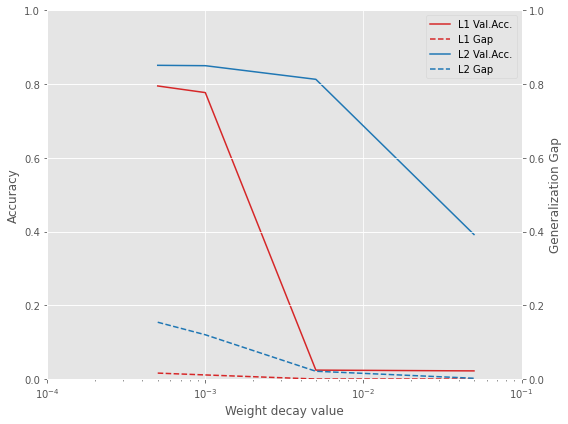

In [29]:
accuracyL1 =[0.795,0.777,0.0241,0.0220]
accuracyL2 =[0.851,0.850,0.813,0.392]
dropoutL1 = [5e-4,1e-3,5e-3,5e-2]
dropoutL2 = [5e-4,1e-3,5e-3,5e-2]

gap_L1_5e4 = 0.658-0.642
gap_L1_1e3 = 0.734-0.723
gap_L1_5e3 = 0
gap_L1_5e2 = 0

gapL1 = [gap_L1_5e4,gap_L1_1e3,gap_L1_5e3,gap_L1_5e2]

accuracyL1 = np.array(accuracyL1)
dropoutL1 = np.array(dropoutL1)

gap_L2_5e4 = 0.460-0.306
gap_L2_1e3 = 0.453-0.333
gap_L2_5e3 = 0.607-0.586
gap_L2_5e2 = 2.258-2.256

gapL2 = [gap_L2_5e4,gap_L2_1e3,gap_L2_5e3,gap_L2_5e2]

accuracyL2 = np.array(accuracyL2)
dropoutL2 = np.array(dropoutL2)


fig, ax1 = plt.subplots(figsize=(8,6))

plt.grid(color='w', linestyle='solid')

ln1 = ax1.plot(dropoutL1, accuracyL1, color = 'tab:red', label='L1 Val.Acc.')
ln3 = ax1.plot(dropoutL2, accuracyL2, color = 'tab:blue',label = 'L2 Val.Acc.')
plt.xlim((1e-4,1e-1))
plt.ylim((0,1))
ax1.set_xlabel('Weight decay value')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.set_ylabel('Generalization Gap')

ln2 = ax2.plot(dropoutL1, gapL1, color='tab:red',label='L1 Gap',linestyle = '--')
ln4 = ax2.plot(dropoutL2, gapL2, color = 'tab:blue', label = 'L2 Gap', linestyle = '--')
plt.xlim((1e-4,1e-1))
plt.ylim((0,1))

lns = ln1+ln2+ ln3+ ln4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.xscale('log')
fig.tight_layout()
# plt.xticks([1e-4,1e-3,1e-1])# otherwise the right y-label is slightly clipped
plt.show()
fig.savefig('weight penalty.png')

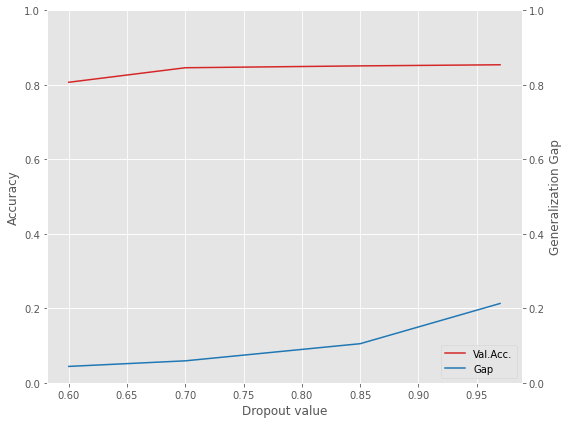

In [11]:
accuracyDropout =[0.807,0.846,0.851,0.854]
dropoutValue = [0.6,0.7,0.85,0.97]
gapDropout = [
    0.593-0.549,
    0.503-0.444,
    0.434-0.329,
    0.457-0.244
]

fig, ax1 = plt.subplots(figsize=(8,6))
plt.grid(color='w', linestyle='solid')
plt.ylim((0,1))
ln1 = ax1.plot(dropoutValue,accuracyDropout,label='Val.Acc.',color='tab:red')
ax1.set_xlabel('Dropout value')
ax1.set_ylabel('Accuracy')
ax2 = ax1.twinx()
ax2.set_ylabel('Generalization Gap')
ln2 = ax2.plot(dropoutValue,gapDropout,label="Gap",color='tab:blue')
plt.ylim((0,1))
lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=4)
fig.tight_layout()
plt.show()
fig.savefig('dropout accuracy graph.png')


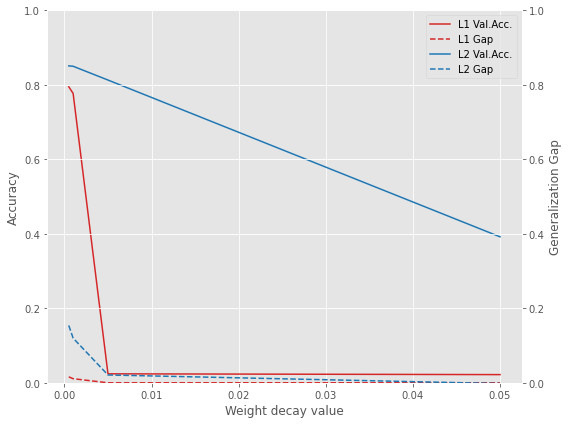

In [18]:
accuracyL1 =[0.795,0.777,0.0241,0.0220]
accuracyL2 =[0.851,0.850,0.813,0.392]
L1weight = [1*-4,1e-3,1e-2,1e-1]
L2weight = [5e-4,1e-3,5e-3,5e-2]
gapL1 = [
    0.658-0.642,
    0.734-0.723,
    0,
    0
]
gapL2 = [
    0.460-0.306,
    0.453-0.333,
    0.607-0.586,
    2.256-2.258
]
fig, ax1 = plt.subplots(figsize=(8,6))
plt.grid(color='w', linestyle='solid')
plt.ylim((0,1))
ln1 = ax1.plot(L2weight, accuracyL1, color = 'tab:red', label='L1 Val.Acc.')
ln3 = ax1.plot(L2weight, accuracyL2, color = 'tab:blue',label = 'L2 Val.Acc.')
ax1.set_xlabel('Weight decay value')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()
ax2.set_ylabel('Generalization Gap')

ln2 = ax2.plot(L2weight, gapL1, color='tab:red',label='L1 Gap',linestyle = '--')
ln4 = ax2.plot(L2weight, gapL2, color = 'tab:blue', label = 'L2 Gap', linestyle = '--')
plt.ylim((0,1))

lns = ln1+ln2+ ln3+ ln4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
fig.tight_layout()
plt.show()
fig.savefig('weight penalty.png')


In [118]:
dropoutL1 = [5e-4,1e-3,5e-3,5e-2]
print(dropoutL1)

[0.0005, 0.001, 0.005, 0.05]


[0.6  0.7  0.85 0.97]
[0.807 0.846 0.851 0.854]
[0.04399999999999993, 0.059, 0.10499999999999998, 0.21300000000000002]


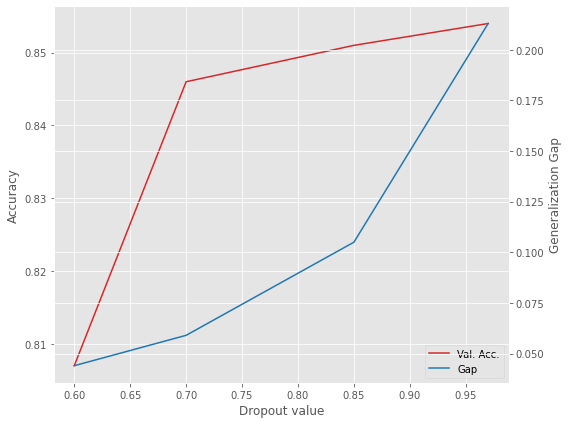

In [130]:
accuracy1 =[0.807,0.846,0.851,0.854]
dropout1 = [0.6,0.7,0.85,0.97]
gap1 = [0.593-0.549,0.503-0.444,0.434-0.329,0.457-0.244]

accuracy1 = np.array(accuracy1)
dropout1 = np.array(dropout1)
print(dropout1)
print(accuracy1)
print(gap1)


# ax_1 = fig_1.add_subplot(111)

fig, ax1 = plt.subplots(figsize=(8,6))
ln1 = ax1.plot(dropout1,accuracy1, label='Val. Acc.',color = 'tab:red')
ax1.set_xlabel('Dropout value')
ax1.set_ylabel('Accuracy')
ax2 = ax1.twinx()
ax2.set_ylabel('Generalization Gap')
ln2 = ax2.plot(dropout1, gap1, label='Gap',color = 'tab:blue')

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=4)
ax_1.legend(loc=0)
fig.tight_layout()
plt.show()
fig.savefig('dropout accuracy graph.png')

In [43]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty
import os
os.environ['MLP_DATA_DIR']='F:\MLP\mlpractical\data'
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# dropout_prob = 0.97
# L1_val = 5e-4
# L2_val = 0

# stat_check = train_model_Dropout_L1L2(dropout_prob,L1_val,L2_val)

# Dropout + L1
stats_dp85_L15e = train_model_Dropout_L1L2(0.85,5e-4,0)
stats_dp85_L11e = train_model_Dropout_L1L2(0.85,1e-3,0)

stats_dp90_L15e = train_model_Dropout_L1L2(0.90,5e-4,0)
stats_dp90_L11e = train_model_Dropout_L1L2(0.90,1e-3,0)

stats_dp95_L15e = train_model_Dropout_L1L2(0.95,5e-4,0)
stats_dp95_L11e = train_model_Dropout_L1L2(0.95,1e-3,0)

stats_dp97_L15e = train_model_Dropout_L1L2(0.97,5e-4,0)
stats_dp97_L11e = train_model_Dropout_L1L2(0.97,1e-3,0)


# Dropout + L2

stats_dp85_L25e = train_model_Dropout_L1L2(0.85,0,5e-4)
stats_dp85_L21e = train_model_Dropout_L1L2(0.85,0,1e-3)

stats_dp90_L25e = train_model_Dropout_L1L2(0.90,0,5e-4)
stats_dp90_L21e = train_model_Dropout_L1L2(0.90,0,1e-3)

stats_dp95_L25e = train_model_Dropout_L1L2(0.95,0,5e-4)
stats_dp95_L21e = train_model_Dropout_L1L2(0.95,0,1e-3)

stats_dp97_L25e = train_model_Dropout_L1L2(0.97,0,5e-4)
stats_dp97_L21e = train_model_Dropout_L1L2(0.97,0,1e-3)



KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D28F66C880>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D28F66FC70>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.3s to complete
    error(train)=2.01e+00, acc(train)=5.08e-01, error(valid)=2.02e+00, acc(valid)=5.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.1s to complete
    error(train)=1.67e+00, acc(train)=5.65e-01, error(valid)=1.67e+00, acc(valid)=5.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.5s to complete
    error(train)=1.53e+00, acc(train)=5.95e-01, error(valid)=1.54e+00, acc(valid)=5.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.6s to complete
    error(train)=1.44e+00, acc(train)=6.13e-01, error(valid)=1.45e+00, acc(valid)=6.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.4s to complete
    error(train)=1.37e+00, acc(train)=6.28e-01, error(valid)=1.38e+00, acc(valid)=6.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.3s to complete
    error(train)=1.31e+00, acc(train)=6.41e-01, error(valid)=1.32e+00, acc(valid)=6.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.1s to complete
    error(train)=1.27e+00, acc(train)=6.52e-01, error(valid)=1.28e+00, acc(valid)=6.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.0s to complete
    error(train)=1.23e+00, acc(train)=6.61e-01, error(valid)=1.24e+00, acc(valid)=6.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.7s to complete
    error(train)=1.19e+00, acc(train)=6.69e-01, error(valid)=1.20e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.1s to complete
    error(train)=1.17e+00, acc(train)=6.79e-01, error(valid)=1.17e+00, acc(valid)=6.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.0s to complete
    error(train)=1.15e+00, acc(train)=6.78e-01, error(valid)=1.16e+00, acc(valid)=6.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.1s to complete
    error(train)=1.11e+00, acc(train)=6.89e-01, error(valid)=1.12e+00, acc(valid)=6.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.0s to complete
    error(train)=1.10e+00, acc(train)=6.93e-01, error(valid)=1.10e+00, acc(valid)=6.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.1s to complete
    error(train)=1.08e+00, acc(train)=6.96e-01, error(valid)=1.08e+00, acc(valid)=6.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.0s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.07e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.0s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.0s to complete
    error(train)=1.03e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.0s to complete
    error(train)=1.01e+00, acc(train)=7.14e-01, error(valid)=1.02e+00, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.0s to complete
    error(train)=1.00e+00, acc(train)=7.14e-01, error(valid)=1.01e+00, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.1s to complete
    error(train)=9.98e-01, acc(train)=7.15e-01, error(valid)=1.00e+00, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.0s to complete
    error(train)=9.84e-01, acc(train)=7.19e-01, error(valid)=9.90e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.0s to complete
    error(train)=9.77e-01, acc(train)=7.17e-01, error(valid)=9.83e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.0s to complete
    error(train)=9.63e-01, acc(train)=7.23e-01, error(valid)=9.70e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.0s to complete
    error(train)=9.49e-01, acc(train)=7.27e-01, error(valid)=9.55e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.0s to complete
    error(train)=9.48e-01, acc(train)=7.27e-01, error(valid)=9.54e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.0s to complete
    error(train)=9.35e-01, acc(train)=7.31e-01, error(valid)=9.40e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.1s to complete
    error(train)=9.31e-01, acc(train)=7.31e-01, error(valid)=9.38e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.0s to complete
    error(train)=9.17e-01, acc(train)=7.34e-01, error(valid)=9.22e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.0s to complete
    error(train)=9.13e-01, acc(train)=7.36e-01, error(valid)=9.19e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.0s to complete
    error(train)=9.12e-01, acc(train)=7.36e-01, error(valid)=9.17e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.1s to complete
    error(train)=9.07e-01, acc(train)=7.38e-01, error(valid)=9.13e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.0s to complete
    error(train)=8.95e-01, acc(train)=7.41e-01, error(valid)=9.01e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.0s to complete
    error(train)=8.97e-01, acc(train)=7.42e-01, error(valid)=9.04e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.0s to complete
    error(train)=8.92e-01, acc(train)=7.42e-01, error(valid)=8.97e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.1s to complete
    error(train)=8.98e-01, acc(train)=7.40e-01, error(valid)=9.05e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.0s to complete
    error(train)=8.76e-01, acc(train)=7.45e-01, error(valid)=8.82e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.0s to complete
    error(train)=8.73e-01, acc(train)=7.46e-01, error(valid)=8.80e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.0s to complete
    error(train)=8.68e-01, acc(train)=7.48e-01, error(valid)=8.73e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.1s to complete
    error(train)=8.67e-01, acc(train)=7.46e-01, error(valid)=8.75e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.0s to complete
    error(train)=8.72e-01, acc(train)=7.47e-01, error(valid)=8.77e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.0s to complete
    error(train)=8.61e-01, acc(train)=7.49e-01, error(valid)=8.68e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.0s to complete
    error(train)=8.61e-01, acc(train)=7.49e-01, error(valid)=8.68e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.1s to complete
    error(train)=8.57e-01, acc(train)=7.50e-01, error(valid)=8.62e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.0s to complete
    error(train)=8.48e-01, acc(train)=7.54e-01, error(valid)=8.55e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.0s to complete
    error(train)=8.44e-01, acc(train)=7.52e-01, error(valid)=8.51e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.0s to complete
    error(train)=8.44e-01, acc(train)=7.54e-01, error(valid)=8.50e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.1s to complete
    error(train)=8.37e-01, acc(train)=7.54e-01, error(valid)=8.44e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.0s to complete
    error(train)=8.40e-01, acc(train)=7.54e-01, error(valid)=8.47e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.0s to complete
    error(train)=8.35e-01, acc(train)=7.57e-01, error(valid)=8.41e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.0s to complete
    error(train)=8.36e-01, acc(train)=7.54e-01, error(valid)=8.43e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.1s to complete
    error(train)=8.25e-01, acc(train)=7.58e-01, error(valid)=8.32e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.0s to complete
    error(train)=8.24e-01, acc(train)=7.59e-01, error(valid)=8.30e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.0s to complete
    error(train)=8.25e-01, acc(train)=7.58e-01, error(valid)=8.32e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.0s to complete
    error(train)=8.23e-01, acc(train)=7.58e-01, error(valid)=8.29e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.1s to complete
    error(train)=8.19e-01, acc(train)=7.62e-01, error(valid)=8.26e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.0s to complete
    error(train)=8.18e-01, acc(train)=7.59e-01, error(valid)=8.24e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.0s to complete
    error(train)=8.13e-01, acc(train)=7.61e-01, error(valid)=8.20e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.0s to complete
    error(train)=8.15e-01, acc(train)=7.60e-01, error(valid)=8.20e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.1s to complete
    error(train)=8.07e-01, acc(train)=7.62e-01, error(valid)=8.15e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.0s to complete
    error(train)=8.09e-01, acc(train)=7.61e-01, error(valid)=8.16e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.0s to complete
    error(train)=8.08e-01, acc(train)=7.62e-01, error(valid)=8.16e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.0s to complete
    error(train)=8.09e-01, acc(train)=7.61e-01, error(valid)=8.17e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.1s to complete
    error(train)=8.05e-01, acc(train)=7.62e-01, error(valid)=8.12e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.0s to complete
    error(train)=8.02e-01, acc(train)=7.64e-01, error(valid)=8.08e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.0s to complete
    error(train)=7.97e-01, acc(train)=7.66e-01, error(valid)=8.05e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.0s to complete
    error(train)=7.97e-01, acc(train)=7.65e-01, error(valid)=8.04e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.1s to complete
    error(train)=7.94e-01, acc(train)=7.66e-01, error(valid)=8.00e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.0s to complete
    error(train)=7.96e-01, acc(train)=7.66e-01, error(valid)=8.03e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.1s to complete
    error(train)=7.87e-01, acc(train)=7.67e-01, error(valid)=7.94e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.1s to complete
    error(train)=7.84e-01, acc(train)=7.69e-01, error(valid)=7.91e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.1s to complete
    error(train)=7.88e-01, acc(train)=7.69e-01, error(valid)=7.95e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.0s to complete
    error(train)=7.81e-01, acc(train)=7.69e-01, error(valid)=7.88e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.0s to complete
    error(train)=7.81e-01, acc(train)=7.68e-01, error(valid)=7.90e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.0s to complete
    error(train)=7.83e-01, acc(train)=7.68e-01, error(valid)=7.91e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.0s to complete
    error(train)=7.77e-01, acc(train)=7.71e-01, error(valid)=7.84e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.3s to complete
    error(train)=7.75e-01, acc(train)=7.71e-01, error(valid)=7.83e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.0s to complete
    error(train)=7.76e-01, acc(train)=7.70e-01, error(valid)=7.84e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.0s to complete
    error(train)=7.72e-01, acc(train)=7.72e-01, error(valid)=7.80e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.0s to complete
    error(train)=7.70e-01, acc(train)=7.73e-01, error(valid)=7.78e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.0s to complete
    error(train)=7.70e-01, acc(train)=7.72e-01, error(valid)=7.78e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.1s to complete
    error(train)=7.67e-01, acc(train)=7.72e-01, error(valid)=7.74e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.0s to complete
    error(train)=7.71e-01, acc(train)=7.70e-01, error(valid)=7.80e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.1s to complete
    error(train)=7.67e-01, acc(train)=7.72e-01, error(valid)=7.75e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.0s to complete
    error(train)=7.65e-01, acc(train)=7.72e-01, error(valid)=7.73e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.0s to complete
    error(train)=7.68e-01, acc(train)=7.72e-01, error(valid)=7.77e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.0s to complete
    error(train)=7.66e-01, acc(train)=7.75e-01, error(valid)=7.74e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.1s to complete
    error(train)=7.63e-01, acc(train)=7.73e-01, error(valid)=7.72e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.1s to complete
    error(train)=7.68e-01, acc(train)=7.71e-01, error(valid)=7.77e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.1s to complete
    error(train)=7.60e-01, acc(train)=7.74e-01, error(valid)=7.69e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.0s to complete
    error(train)=7.55e-01, acc(train)=7.76e-01, error(valid)=7.63e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.0s to complete
    error(train)=7.59e-01, acc(train)=7.74e-01, error(valid)=7.67e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.2s to complete
    error(train)=7.57e-01, acc(train)=7.76e-01, error(valid)=7.66e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.0s to complete
    error(train)=7.52e-01, acc(train)=7.75e-01, error(valid)=7.61e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.0s to complete
    error(train)=7.53e-01, acc(train)=7.76e-01, error(valid)=7.62e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.0s to complete
    error(train)=7.47e-01, acc(train)=7.77e-01, error(valid)=7.55e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.1s to complete
    error(train)=7.51e-01, acc(train)=7.76e-01, error(valid)=7.60e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.1s to complete
    error(train)=7.51e-01, acc(train)=7.76e-01, error(valid)=7.60e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.1s to complete
    error(train)=7.51e-01, acc(train)=7.78e-01, error(valid)=7.60e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.0s to complete
    error(train)=7.53e-01, acc(train)=7.77e-01, error(valid)=7.63e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.1s to complete
    error(train)=7.52e-01, acc(train)=7.77e-01, error(valid)=7.62e-01, acc(valid)=7.75e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D28F66DD20>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D28F66DD20>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.5s to complete
    error(train)=2.53e+00, acc(train)=3.96e-01, error(valid)=2.53e+00, acc(valid)=3.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.1s to complete
    error(train)=2.17e+00, acc(train)=4.63e-01, error(valid)=2.18e+00, acc(valid)=4.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.1s to complete
    error(train)=2.00e+00, acc(train)=4.98e-01, error(valid)=2.01e+00, acc(valid)=4.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.1s to complete
    error(train)=1.89e+00, acc(train)=5.19e-01, error(valid)=1.90e+00, acc(valid)=5.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.0s to complete
    error(train)=1.82e+00, acc(train)=5.31e-01, error(valid)=1.82e+00, acc(valid)=5.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.1s to complete
    error(train)=1.77e+00, acc(train)=5.43e-01, error(valid)=1.77e+00, acc(valid)=5.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.1s to complete
    error(train)=1.73e+00, acc(train)=5.49e-01, error(valid)=1.74e+00, acc(valid)=5.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.1s to complete
    error(train)=1.69e+00, acc(train)=5.59e-01, error(valid)=1.70e+00, acc(valid)=5.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.0s to complete
    error(train)=1.67e+00, acc(train)=5.65e-01, error(valid)=1.67e+00, acc(valid)=5.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.1s to complete
    error(train)=1.64e+00, acc(train)=5.70e-01, error(valid)=1.65e+00, acc(valid)=5.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.0s to complete
    error(train)=1.63e+00, acc(train)=5.69e-01, error(valid)=1.64e+00, acc(valid)=5.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.1s to complete
    error(train)=1.59e+00, acc(train)=5.78e-01, error(valid)=1.60e+00, acc(valid)=5.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.1s to complete
    error(train)=1.58e+00, acc(train)=5.82e-01, error(valid)=1.59e+00, acc(valid)=5.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.1s to complete
    error(train)=1.56e+00, acc(train)=5.88e-01, error(valid)=1.57e+00, acc(valid)=5.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.1s to complete
    error(train)=1.54e+00, acc(train)=5.90e-01, error(valid)=1.55e+00, acc(valid)=5.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.1s to complete
    error(train)=1.53e+00, acc(train)=5.91e-01, error(valid)=1.54e+00, acc(valid)=5.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.1s to complete
    error(train)=1.51e+00, acc(train)=5.96e-01, error(valid)=1.51e+00, acc(valid)=5.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.1s to complete
    error(train)=1.49e+00, acc(train)=6.02e-01, error(valid)=1.50e+00, acc(valid)=5.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.1s to complete
    error(train)=1.48e+00, acc(train)=6.05e-01, error(valid)=1.49e+00, acc(valid)=5.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.1s to complete
    error(train)=1.47e+00, acc(train)=6.06e-01, error(valid)=1.48e+00, acc(valid)=6.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.1s to complete
    error(train)=1.46e+00, acc(train)=6.08e-01, error(valid)=1.47e+00, acc(valid)=6.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.1s to complete
    error(train)=1.44e+00, acc(train)=6.11e-01, error(valid)=1.45e+00, acc(valid)=6.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.2s to complete
    error(train)=1.43e+00, acc(train)=6.16e-01, error(valid)=1.44e+00, acc(valid)=6.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.1s to complete
    error(train)=1.41e+00, acc(train)=6.19e-01, error(valid)=1.42e+00, acc(valid)=6.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.1s to complete
    error(train)=1.41e+00, acc(train)=6.20e-01, error(valid)=1.42e+00, acc(valid)=6.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.2s to complete
    error(train)=1.39e+00, acc(train)=6.25e-01, error(valid)=1.40e+00, acc(valid)=6.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.3s to complete
    error(train)=1.39e+00, acc(train)=6.25e-01, error(valid)=1.40e+00, acc(valid)=6.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.1s to complete
    error(train)=1.37e+00, acc(train)=6.29e-01, error(valid)=1.38e+00, acc(valid)=6.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.1s to complete
    error(train)=1.36e+00, acc(train)=6.32e-01, error(valid)=1.37e+00, acc(valid)=6.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.1s to complete
    error(train)=1.36e+00, acc(train)=6.29e-01, error(valid)=1.37e+00, acc(valid)=6.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.1s to complete
    error(train)=1.35e+00, acc(train)=6.35e-01, error(valid)=1.35e+00, acc(valid)=6.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.1s to complete
    error(train)=1.33e+00, acc(train)=6.39e-01, error(valid)=1.34e+00, acc(valid)=6.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.3s to complete
    error(train)=1.33e+00, acc(train)=6.41e-01, error(valid)=1.34e+00, acc(valid)=6.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.3s to complete
    error(train)=1.32e+00, acc(train)=6.43e-01, error(valid)=1.33e+00, acc(valid)=6.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.4s to complete
    error(train)=1.33e+00, acc(train)=6.41e-01, error(valid)=1.34e+00, acc(valid)=6.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.3s to complete
    error(train)=1.30e+00, acc(train)=6.47e-01, error(valid)=1.32e+00, acc(valid)=6.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.2s to complete
    error(train)=1.29e+00, acc(train)=6.47e-01, error(valid)=1.30e+00, acc(valid)=6.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.1s to complete
    error(train)=1.29e+00, acc(train)=6.50e-01, error(valid)=1.30e+00, acc(valid)=6.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.3s to complete
    error(train)=1.28e+00, acc(train)=6.51e-01, error(valid)=1.29e+00, acc(valid)=6.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.2s to complete
    error(train)=1.28e+00, acc(train)=6.52e-01, error(valid)=1.29e+00, acc(valid)=6.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.2s to complete
    error(train)=1.27e+00, acc(train)=6.53e-01, error(valid)=1.28e+00, acc(valid)=6.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.1s to complete
    error(train)=1.26e+00, acc(train)=6.57e-01, error(valid)=1.27e+00, acc(valid)=6.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.1s to complete
    error(train)=1.26e+00, acc(train)=6.57e-01, error(valid)=1.27e+00, acc(valid)=6.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.1s to complete
    error(train)=1.25e+00, acc(train)=6.58e-01, error(valid)=1.26e+00, acc(valid)=6.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.1s to complete
    error(train)=1.25e+00, acc(train)=6.59e-01, error(valid)=1.26e+00, acc(valid)=6.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.1s to complete
    error(train)=1.24e+00, acc(train)=6.63e-01, error(valid)=1.25e+00, acc(valid)=6.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.2s to complete
    error(train)=1.24e+00, acc(train)=6.62e-01, error(valid)=1.25e+00, acc(valid)=6.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.1s to complete
    error(train)=1.23e+00, acc(train)=6.65e-01, error(valid)=1.24e+00, acc(valid)=6.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.1s to complete
    error(train)=1.23e+00, acc(train)=6.67e-01, error(valid)=1.24e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.1s to complete
    error(train)=1.22e+00, acc(train)=6.66e-01, error(valid)=1.23e+00, acc(valid)=6.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.1s to complete
    error(train)=1.21e+00, acc(train)=6.69e-01, error(valid)=1.22e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.1s to complete
    error(train)=1.21e+00, acc(train)=6.70e-01, error(valid)=1.22e+00, acc(valid)=6.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.1s to complete
    error(train)=1.21e+00, acc(train)=6.69e-01, error(valid)=1.22e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.1s to complete
    error(train)=1.20e+00, acc(train)=6.68e-01, error(valid)=1.21e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.1s to complete
    error(train)=1.20e+00, acc(train)=6.73e-01, error(valid)=1.21e+00, acc(valid)=6.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.1s to complete
    error(train)=1.19e+00, acc(train)=6.74e-01, error(valid)=1.20e+00, acc(valid)=6.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.1s to complete
    error(train)=1.19e+00, acc(train)=6.76e-01, error(valid)=1.19e+00, acc(valid)=6.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.1s to complete
    error(train)=1.18e+00, acc(train)=6.75e-01, error(valid)=1.19e+00, acc(valid)=6.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.1s to complete
    error(train)=1.17e+00, acc(train)=6.78e-01, error(valid)=1.18e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.1s to complete
    error(train)=1.17e+00, acc(train)=6.77e-01, error(valid)=1.18e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.7s to complete
    error(train)=1.17e+00, acc(train)=6.78e-01, error(valid)=1.18e+00, acc(valid)=6.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.6s to complete
    error(train)=1.17e+00, acc(train)=6.80e-01, error(valid)=1.18e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.7s to complete
    error(train)=1.16e+00, acc(train)=6.80e-01, error(valid)=1.17e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.6s to complete
    error(train)=1.17e+00, acc(train)=6.79e-01, error(valid)=1.18e+00, acc(valid)=6.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.6s to complete
    error(train)=1.16e+00, acc(train)=6.83e-01, error(valid)=1.17e+00, acc(valid)=6.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.6s to complete
    error(train)=1.16e+00, acc(train)=6.82e-01, error(valid)=1.16e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.6s to complete
    error(train)=1.15e+00, acc(train)=6.82e-01, error(valid)=1.16e+00, acc(valid)=6.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.6s to complete
    error(train)=1.15e+00, acc(train)=6.83e-01, error(valid)=1.16e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.6s to complete
    error(train)=1.14e+00, acc(train)=6.87e-01, error(valid)=1.15e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.7s to complete
    error(train)=1.14e+00, acc(train)=6.87e-01, error(valid)=1.14e+00, acc(valid)=6.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.6s to complete
    error(train)=1.14e+00, acc(train)=6.89e-01, error(valid)=1.15e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.6s to complete
    error(train)=1.13e+00, acc(train)=6.87e-01, error(valid)=1.14e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.6s to complete
    error(train)=1.13e+00, acc(train)=6.86e-01, error(valid)=1.14e+00, acc(valid)=6.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.6s to complete
    error(train)=1.13e+00, acc(train)=6.88e-01, error(valid)=1.14e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.6s to complete
    error(train)=1.13e+00, acc(train)=6.87e-01, error(valid)=1.14e+00, acc(valid)=6.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.6s to complete
    error(train)=1.12e+00, acc(train)=6.89e-01, error(valid)=1.13e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.7s to complete
    error(train)=1.12e+00, acc(train)=6.91e-01, error(valid)=1.13e+00, acc(valid)=6.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.6s to complete
    error(train)=1.12e+00, acc(train)=6.92e-01, error(valid)=1.13e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.9s to complete
    error(train)=1.12e+00, acc(train)=6.92e-01, error(valid)=1.12e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.5s to complete
    error(train)=1.12e+00, acc(train)=6.91e-01, error(valid)=1.12e+00, acc(valid)=6.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.3s to complete
    error(train)=1.11e+00, acc(train)=6.94e-01, error(valid)=1.12e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.4s to complete
    error(train)=1.11e+00, acc(train)=6.93e-01, error(valid)=1.11e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.4s to complete
    error(train)=1.11e+00, acc(train)=6.95e-01, error(valid)=1.11e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.7s to complete
    error(train)=1.11e+00, acc(train)=6.92e-01, error(valid)=1.11e+00, acc(valid)=6.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.6s to complete
    error(train)=1.11e+00, acc(train)=6.96e-01, error(valid)=1.11e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.6s to complete
    error(train)=1.10e+00, acc(train)=6.98e-01, error(valid)=1.11e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.6s to complete
    error(train)=1.10e+00, acc(train)=6.97e-01, error(valid)=1.10e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.6s to complete
    error(train)=1.10e+00, acc(train)=6.95e-01, error(valid)=1.10e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.6s to complete
    error(train)=1.09e+00, acc(train)=6.98e-01, error(valid)=1.10e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.1s to complete
    error(train)=1.09e+00, acc(train)=7.00e-01, error(valid)=1.10e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.1s to complete
    error(train)=1.09e+00, acc(train)=7.00e-01, error(valid)=1.10e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.1s to complete
    error(train)=1.09e+00, acc(train)=6.98e-01, error(valid)=1.10e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.1s to complete
    error(train)=1.09e+00, acc(train)=6.98e-01, error(valid)=1.10e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.1s to complete
    error(train)=1.08e+00, acc(train)=7.01e-01, error(valid)=1.09e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.1s to complete
    error(train)=1.08e+00, acc(train)=7.02e-01, error(valid)=1.09e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.1s to complete
    error(train)=1.08e+00, acc(train)=7.03e-01, error(valid)=1.09e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.1s to complete
    error(train)=1.08e+00, acc(train)=7.03e-01, error(valid)=1.09e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.1s to complete
    error(train)=1.08e+00, acc(train)=7.03e-01, error(valid)=1.08e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.1s to complete
    error(train)=1.07e+00, acc(train)=7.05e-01, error(valid)=1.08e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.1s to complete
    error(train)=1.08e+00, acc(train)=7.04e-01, error(valid)=1.09e+00, acc(valid)=7.02e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2936BBEE0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2936BB3A0>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.5s to complete
    error(train)=1.80e+00, acc(train)=5.43e-01, error(valid)=1.81e+00, acc(valid)=5.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.4s to complete
    error(train)=1.53e+00, acc(train)=5.94e-01, error(valid)=1.53e+00, acc(valid)=5.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.4s to complete
    error(train)=1.41e+00, acc(train)=6.20e-01, error(valid)=1.42e+00, acc(valid)=6.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.1s to complete
    error(train)=1.33e+00, acc(train)=6.37e-01, error(valid)=1.34e+00, acc(valid)=6.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.0s to complete
    error(train)=1.27e+00, acc(train)=6.52e-01, error(valid)=1.28e+00, acc(valid)=6.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.1s to complete
    error(train)=1.22e+00, acc(train)=6.63e-01, error(valid)=1.22e+00, acc(valid)=6.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.1s to complete
    error(train)=1.17e+00, acc(train)=6.74e-01, error(valid)=1.18e+00, acc(valid)=6.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.0s to complete
    error(train)=1.14e+00, acc(train)=6.81e-01, error(valid)=1.15e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.0s to complete
    error(train)=1.11e+00, acc(train)=6.87e-01, error(valid)=1.12e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.0s to complete
    error(train)=1.08e+00, acc(train)=6.99e-01, error(valid)=1.08e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.1s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.0s to complete
    error(train)=1.03e+00, acc(train)=7.07e-01, error(valid)=1.04e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.0s to complete
    error(train)=1.02e+00, acc(train)=7.12e-01, error(valid)=1.02e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.0s to complete
    error(train)=1.00e+00, acc(train)=7.15e-01, error(valid)=1.01e+00, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.1s to complete
    error(train)=9.77e-01, acc(train)=7.21e-01, error(valid)=9.83e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.0s to complete
    error(train)=9.80e-01, acc(train)=7.19e-01, error(valid)=9.85e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.0s to complete
    error(train)=9.60e-01, acc(train)=7.23e-01, error(valid)=9.66e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.0s to complete
    error(train)=9.38e-01, acc(train)=7.31e-01, error(valid)=9.45e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.1s to complete
    error(train)=9.30e-01, acc(train)=7.33e-01, error(valid)=9.36e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.0s to complete
    error(train)=9.21e-01, acc(train)=7.34e-01, error(valid)=9.27e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.0s to complete
    error(train)=9.11e-01, acc(train)=7.38e-01, error(valid)=9.18e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.0s to complete
    error(train)=9.07e-01, acc(train)=7.36e-01, error(valid)=9.14e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.1s to complete
    error(train)=8.95e-01, acc(train)=7.40e-01, error(valid)=9.01e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.0s to complete
    error(train)=8.79e-01, acc(train)=7.46e-01, error(valid)=8.85e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.0s to complete
    error(train)=8.72e-01, acc(train)=7.46e-01, error(valid)=8.77e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.0s to complete
    error(train)=8.71e-01, acc(train)=7.46e-01, error(valid)=8.76e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.1s to complete
    error(train)=8.63e-01, acc(train)=7.48e-01, error(valid)=8.69e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.0s to complete
    error(train)=8.54e-01, acc(train)=7.51e-01, error(valid)=8.58e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.0s to complete
    error(train)=8.44e-01, acc(train)=7.53e-01, error(valid)=8.49e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.0s to complete
    error(train)=8.41e-01, acc(train)=7.54e-01, error(valid)=8.46e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.1s to complete
    error(train)=8.35e-01, acc(train)=7.56e-01, error(valid)=8.40e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.1s to complete
    error(train)=8.29e-01, acc(train)=7.58e-01, error(valid)=8.35e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.0s to complete
    error(train)=8.25e-01, acc(train)=7.59e-01, error(valid)=8.31e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.1s to complete
    error(train)=8.26e-01, acc(train)=7.58e-01, error(valid)=8.30e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.1s to complete
    error(train)=8.30e-01, acc(train)=7.58e-01, error(valid)=8.36e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.1s to complete
    error(train)=8.10e-01, acc(train)=7.61e-01, error(valid)=8.16e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.1s to complete
    error(train)=8.08e-01, acc(train)=7.63e-01, error(valid)=8.13e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.0s to complete
    error(train)=8.01e-01, acc(train)=7.65e-01, error(valid)=8.06e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.1s to complete
    error(train)=8.01e-01, acc(train)=7.64e-01, error(valid)=8.08e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.1s to complete
    error(train)=8.01e-01, acc(train)=7.65e-01, error(valid)=8.05e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.1s to complete
    error(train)=7.97e-01, acc(train)=7.65e-01, error(valid)=8.03e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.1s to complete
    error(train)=7.93e-01, acc(train)=7.68e-01, error(valid)=7.98e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.1s to complete
    error(train)=7.88e-01, acc(train)=7.67e-01, error(valid)=7.93e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.1s to complete
    error(train)=7.85e-01, acc(train)=7.69e-01, error(valid)=7.90e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.1s to complete
    error(train)=7.81e-01, acc(train)=7.68e-01, error(valid)=7.88e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.1s to complete
    error(train)=7.81e-01, acc(train)=7.70e-01, error(valid)=7.86e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.1s to complete
    error(train)=7.77e-01, acc(train)=7.70e-01, error(valid)=7.83e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.1s to complete
    error(train)=7.77e-01, acc(train)=7.69e-01, error(valid)=7.84e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.1s to complete
    error(train)=7.71e-01, acc(train)=7.72e-01, error(valid)=7.76e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.1s to complete
    error(train)=7.72e-01, acc(train)=7.71e-01, error(valid)=7.77e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.1s to complete
    error(train)=7.64e-01, acc(train)=7.72e-01, error(valid)=7.70e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.1s to complete
    error(train)=7.64e-01, acc(train)=7.74e-01, error(valid)=7.70e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.1s to complete
    error(train)=7.65e-01, acc(train)=7.73e-01, error(valid)=7.70e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.1s to complete
    error(train)=7.61e-01, acc(train)=7.73e-01, error(valid)=7.66e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.1s to complete
    error(train)=7.57e-01, acc(train)=7.77e-01, error(valid)=7.61e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.1s to complete
    error(train)=7.56e-01, acc(train)=7.75e-01, error(valid)=7.60e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.1s to complete
    error(train)=7.52e-01, acc(train)=7.76e-01, error(valid)=7.58e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.1s to complete
    error(train)=7.53e-01, acc(train)=7.76e-01, error(valid)=7.57e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.1s to complete
    error(train)=7.48e-01, acc(train)=7.77e-01, error(valid)=7.53e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.1s to complete
    error(train)=7.48e-01, acc(train)=7.77e-01, error(valid)=7.53e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.1s to complete
    error(train)=7.52e-01, acc(train)=7.75e-01, error(valid)=7.58e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.1s to complete
    error(train)=7.46e-01, acc(train)=7.77e-01, error(valid)=7.52e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.1s to complete
    error(train)=7.48e-01, acc(train)=7.77e-01, error(valid)=7.54e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.1s to complete
    error(train)=7.45e-01, acc(train)=7.79e-01, error(valid)=7.50e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.1s to complete
    error(train)=7.37e-01, acc(train)=7.81e-01, error(valid)=7.44e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.1s to complete
    error(train)=7.41e-01, acc(train)=7.79e-01, error(valid)=7.47e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.1s to complete
    error(train)=7.37e-01, acc(train)=7.80e-01, error(valid)=7.42e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.1s to complete
    error(train)=7.33e-01, acc(train)=7.82e-01, error(valid)=7.38e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.1s to complete
    error(train)=7.34e-01, acc(train)=7.80e-01, error(valid)=7.40e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.1s to complete
    error(train)=7.29e-01, acc(train)=7.82e-01, error(valid)=7.35e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.1s to complete
    error(train)=7.30e-01, acc(train)=7.82e-01, error(valid)=7.36e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.1s to complete
    error(train)=7.25e-01, acc(train)=7.82e-01, error(valid)=7.31e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.1s to complete
    error(train)=7.32e-01, acc(train)=7.79e-01, error(valid)=7.40e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.1s to complete
    error(train)=7.26e-01, acc(train)=7.82e-01, error(valid)=7.32e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.1s to complete
    error(train)=7.25e-01, acc(train)=7.83e-01, error(valid)=7.30e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.1s to complete
    error(train)=7.20e-01, acc(train)=7.85e-01, error(valid)=7.26e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.1s to complete
    error(train)=7.20e-01, acc(train)=7.83e-01, error(valid)=7.28e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.1s to complete
    error(train)=7.17e-01, acc(train)=7.85e-01, error(valid)=7.23e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.1s to complete
    error(train)=7.17e-01, acc(train)=7.85e-01, error(valid)=7.24e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.1s to complete
    error(train)=7.12e-01, acc(train)=7.86e-01, error(valid)=7.18e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.1s to complete
    error(train)=7.17e-01, acc(train)=7.84e-01, error(valid)=7.23e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.1s to complete
    error(train)=7.15e-01, acc(train)=7.83e-01, error(valid)=7.23e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.1s to complete
    error(train)=7.13e-01, acc(train)=7.85e-01, error(valid)=7.19e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.2s to complete
    error(train)=7.09e-01, acc(train)=7.86e-01, error(valid)=7.15e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.1s to complete
    error(train)=7.12e-01, acc(train)=7.86e-01, error(valid)=7.18e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.1s to complete
    error(train)=7.13e-01, acc(train)=7.86e-01, error(valid)=7.19e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.1s to complete
    error(train)=7.04e-01, acc(train)=7.87e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.1s to complete
    error(train)=7.10e-01, acc(train)=7.86e-01, error(valid)=7.18e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.1s to complete
    error(train)=7.04e-01, acc(train)=7.88e-01, error(valid)=7.11e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.1s to complete
    error(train)=6.99e-01, acc(train)=7.89e-01, error(valid)=7.07e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.1s to complete
    error(train)=7.04e-01, acc(train)=7.87e-01, error(valid)=7.10e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.1s to complete
    error(train)=7.00e-01, acc(train)=7.89e-01, error(valid)=7.06e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.1s to complete
    error(train)=7.00e-01, acc(train)=7.88e-01, error(valid)=7.06e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.1s to complete
    error(train)=7.02e-01, acc(train)=7.88e-01, error(valid)=7.09e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.1s to complete
    error(train)=6.96e-01, acc(train)=7.90e-01, error(valid)=7.03e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.2s to complete
    error(train)=6.96e-01, acc(train)=7.89e-01, error(valid)=7.04e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.1s to complete
    error(train)=6.94e-01, acc(train)=7.90e-01, error(valid)=7.01e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.1s to complete
    error(train)=6.94e-01, acc(train)=7.91e-01, error(valid)=7.01e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.1s to complete
    error(train)=6.93e-01, acc(train)=7.91e-01, error(valid)=7.01e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.1s to complete
    error(train)=6.94e-01, acc(train)=7.91e-01, error(valid)=7.01e-01, acc(valid)=7.90e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D28F66EEC0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D28F66D0F0>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.1s to complete
    error(train)=2.20e+00, acc(train)=4.76e-01, error(valid)=2.20e+00, acc(valid)=4.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.1s to complete
    error(train)=1.87e+00, acc(train)=5.27e-01, error(valid)=1.88e+00, acc(valid)=5.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.1s to complete
    error(train)=1.76e+00, acc(train)=5.50e-01, error(valid)=1.77e+00, acc(valid)=5.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.1s to complete
    error(train)=1.69e+00, acc(train)=5.62e-01, error(valid)=1.69e+00, acc(valid)=5.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.1s to complete
    error(train)=1.63e+00, acc(train)=5.73e-01, error(valid)=1.64e+00, acc(valid)=5.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.1s to complete
    error(train)=1.59e+00, acc(train)=5.82e-01, error(valid)=1.60e+00, acc(valid)=5.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.1s to complete
    error(train)=1.55e+00, acc(train)=5.92e-01, error(valid)=1.55e+00, acc(valid)=5.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.2s to complete
    error(train)=1.52e+00, acc(train)=5.96e-01, error(valid)=1.53e+00, acc(valid)=5.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.1s to complete
    error(train)=1.49e+00, acc(train)=6.02e-01, error(valid)=1.50e+00, acc(valid)=5.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.1s to complete
    error(train)=1.46e+00, acc(train)=6.10e-01, error(valid)=1.47e+00, acc(valid)=6.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.1s to complete
    error(train)=1.45e+00, acc(train)=6.11e-01, error(valid)=1.46e+00, acc(valid)=6.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.1s to complete
    error(train)=1.42e+00, acc(train)=6.18e-01, error(valid)=1.43e+00, acc(valid)=6.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.1s to complete
    error(train)=1.40e+00, acc(train)=6.24e-01, error(valid)=1.41e+00, acc(valid)=6.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.1s to complete
    error(train)=1.38e+00, acc(train)=6.28e-01, error(valid)=1.39e+00, acc(valid)=6.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.1s to complete
    error(train)=1.36e+00, acc(train)=6.33e-01, error(valid)=1.37e+00, acc(valid)=6.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.1s to complete
    error(train)=1.36e+00, acc(train)=6.30e-01, error(valid)=1.37e+00, acc(valid)=6.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.1s to complete
    error(train)=1.33e+00, acc(train)=6.38e-01, error(valid)=1.34e+00, acc(valid)=6.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.1s to complete
    error(train)=1.32e+00, acc(train)=6.40e-01, error(valid)=1.33e+00, acc(valid)=6.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.1s to complete
    error(train)=1.31e+00, acc(train)=6.44e-01, error(valid)=1.31e+00, acc(valid)=6.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.1s to complete
    error(train)=1.30e+00, acc(train)=6.44e-01, error(valid)=1.31e+00, acc(valid)=6.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.1s to complete
    error(train)=1.29e+00, acc(train)=6.49e-01, error(valid)=1.29e+00, acc(valid)=6.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.1s to complete
    error(train)=1.28e+00, acc(train)=6.47e-01, error(valid)=1.29e+00, acc(valid)=6.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.1s to complete
    error(train)=1.27e+00, acc(train)=6.52e-01, error(valid)=1.28e+00, acc(valid)=6.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.1s to complete
    error(train)=1.26e+00, acc(train)=6.55e-01, error(valid)=1.26e+00, acc(valid)=6.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.1s to complete
    error(train)=1.25e+00, acc(train)=6.55e-01, error(valid)=1.25e+00, acc(valid)=6.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.1s to complete
    error(train)=1.24e+00, acc(train)=6.57e-01, error(valid)=1.25e+00, acc(valid)=6.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.1s to complete
    error(train)=1.24e+00, acc(train)=6.60e-01, error(valid)=1.24e+00, acc(valid)=6.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.1s to complete
    error(train)=1.23e+00, acc(train)=6.61e-01, error(valid)=1.23e+00, acc(valid)=6.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.3s to complete
    error(train)=1.22e+00, acc(train)=6.63e-01, error(valid)=1.22e+00, acc(valid)=6.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.3s to complete
    error(train)=1.22e+00, acc(train)=6.61e-01, error(valid)=1.23e+00, acc(valid)=6.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.3s to complete
    error(train)=1.21e+00, acc(train)=6.66e-01, error(valid)=1.21e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.3s to complete
    error(train)=1.20e+00, acc(train)=6.68e-01, error(valid)=1.21e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.3s to complete
    error(train)=1.19e+00, acc(train)=6.70e-01, error(valid)=1.20e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.3s to complete
    error(train)=1.19e+00, acc(train)=6.70e-01, error(valid)=1.20e+00, acc(valid)=6.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.4s to complete
    error(train)=1.19e+00, acc(train)=6.68e-01, error(valid)=1.20e+00, acc(valid)=6.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.3s to complete
    error(train)=1.17e+00, acc(train)=6.73e-01, error(valid)=1.18e+00, acc(valid)=6.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.3s to complete
    error(train)=1.17e+00, acc(train)=6.73e-01, error(valid)=1.18e+00, acc(valid)=6.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.3s to complete
    error(train)=1.16e+00, acc(train)=6.76e-01, error(valid)=1.17e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.3s to complete
    error(train)=1.16e+00, acc(train)=6.77e-01, error(valid)=1.17e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.3s to complete
    error(train)=1.15e+00, acc(train)=6.79e-01, error(valid)=1.16e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.3s to complete
    error(train)=1.15e+00, acc(train)=6.77e-01, error(valid)=1.16e+00, acc(valid)=6.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.3s to complete
    error(train)=1.15e+00, acc(train)=6.79e-01, error(valid)=1.15e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.3s to complete
    error(train)=1.14e+00, acc(train)=6.80e-01, error(valid)=1.15e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.3s to complete
    error(train)=1.14e+00, acc(train)=6.81e-01, error(valid)=1.15e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.3s to complete
    error(train)=1.14e+00, acc(train)=6.81e-01, error(valid)=1.14e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.3s to complete
    error(train)=1.13e+00, acc(train)=6.83e-01, error(valid)=1.14e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.3s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.3s to complete
    error(train)=1.12e+00, acc(train)=6.86e-01, error(valid)=1.13e+00, acc(valid)=6.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.3s to complete
    error(train)=1.12e+00, acc(train)=6.87e-01, error(valid)=1.13e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.3s to complete
    error(train)=1.12e+00, acc(train)=6.87e-01, error(valid)=1.13e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.3s to complete
    error(train)=1.11e+00, acc(train)=6.87e-01, error(valid)=1.12e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.3s to complete
    error(train)=1.11e+00, acc(train)=6.90e-01, error(valid)=1.11e+00, acc(valid)=6.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.3s to complete
    error(train)=1.10e+00, acc(train)=6.90e-01, error(valid)=1.11e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.4s to complete
    error(train)=1.11e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.4s to complete
    error(train)=1.10e+00, acc(train)=6.92e-01, error(valid)=1.11e+00, acc(valid)=6.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.3s to complete
    error(train)=1.10e+00, acc(train)=6.92e-01, error(valid)=1.10e+00, acc(valid)=6.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.1s to complete
    error(train)=1.09e+00, acc(train)=6.93e-01, error(valid)=1.10e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.2s to complete
    error(train)=1.09e+00, acc(train)=6.94e-01, error(valid)=1.10e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.1s to complete
    error(train)=1.08e+00, acc(train)=6.96e-01, error(valid)=1.09e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.1s to complete
    error(train)=1.08e+00, acc(train)=6.97e-01, error(valid)=1.09e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.1s to complete
    error(train)=1.08e+00, acc(train)=6.95e-01, error(valid)=1.09e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.2s to complete
    error(train)=1.08e+00, acc(train)=6.98e-01, error(valid)=1.08e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.1s to complete
    error(train)=1.07e+00, acc(train)=6.98e-01, error(valid)=1.08e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.2s to complete
    error(train)=1.08e+00, acc(train)=6.97e-01, error(valid)=1.09e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.1s to complete
    error(train)=1.07e+00, acc(train)=7.02e-01, error(valid)=1.08e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.2s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.07e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.1s to complete
    error(train)=1.06e+00, acc(train)=7.03e-01, error(valid)=1.07e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.1s to complete
    error(train)=1.06e+00, acc(train)=7.02e-01, error(valid)=1.07e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.1s to complete
    error(train)=1.06e+00, acc(train)=7.03e-01, error(valid)=1.07e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.2s to complete
    error(train)=1.05e+00, acc(train)=7.05e-01, error(valid)=1.06e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.1s to complete
    error(train)=1.05e+00, acc(train)=7.07e-01, error(valid)=1.05e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.1s to complete
    error(train)=1.05e+00, acc(train)=7.06e-01, error(valid)=1.05e+00, acc(valid)=7.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.1s to complete
    error(train)=1.04e+00, acc(train)=7.07e-01, error(valid)=1.05e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.2s to complete
    error(train)=1.04e+00, acc(train)=7.08e-01, error(valid)=1.05e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.1s to complete
    error(train)=1.04e+00, acc(train)=7.08e-01, error(valid)=1.05e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.1s to complete
    error(train)=1.03e+00, acc(train)=7.11e-01, error(valid)=1.04e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.1s to complete
    error(train)=1.03e+00, acc(train)=7.12e-01, error(valid)=1.04e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.2s to complete
    error(train)=1.03e+00, acc(train)=7.12e-01, error(valid)=1.04e+00, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.1s to complete
    error(train)=1.03e+00, acc(train)=7.14e-01, error(valid)=1.03e+00, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.1s to complete
    error(train)=1.02e+00, acc(train)=7.12e-01, error(valid)=1.03e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.1s to complete
    error(train)=1.02e+00, acc(train)=7.13e-01, error(valid)=1.03e+00, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.2s to complete
    error(train)=1.01e+00, acc(train)=7.14e-01, error(valid)=1.02e+00, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.1s to complete
    error(train)=1.01e+00, acc(train)=7.15e-01, error(valid)=1.02e+00, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.1s to complete
    error(train)=1.02e+00, acc(train)=7.13e-01, error(valid)=1.03e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.2s to complete
    error(train)=1.01e+00, acc(train)=7.16e-01, error(valid)=1.02e+00, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.2s to complete
    error(train)=1.01e+00, acc(train)=7.16e-01, error(valid)=1.02e+00, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.1s to complete
    error(train)=1.00e+00, acc(train)=7.16e-01, error(valid)=1.01e+00, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.1s to complete
    error(train)=1.00e+00, acc(train)=7.16e-01, error(valid)=1.01e+00, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.1s to complete
    error(train)=1.00e+00, acc(train)=7.18e-01, error(valid)=1.01e+00, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.2s to complete
    error(train)=9.99e-01, acc(train)=7.20e-01, error(valid)=1.01e+00, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.1s to complete
    error(train)=1.00e+00, acc(train)=7.16e-01, error(valid)=1.01e+00, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.1s to complete
    error(train)=9.95e-01, acc(train)=7.20e-01, error(valid)=1.00e+00, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.1s to complete
    error(train)=9.99e-01, acc(train)=7.18e-01, error(valid)=1.01e+00, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.2s to complete
    error(train)=9.95e-01, acc(train)=7.19e-01, error(valid)=1.00e+00, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.2s to complete
    error(train)=9.90e-01, acc(train)=7.20e-01, error(valid)=1.00e+00, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.1s to complete
    error(train)=9.91e-01, acc(train)=7.21e-01, error(valid)=1.00e+00, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.1s to complete
    error(train)=9.89e-01, acc(train)=7.22e-01, error(valid)=9.98e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.2s to complete
    error(train)=9.87e-01, acc(train)=7.22e-01, error(valid)=9.96e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.1s to complete
    error(train)=9.81e-01, acc(train)=7.24e-01, error(valid)=9.91e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.1s to complete
    error(train)=9.82e-01, acc(train)=7.23e-01, error(valid)=9.92e-01, acc(valid)=7.19e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2A09AF520>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2A09AFE80>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.1s to complete
    error(train)=1.63e+00, acc(train)=5.71e-01, error(valid)=1.63e+00, acc(valid)=5.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.2s to complete
    error(train)=1.41e+00, acc(train)=6.17e-01, error(valid)=1.42e+00, acc(valid)=6.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.1s to complete
    error(train)=1.32e+00, acc(train)=6.40e-01, error(valid)=1.32e+00, acc(valid)=6.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.1s to complete
    error(train)=1.25e+00, acc(train)=6.57e-01, error(valid)=1.26e+00, acc(valid)=6.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.1s to complete
    error(train)=1.18e+00, acc(train)=6.71e-01, error(valid)=1.19e+00, acc(valid)=6.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.1s to complete
    error(train)=1.14e+00, acc(train)=6.83e-01, error(valid)=1.14e+00, acc(valid)=6.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.1s to complete
    error(train)=1.09e+00, acc(train)=6.93e-01, error(valid)=1.10e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.1s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.1s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.1s to complete
    error(train)=1.00e+00, acc(train)=7.15e-01, error(valid)=1.01e+00, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.0s to complete
    error(train)=9.86e-01, acc(train)=7.15e-01, error(valid)=9.92e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.1s to complete
    error(train)=9.56e-01, acc(train)=7.26e-01, error(valid)=9.62e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.3s to complete
    error(train)=9.41e-01, acc(train)=7.30e-01, error(valid)=9.47e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.4s to complete
    error(train)=9.28e-01, acc(train)=7.33e-01, error(valid)=9.34e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.2s to complete
    error(train)=9.09e-01, acc(train)=7.36e-01, error(valid)=9.16e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.4s to complete
    error(train)=9.03e-01, acc(train)=7.39e-01, error(valid)=9.10e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.4s to complete
    error(train)=8.83e-01, acc(train)=7.44e-01, error(valid)=8.90e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.2s to complete
    error(train)=8.77e-01, acc(train)=7.46e-01, error(valid)=8.84e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.4s to complete
    error(train)=8.69e-01, acc(train)=7.48e-01, error(valid)=8.75e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.3s to complete
    error(train)=8.58e-01, acc(train)=7.51e-01, error(valid)=8.64e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.2s to complete
    error(train)=8.53e-01, acc(train)=7.53e-01, error(valid)=8.61e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.4s to complete
    error(train)=8.43e-01, acc(train)=7.53e-01, error(valid)=8.52e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.4s to complete
    error(train)=8.38e-01, acc(train)=7.55e-01, error(valid)=8.47e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.2s to complete
    error(train)=8.26e-01, acc(train)=7.59e-01, error(valid)=8.34e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.4s to complete
    error(train)=8.20e-01, acc(train)=7.60e-01, error(valid)=8.27e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.4s to complete
    error(train)=8.17e-01, acc(train)=7.60e-01, error(valid)=8.23e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.2s to complete
    error(train)=8.09e-01, acc(train)=7.63e-01, error(valid)=8.17e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.4s to complete
    error(train)=8.02e-01, acc(train)=7.65e-01, error(valid)=8.09e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.4s to complete
    error(train)=7.95e-01, acc(train)=7.66e-01, error(valid)=8.03e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.2s to complete
    error(train)=7.96e-01, acc(train)=7.66e-01, error(valid)=8.03e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.4s to complete
    error(train)=7.87e-01, acc(train)=7.67e-01, error(valid)=7.95e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.4s to complete
    error(train)=7.84e-01, acc(train)=7.69e-01, error(valid)=7.92e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.3s to complete
    error(train)=7.80e-01, acc(train)=7.70e-01, error(valid)=7.88e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.4s to complete
    error(train)=7.82e-01, acc(train)=7.69e-01, error(valid)=7.90e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.4s to complete
    error(train)=7.82e-01, acc(train)=7.68e-01, error(valid)=7.90e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.3s to complete
    error(train)=7.68e-01, acc(train)=7.72e-01, error(valid)=7.77e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.4s to complete
    error(train)=7.64e-01, acc(train)=7.74e-01, error(valid)=7.72e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.4s to complete
    error(train)=7.60e-01, acc(train)=7.74e-01, error(valid)=7.68e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.2s to complete
    error(train)=7.59e-01, acc(train)=7.75e-01, error(valid)=7.68e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.4s to complete
    error(train)=7.55e-01, acc(train)=7.75e-01, error(valid)=7.62e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.4s to complete
    error(train)=7.54e-01, acc(train)=7.75e-01, error(valid)=7.62e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.4s to complete
    error(train)=7.48e-01, acc(train)=7.78e-01, error(valid)=7.57e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.3s to complete
    error(train)=7.44e-01, acc(train)=7.78e-01, error(valid)=7.52e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.4s to complete
    error(train)=7.44e-01, acc(train)=7.79e-01, error(valid)=7.53e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.4s to complete
    error(train)=7.39e-01, acc(train)=7.78e-01, error(valid)=7.48e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.4s to complete
    error(train)=7.39e-01, acc(train)=7.79e-01, error(valid)=7.48e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.4s to complete
    error(train)=7.37e-01, acc(train)=7.79e-01, error(valid)=7.47e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.4s to complete
    error(train)=7.40e-01, acc(train)=7.78e-01, error(valid)=7.50e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.4s to complete
    error(train)=7.28e-01, acc(train)=7.83e-01, error(valid)=7.37e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.4s to complete
    error(train)=7.28e-01, acc(train)=7.83e-01, error(valid)=7.35e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.4s to complete
    error(train)=7.26e-01, acc(train)=7.81e-01, error(valid)=7.36e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.4s to complete
    error(train)=7.22e-01, acc(train)=7.83e-01, error(valid)=7.32e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.4s to complete
    error(train)=7.24e-01, acc(train)=7.84e-01, error(valid)=7.32e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.3s to complete
    error(train)=7.20e-01, acc(train)=7.84e-01, error(valid)=7.28e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.4s to complete
    error(train)=7.19e-01, acc(train)=7.85e-01, error(valid)=7.27e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.4s to complete
    error(train)=7.18e-01, acc(train)=7.85e-01, error(valid)=7.26e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.4s to complete
    error(train)=7.13e-01, acc(train)=7.85e-01, error(valid)=7.23e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.4s to complete
    error(train)=7.14e-01, acc(train)=7.85e-01, error(valid)=7.22e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.4s to complete
    error(train)=7.10e-01, acc(train)=7.86e-01, error(valid)=7.19e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.4s to complete
    error(train)=7.10e-01, acc(train)=7.86e-01, error(valid)=7.19e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.4s to complete
    error(train)=7.11e-01, acc(train)=7.85e-01, error(valid)=7.22e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.4s to complete
    error(train)=7.12e-01, acc(train)=7.84e-01, error(valid)=7.22e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.4s to complete
    error(train)=7.08e-01, acc(train)=7.85e-01, error(valid)=7.19e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.4s to complete
    error(train)=7.03e-01, acc(train)=7.88e-01, error(valid)=7.11e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.4s to complete
    error(train)=6.99e-01, acc(train)=7.90e-01, error(valid)=7.08e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.4s to complete
    error(train)=7.04e-01, acc(train)=7.86e-01, error(valid)=7.14e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.4s to complete
    error(train)=7.01e-01, acc(train)=7.88e-01, error(valid)=7.10e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.4s to complete
    error(train)=6.98e-01, acc(train)=7.89e-01, error(valid)=7.07e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.4s to complete
    error(train)=6.97e-01, acc(train)=7.88e-01, error(valid)=7.07e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.9s to complete
    error(train)=6.91e-01, acc(train)=7.91e-01, error(valid)=7.00e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.6s to complete
    error(train)=6.89e-01, acc(train)=7.91e-01, error(valid)=6.99e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.6s to complete
    error(train)=6.90e-01, acc(train)=7.90e-01, error(valid)=7.01e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.6s to complete
    error(train)=6.91e-01, acc(train)=7.90e-01, error(valid)=7.02e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.5s to complete
    error(train)=6.86e-01, acc(train)=7.92e-01, error(valid)=6.96e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.6s to complete
    error(train)=6.85e-01, acc(train)=7.92e-01, error(valid)=6.94e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.5s to complete
    error(train)=6.84e-01, acc(train)=7.94e-01, error(valid)=6.95e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.5s to complete
    error(train)=6.87e-01, acc(train)=7.91e-01, error(valid)=6.98e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.5s to complete
    error(train)=6.82e-01, acc(train)=7.93e-01, error(valid)=6.92e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.5s to complete
    error(train)=6.80e-01, acc(train)=7.93e-01, error(valid)=6.91e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.6s to complete
    error(train)=6.78e-01, acc(train)=7.94e-01, error(valid)=6.87e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.6s to complete
    error(train)=6.79e-01, acc(train)=7.93e-01, error(valid)=6.89e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.6s to complete
    error(train)=6.83e-01, acc(train)=7.90e-01, error(valid)=6.94e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.6s to complete
    error(train)=6.75e-01, acc(train)=7.94e-01, error(valid)=6.86e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.5s to complete
    error(train)=6.73e-01, acc(train)=7.95e-01, error(valid)=6.83e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.6s to complete
    error(train)=6.71e-01, acc(train)=7.96e-01, error(valid)=6.81e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.6s to complete
    error(train)=6.73e-01, acc(train)=7.96e-01, error(valid)=6.84e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.5s to complete
    error(train)=6.71e-01, acc(train)=7.93e-01, error(valid)=6.82e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.6s to complete
    error(train)=6.73e-01, acc(train)=7.94e-01, error(valid)=6.84e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.6s to complete
    error(train)=6.75e-01, acc(train)=7.93e-01, error(valid)=6.84e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.6s to complete
    error(train)=6.67e-01, acc(train)=7.97e-01, error(valid)=6.79e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.6s to complete
    error(train)=6.69e-01, acc(train)=7.95e-01, error(valid)=6.79e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.6s to complete
    error(train)=6.66e-01, acc(train)=7.97e-01, error(valid)=6.76e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.6s to complete
    error(train)=6.64e-01, acc(train)=7.97e-01, error(valid)=6.74e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.6s to complete
    error(train)=6.62e-01, acc(train)=7.98e-01, error(valid)=6.73e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.6s to complete
    error(train)=6.62e-01, acc(train)=7.97e-01, error(valid)=6.74e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.6s to complete
    error(train)=6.60e-01, acc(train)=7.97e-01, error(valid)=6.71e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.5s to complete
    error(train)=6.58e-01, acc(train)=7.98e-01, error(valid)=6.69e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.4s to complete
    error(train)=6.61e-01, acc(train)=7.98e-01, error(valid)=6.71e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.4s to complete
    error(train)=6.60e-01, acc(train)=7.98e-01, error(valid)=6.72e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.4s to complete
    error(train)=6.59e-01, acc(train)=7.99e-01, error(valid)=6.70e-01, acc(valid)=7.96e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D29DCC7820>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D29DCC7820>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.6s to complete
    error(train)=1.91e+00, acc(train)=5.21e-01, error(valid)=1.92e+00, acc(valid)=5.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.1s to complete
    error(train)=1.69e+00, acc(train)=5.64e-01, error(valid)=1.69e+00, acc(valid)=5.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.1s to complete
    error(train)=1.60e+00, acc(train)=5.82e-01, error(valid)=1.61e+00, acc(valid)=5.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.2s to complete
    error(train)=1.54e+00, acc(train)=5.93e-01, error(valid)=1.54e+00, acc(valid)=5.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.2s to complete
    error(train)=1.49e+00, acc(train)=6.04e-01, error(valid)=1.49e+00, acc(valid)=6.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.1s to complete
    error(train)=1.45e+00, acc(train)=6.12e-01, error(valid)=1.46e+00, acc(valid)=6.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.2s to complete
    error(train)=1.41e+00, acc(train)=6.20e-01, error(valid)=1.42e+00, acc(valid)=6.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.1s to complete
    error(train)=1.39e+00, acc(train)=6.25e-01, error(valid)=1.39e+00, acc(valid)=6.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.1s to complete
    error(train)=1.36e+00, acc(train)=6.29e-01, error(valid)=1.37e+00, acc(valid)=6.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.1s to complete
    error(train)=1.33e+00, acc(train)=6.37e-01, error(valid)=1.34e+00, acc(valid)=6.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.1s to complete
    error(train)=1.31e+00, acc(train)=6.40e-01, error(valid)=1.32e+00, acc(valid)=6.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.1s to complete
    error(train)=1.29e+00, acc(train)=6.47e-01, error(valid)=1.30e+00, acc(valid)=6.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.1s to complete
    error(train)=1.28e+00, acc(train)=6.51e-01, error(valid)=1.28e+00, acc(valid)=6.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.1s to complete
    error(train)=1.26e+00, acc(train)=6.55e-01, error(valid)=1.27e+00, acc(valid)=6.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.2s to complete
    error(train)=1.24e+00, acc(train)=6.57e-01, error(valid)=1.25e+00, acc(valid)=6.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.2s to complete
    error(train)=1.23e+00, acc(train)=6.58e-01, error(valid)=1.24e+00, acc(valid)=6.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.1s to complete
    error(train)=1.21e+00, acc(train)=6.63e-01, error(valid)=1.22e+00, acc(valid)=6.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.1s to complete
    error(train)=1.21e+00, acc(train)=6.65e-01, error(valid)=1.22e+00, acc(valid)=6.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.2s to complete
    error(train)=1.20e+00, acc(train)=6.66e-01, error(valid)=1.20e+00, acc(valid)=6.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.1s to complete
    error(train)=1.19e+00, acc(train)=6.69e-01, error(valid)=1.19e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.1s to complete
    error(train)=1.18e+00, acc(train)=6.71e-01, error(valid)=1.18e+00, acc(valid)=6.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.1s to complete
    error(train)=1.17e+00, acc(train)=6.71e-01, error(valid)=1.18e+00, acc(valid)=6.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.2s to complete
    error(train)=1.16e+00, acc(train)=6.74e-01, error(valid)=1.17e+00, acc(valid)=6.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.1s to complete
    error(train)=1.15e+00, acc(train)=6.79e-01, error(valid)=1.16e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.1s to complete
    error(train)=1.14e+00, acc(train)=6.80e-01, error(valid)=1.15e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.1s to complete
    error(train)=1.14e+00, acc(train)=6.79e-01, error(valid)=1.14e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.2s to complete
    error(train)=1.13e+00, acc(train)=6.82e-01, error(valid)=1.14e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.1s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.1s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.12e+00, acc(valid)=6.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.1s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.12e+00, acc(valid)=6.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.2s to complete
    error(train)=1.10e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.1s to complete
    error(train)=1.10e+00, acc(train)=6.89e-01, error(valid)=1.10e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.1s to complete
    error(train)=1.09e+00, acc(train)=6.91e-01, error(valid)=1.10e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.1s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.09e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.2s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.09e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.1s to complete
    error(train)=1.07e+00, acc(train)=6.94e-01, error(valid)=1.08e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.1s to complete
    error(train)=1.07e+00, acc(train)=6.96e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.1s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.2s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.1s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.1s to complete
    error(train)=1.05e+00, acc(train)=6.98e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.2s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.05e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.2s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.05e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.1s to complete
    error(train)=1.04e+00, acc(train)=7.00e-01, error(valid)=1.05e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.1s to complete
    error(train)=1.03e+00, acc(train)=7.02e-01, error(valid)=1.04e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.1s to complete
    error(train)=1.03e+00, acc(train)=7.03e-01, error(valid)=1.04e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.2s to complete
    error(train)=1.03e+00, acc(train)=7.03e-01, error(valid)=1.03e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.1s to complete
    error(train)=1.03e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.1s to complete
    error(train)=1.02e+00, acc(train)=7.07e-01, error(valid)=1.03e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.1s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.02e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.2s to complete
    error(train)=1.01e+00, acc(train)=7.08e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.2s to complete
    error(train)=1.01e+00, acc(train)=7.10e-01, error(valid)=1.02e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.1s to complete
    error(train)=1.01e+00, acc(train)=7.09e-01, error(valid)=1.01e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.1s to complete
    error(train)=1.01e+00, acc(train)=7.07e-01, error(valid)=1.02e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.2s to complete
    error(train)=1.01e+00, acc(train)=7.09e-01, error(valid)=1.01e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.2s to complete
    error(train)=1.00e+00, acc(train)=7.10e-01, error(valid)=1.01e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.1s to complete
    error(train)=9.95e-01, acc(train)=7.12e-01, error(valid)=1.00e+00, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.1s to complete
    error(train)=9.93e-01, acc(train)=7.12e-01, error(valid)=9.98e-01, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.2s to complete
    error(train)=9.90e-01, acc(train)=7.14e-01, error(valid)=9.96e-01, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.1s to complete
    error(train)=9.89e-01, acc(train)=7.14e-01, error(valid)=9.93e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.2s to complete
    error(train)=9.86e-01, acc(train)=7.13e-01, error(valid)=9.91e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.1s to complete
    error(train)=9.89e-01, acc(train)=7.12e-01, error(valid)=9.94e-01, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.2s to complete
    error(train)=9.83e-01, acc(train)=7.15e-01, error(valid)=9.89e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.1s to complete
    error(train)=9.85e-01, acc(train)=7.16e-01, error(valid)=9.89e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.1s to complete
    error(train)=9.76e-01, acc(train)=7.17e-01, error(valid)=9.81e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.2s to complete
    error(train)=9.76e-01, acc(train)=7.18e-01, error(valid)=9.81e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.1s to complete
    error(train)=9.80e-01, acc(train)=7.16e-01, error(valid)=9.84e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.2s to complete
    error(train)=9.77e-01, acc(train)=7.17e-01, error(valid)=9.81e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.1s to complete
    error(train)=9.70e-01, acc(train)=7.19e-01, error(valid)=9.75e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.1s to complete
    error(train)=9.67e-01, acc(train)=7.19e-01, error(valid)=9.72e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.1s to complete
    error(train)=9.62e-01, acc(train)=7.21e-01, error(valid)=9.68e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.1s to complete
    error(train)=9.67e-01, acc(train)=7.19e-01, error(valid)=9.71e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.1s to complete
    error(train)=9.63e-01, acc(train)=7.21e-01, error(valid)=9.68e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.2s to complete
    error(train)=9.60e-01, acc(train)=7.22e-01, error(valid)=9.65e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.1s to complete
    error(train)=9.55e-01, acc(train)=7.23e-01, error(valid)=9.60e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.2s to complete
    error(train)=9.57e-01, acc(train)=7.23e-01, error(valid)=9.62e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.2s to complete
    error(train)=9.53e-01, acc(train)=7.23e-01, error(valid)=9.58e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.2s to complete
    error(train)=9.51e-01, acc(train)=7.25e-01, error(valid)=9.56e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.1s to complete
    error(train)=9.49e-01, acc(train)=7.26e-01, error(valid)=9.54e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.2s to complete
    error(train)=9.46e-01, acc(train)=7.25e-01, error(valid)=9.51e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.1s to complete
    error(train)=9.53e-01, acc(train)=7.24e-01, error(valid)=9.58e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.2s to complete
    error(train)=9.44e-01, acc(train)=7.26e-01, error(valid)=9.49e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.1s to complete
    error(train)=9.43e-01, acc(train)=7.26e-01, error(valid)=9.48e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.1s to complete
    error(train)=9.45e-01, acc(train)=7.26e-01, error(valid)=9.50e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.1s to complete
    error(train)=9.41e-01, acc(train)=7.27e-01, error(valid)=9.46e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.2s to complete
    error(train)=9.39e-01, acc(train)=7.28e-01, error(valid)=9.44e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.1s to complete
    error(train)=9.36e-01, acc(train)=7.27e-01, error(valid)=9.41e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.2s to complete
    error(train)=9.40e-01, acc(train)=7.26e-01, error(valid)=9.45e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.1s to complete
    error(train)=9.34e-01, acc(train)=7.29e-01, error(valid)=9.39e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.2s to complete
    error(train)=9.34e-01, acc(train)=7.30e-01, error(valid)=9.40e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.1s to complete
    error(train)=9.31e-01, acc(train)=7.28e-01, error(valid)=9.36e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.2s to complete
    error(train)=9.33e-01, acc(train)=7.28e-01, error(valid)=9.39e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.2s to complete
    error(train)=9.34e-01, acc(train)=7.28e-01, error(valid)=9.40e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.2s to complete
    error(train)=9.27e-01, acc(train)=7.31e-01, error(valid)=9.32e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.2s to complete
    error(train)=9.25e-01, acc(train)=7.31e-01, error(valid)=9.30e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.1s to complete
    error(train)=9.27e-01, acc(train)=7.30e-01, error(valid)=9.32e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.2s to complete
    error(train)=9.24e-01, acc(train)=7.31e-01, error(valid)=9.29e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.2s to complete
    error(train)=9.29e-01, acc(train)=7.32e-01, error(valid)=9.33e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.1s to complete
    error(train)=9.23e-01, acc(train)=7.32e-01, error(valid)=9.29e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.2s to complete
    error(train)=9.21e-01, acc(train)=7.31e-01, error(valid)=9.27e-01, acc(valid)=7.30e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2999545E0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2999545E0>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.2s to complete
    error(train)=1.57e+00, acc(train)=5.81e-01, error(valid)=1.57e+00, acc(valid)=5.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.2s to complete
    error(train)=1.37e+00, acc(train)=6.26e-01, error(valid)=1.37e+00, acc(valid)=6.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.1s to complete
    error(train)=1.28e+00, acc(train)=6.48e-01, error(valid)=1.29e+00, acc(valid)=6.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.1s to complete
    error(train)=1.21e+00, acc(train)=6.64e-01, error(valid)=1.22e+00, acc(valid)=6.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.2s to complete
    error(train)=1.15e+00, acc(train)=6.79e-01, error(valid)=1.16e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.2s to complete
    error(train)=1.11e+00, acc(train)=6.89e-01, error(valid)=1.11e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.1s to complete
    error(train)=1.06e+00, acc(train)=7.01e-01, error(valid)=1.07e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.1s to complete
    error(train)=1.03e+00, acc(train)=7.08e-01, error(valid)=1.03e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.1s to complete
    error(train)=1.01e+00, acc(train)=7.10e-01, error(valid)=1.02e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.1s to complete
    error(train)=9.70e-01, acc(train)=7.23e-01, error(valid)=9.75e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.1s to complete
    error(train)=9.54e-01, acc(train)=7.23e-01, error(valid)=9.59e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.1s to complete
    error(train)=9.29e-01, acc(train)=7.32e-01, error(valid)=9.34e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.1s to complete
    error(train)=9.12e-01, acc(train)=7.37e-01, error(valid)=9.18e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.1s to complete
    error(train)=9.00e-01, acc(train)=7.40e-01, error(valid)=9.06e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.1s to complete
    error(train)=8.82e-01, acc(train)=7.44e-01, error(valid)=8.88e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.1s to complete
    error(train)=8.75e-01, acc(train)=7.46e-01, error(valid)=8.81e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.1s to complete
    error(train)=8.56e-01, acc(train)=7.51e-01, error(valid)=8.62e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.1s to complete
    error(train)=8.49e-01, acc(train)=7.53e-01, error(valid)=8.56e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.1s to complete
    error(train)=8.45e-01, acc(train)=7.55e-01, error(valid)=8.52e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.1s to complete
    error(train)=8.32e-01, acc(train)=7.56e-01, error(valid)=8.38e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.1s to complete
    error(train)=8.24e-01, acc(train)=7.60e-01, error(valid)=8.32e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.1s to complete
    error(train)=8.15e-01, acc(train)=7.62e-01, error(valid)=8.24e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.1s to complete
    error(train)=8.13e-01, acc(train)=7.61e-01, error(valid)=8.21e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.1s to complete
    error(train)=8.00e-01, acc(train)=7.65e-01, error(valid)=8.09e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.1s to complete
    error(train)=7.97e-01, acc(train)=7.65e-01, error(valid)=8.05e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.2s to complete
    error(train)=7.93e-01, acc(train)=7.66e-01, error(valid)=8.01e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.1s to complete
    error(train)=7.86e-01, acc(train)=7.68e-01, error(valid)=7.95e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.1s to complete
    error(train)=7.80e-01, acc(train)=7.71e-01, error(valid)=7.89e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.1s to complete
    error(train)=7.74e-01, acc(train)=7.72e-01, error(valid)=7.83e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.1s to complete
    error(train)=7.79e-01, acc(train)=7.70e-01, error(valid)=7.88e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.1s to complete
    error(train)=7.65e-01, acc(train)=7.74e-01, error(valid)=7.75e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.1s to complete
    error(train)=7.61e-01, acc(train)=7.74e-01, error(valid)=7.72e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.1s to complete
    error(train)=7.58e-01, acc(train)=7.75e-01, error(valid)=7.69e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.2s to complete
    error(train)=7.59e-01, acc(train)=7.75e-01, error(valid)=7.69e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.1s to complete
    error(train)=7.60e-01, acc(train)=7.74e-01, error(valid)=7.70e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.1s to complete
    error(train)=7.53e-01, acc(train)=7.75e-01, error(valid)=7.64e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.1s to complete
    error(train)=7.47e-01, acc(train)=7.78e-01, error(valid)=7.59e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.2s to complete
    error(train)=7.42e-01, acc(train)=7.79e-01, error(valid)=7.52e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.1s to complete
    error(train)=7.39e-01, acc(train)=7.79e-01, error(valid)=7.50e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.1s to complete
    error(train)=7.37e-01, acc(train)=7.80e-01, error(valid)=7.47e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.1s to complete
    error(train)=7.33e-01, acc(train)=7.81e-01, error(valid)=7.44e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.2s to complete
    error(train)=7.33e-01, acc(train)=7.81e-01, error(valid)=7.43e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.1s to complete
    error(train)=7.28e-01, acc(train)=7.82e-01, error(valid)=7.39e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.1s to complete
    error(train)=7.31e-01, acc(train)=7.82e-01, error(valid)=7.42e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.1s to complete
    error(train)=7.24e-01, acc(train)=7.82e-01, error(valid)=7.35e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.2s to complete
    error(train)=7.20e-01, acc(train)=7.84e-01, error(valid)=7.31e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.1s to complete
    error(train)=7.19e-01, acc(train)=7.83e-01, error(valid)=7.32e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.1s to complete
    error(train)=7.20e-01, acc(train)=7.83e-01, error(valid)=7.31e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.1s to complete
    error(train)=7.12e-01, acc(train)=7.87e-01, error(valid)=7.22e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.2s to complete
    error(train)=7.11e-01, acc(train)=7.86e-01, error(valid)=7.21e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.1s to complete
    error(train)=7.09e-01, acc(train)=7.86e-01, error(valid)=7.20e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.1s to complete
    error(train)=7.05e-01, acc(train)=7.87e-01, error(valid)=7.17e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.1s to complete
    error(train)=7.08e-01, acc(train)=7.87e-01, error(valid)=7.18e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.2s to complete
    error(train)=7.04e-01, acc(train)=7.88e-01, error(valid)=7.15e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.1s to complete
    error(train)=7.00e-01, acc(train)=7.89e-01, error(valid)=7.12e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.1s to complete
    error(train)=6.99e-01, acc(train)=7.89e-01, error(valid)=7.10e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.1s to complete
    error(train)=6.98e-01, acc(train)=7.89e-01, error(valid)=7.10e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.2s to complete
    error(train)=6.96e-01, acc(train)=7.91e-01, error(valid)=7.07e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.1s to complete
    error(train)=6.90e-01, acc(train)=7.91e-01, error(valid)=7.02e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.1s to complete
    error(train)=6.92e-01, acc(train)=7.90e-01, error(valid)=7.04e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.1s to complete
    error(train)=6.91e-01, acc(train)=7.91e-01, error(valid)=7.03e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.2s to complete
    error(train)=6.91e-01, acc(train)=7.90e-01, error(valid)=7.02e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.1s to complete
    error(train)=6.86e-01, acc(train)=7.91e-01, error(valid)=6.98e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.1s to complete
    error(train)=6.83e-01, acc(train)=7.93e-01, error(valid)=6.95e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.1s to complete
    error(train)=6.81e-01, acc(train)=7.93e-01, error(valid)=6.94e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.2s to complete
    error(train)=6.84e-01, acc(train)=7.91e-01, error(valid)=6.95e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.1s to complete
    error(train)=6.80e-01, acc(train)=7.93e-01, error(valid)=6.92e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.1s to complete
    error(train)=6.82e-01, acc(train)=7.93e-01, error(valid)=6.93e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.5s to complete
    error(train)=6.77e-01, acc(train)=7.94e-01, error(valid)=6.89e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.2s to complete
    error(train)=6.74e-01, acc(train)=7.96e-01, error(valid)=6.86e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.5s to complete
    error(train)=6.71e-01, acc(train)=7.96e-01, error(valid)=6.84e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.1s to complete
    error(train)=6.71e-01, acc(train)=7.96e-01, error(valid)=6.84e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.1s to complete
    error(train)=6.71e-01, acc(train)=7.95e-01, error(valid)=6.85e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.6s to complete
    error(train)=6.66e-01, acc(train)=7.98e-01, error(valid)=6.78e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.1s to complete
    error(train)=6.64e-01, acc(train)=7.98e-01, error(valid)=6.76e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.5s to complete
    error(train)=6.65e-01, acc(train)=7.99e-01, error(valid)=6.78e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.2s to complete
    error(train)=6.68e-01, acc(train)=7.96e-01, error(valid)=6.81e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.1s to complete
    error(train)=6.61e-01, acc(train)=7.99e-01, error(valid)=6.74e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.6s to complete
    error(train)=6.60e-01, acc(train)=7.99e-01, error(valid)=6.73e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.1s to complete
    error(train)=6.59e-01, acc(train)=7.98e-01, error(valid)=6.71e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.6s to complete
    error(train)=6.58e-01, acc(train)=7.98e-01, error(valid)=6.70e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.1s to complete
    error(train)=6.62e-01, acc(train)=7.97e-01, error(valid)=6.74e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.1s to complete
    error(train)=6.56e-01, acc(train)=7.99e-01, error(valid)=6.69e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.5s to complete
    error(train)=6.54e-01, acc(train)=7.99e-01, error(valid)=6.66e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.2s to complete
    error(train)=6.54e-01, acc(train)=8.00e-01, error(valid)=6.66e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.5s to complete
    error(train)=6.55e-01, acc(train)=8.01e-01, error(valid)=6.69e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.1s to complete
    error(train)=6.53e-01, acc(train)=7.99e-01, error(valid)=6.67e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.5s to complete
    error(train)=6.49e-01, acc(train)=8.00e-01, error(valid)=6.63e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.2s to complete
    error(train)=6.56e-01, acc(train)=7.99e-01, error(valid)=6.68e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.5s to complete
    error(train)=6.47e-01, acc(train)=8.02e-01, error(valid)=6.59e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.1s to complete
    error(train)=6.46e-01, acc(train)=8.02e-01, error(valid)=6.59e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.1s to complete
    error(train)=6.46e-01, acc(train)=8.02e-01, error(valid)=6.59e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.6s to complete
    error(train)=6.45e-01, acc(train)=8.02e-01, error(valid)=6.58e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.1s to complete
    error(train)=6.43e-01, acc(train)=8.02e-01, error(valid)=6.57e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.5s to complete
    error(train)=6.41e-01, acc(train)=8.03e-01, error(valid)=6.55e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.2s to complete
    error(train)=6.42e-01, acc(train)=8.04e-01, error(valid)=6.56e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.2s to complete
    error(train)=6.39e-01, acc(train)=8.03e-01, error(valid)=6.53e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.1s to complete
    error(train)=6.41e-01, acc(train)=8.03e-01, error(valid)=6.55e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.1s to complete
    error(train)=6.43e-01, acc(train)=8.01e-01, error(valid)=6.58e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.2s to complete
    error(train)=6.39e-01, acc(train)=8.04e-01, error(valid)=6.54e-01, acc(valid)=8.01e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D299957520>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D299957520>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.1s to complete
    error(train)=1.82e+00, acc(train)=5.36e-01, error(valid)=1.82e+00, acc(valid)=5.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.1s to complete
    error(train)=1.62e+00, acc(train)=5.76e-01, error(valid)=1.62e+00, acc(valid)=5.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.1s to complete
    error(train)=1.54e+00, acc(train)=5.93e-01, error(valid)=1.55e+00, acc(valid)=5.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.2s to complete
    error(train)=1.49e+00, acc(train)=6.04e-01, error(valid)=1.49e+00, acc(valid)=6.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.1s to complete
    error(train)=1.44e+00, acc(train)=6.15e-01, error(valid)=1.45e+00, acc(valid)=6.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.1s to complete
    error(train)=1.40e+00, acc(train)=6.22e-01, error(valid)=1.41e+00, acc(valid)=6.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.1s to complete
    error(train)=1.37e+00, acc(train)=6.30e-01, error(valid)=1.38e+00, acc(valid)=6.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.2s to complete
    error(train)=1.34e+00, acc(train)=6.35e-01, error(valid)=1.35e+00, acc(valid)=6.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.1s to complete
    error(train)=1.32e+00, acc(train)=6.37e-01, error(valid)=1.33e+00, acc(valid)=6.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.1s to complete
    error(train)=1.29e+00, acc(train)=6.47e-01, error(valid)=1.30e+00, acc(valid)=6.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.1s to complete
    error(train)=1.28e+00, acc(train)=6.49e-01, error(valid)=1.28e+00, acc(valid)=6.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.2s to complete
    error(train)=1.25e+00, acc(train)=6.57e-01, error(valid)=1.26e+00, acc(valid)=6.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.2s to complete
    error(train)=1.24e+00, acc(train)=6.59e-01, error(valid)=1.25e+00, acc(valid)=6.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.2s to complete
    error(train)=1.22e+00, acc(train)=6.61e-01, error(valid)=1.23e+00, acc(valid)=6.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.1s to complete
    error(train)=1.20e+00, acc(train)=6.66e-01, error(valid)=1.21e+00, acc(valid)=6.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.2s to complete
    error(train)=1.19e+00, acc(train)=6.67e-01, error(valid)=1.20e+00, acc(valid)=6.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.1s to complete
    error(train)=1.18e+00, acc(train)=6.72e-01, error(valid)=1.19e+00, acc(valid)=6.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.1s to complete
    error(train)=1.17e+00, acc(train)=6.74e-01, error(valid)=1.18e+00, acc(valid)=6.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.1s to complete
    error(train)=1.16e+00, acc(train)=6.75e-01, error(valid)=1.17e+00, acc(valid)=6.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.2s to complete
    error(train)=1.15e+00, acc(train)=6.77e-01, error(valid)=1.16e+00, acc(valid)=6.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.1s to complete
    error(train)=1.14e+00, acc(train)=6.81e-01, error(valid)=1.15e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.2s to complete
    error(train)=1.13e+00, acc(train)=6.81e-01, error(valid)=1.14e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.1s to complete
    error(train)=1.13e+00, acc(train)=6.82e-01, error(valid)=1.13e+00, acc(valid)=6.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.2s to complete
    error(train)=1.12e+00, acc(train)=6.86e-01, error(valid)=1.12e+00, acc(valid)=6.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.1s to complete
    error(train)=1.11e+00, acc(train)=6.86e-01, error(valid)=1.11e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.1s to complete
    error(train)=1.10e+00, acc(train)=6.87e-01, error(valid)=1.11e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.2s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.10e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.2s to complete
    error(train)=1.09e+00, acc(train)=6.91e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.2s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.09e+00, acc(valid)=6.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.2s to complete
    error(train)=1.07e+00, acc(train)=6.94e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.2s to complete
    error(train)=1.07e+00, acc(train)=6.96e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.2s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.2s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.2s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.2s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.2s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.2s to complete
    error(train)=1.04e+00, acc(train)=7.04e-01, error(valid)=1.04e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.1s to complete
    error(train)=1.03e+00, acc(train)=7.04e-01, error(valid)=1.04e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.2s to complete
    error(train)=1.03e+00, acc(train)=7.05e-01, error(valid)=1.03e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.1s to complete
    error(train)=1.02e+00, acc(train)=7.06e-01, error(valid)=1.03e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.2s to complete
    error(train)=1.02e+00, acc(train)=7.07e-01, error(valid)=1.03e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.2s to complete
    error(train)=1.01e+00, acc(train)=7.08e-01, error(valid)=1.02e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.2s to complete
    error(train)=1.01e+00, acc(train)=7.09e-01, error(valid)=1.02e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.2s to complete
    error(train)=1.01e+00, acc(train)=7.09e-01, error(valid)=1.02e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.2s to complete
    error(train)=1.00e+00, acc(train)=7.10e-01, error(valid)=1.01e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.2s to complete
    error(train)=9.98e-01, acc(train)=7.13e-01, error(valid)=1.01e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.2s to complete
    error(train)=9.93e-01, acc(train)=7.12e-01, error(valid)=1.00e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.2s to complete
    error(train)=9.94e-01, acc(train)=7.13e-01, error(valid)=1.00e+00, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.1s to complete
    error(train)=9.91e-01, acc(train)=7.15e-01, error(valid)=9.99e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.1s to complete
    error(train)=9.87e-01, acc(train)=7.15e-01, error(valid)=9.94e-01, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.2s to complete
    error(train)=9.80e-01, acc(train)=7.17e-01, error(valid)=9.87e-01, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.2s to complete
    error(train)=9.76e-01, acc(train)=7.18e-01, error(valid)=9.83e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.2s to complete
    error(train)=9.77e-01, acc(train)=7.18e-01, error(valid)=9.84e-01, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.2s to complete
    error(train)=9.76e-01, acc(train)=7.17e-01, error(valid)=9.83e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.2s to complete
    error(train)=9.71e-01, acc(train)=7.19e-01, error(valid)=9.78e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.2s to complete
    error(train)=9.70e-01, acc(train)=7.19e-01, error(valid)=9.77e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.2s to complete
    error(train)=9.67e-01, acc(train)=7.20e-01, error(valid)=9.73e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.2s to complete
    error(train)=9.61e-01, acc(train)=7.22e-01, error(valid)=9.67e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.2s to complete
    error(train)=9.57e-01, acc(train)=7.23e-01, error(valid)=9.64e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.2s to complete
    error(train)=9.58e-01, acc(train)=7.23e-01, error(valid)=9.64e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.2s to complete
    error(train)=9.54e-01, acc(train)=7.23e-01, error(valid)=9.61e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.2s to complete
    error(train)=9.55e-01, acc(train)=7.22e-01, error(valid)=9.62e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.2s to complete
    error(train)=9.52e-01, acc(train)=7.24e-01, error(valid)=9.59e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.2s to complete
    error(train)=9.51e-01, acc(train)=7.24e-01, error(valid)=9.58e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.2s to complete
    error(train)=9.48e-01, acc(train)=7.25e-01, error(valid)=9.54e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.2s to complete
    error(train)=9.49e-01, acc(train)=7.26e-01, error(valid)=9.55e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.2s to complete
    error(train)=9.46e-01, acc(train)=7.26e-01, error(valid)=9.52e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.2s to complete
    error(train)=9.44e-01, acc(train)=7.26e-01, error(valid)=9.51e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.2s to complete
    error(train)=9.41e-01, acc(train)=7.27e-01, error(valid)=9.47e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.2s to complete
    error(train)=9.37e-01, acc(train)=7.29e-01, error(valid)=9.43e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.2s to complete
    error(train)=9.35e-01, acc(train)=7.29e-01, error(valid)=9.42e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.2s to complete
    error(train)=9.35e-01, acc(train)=7.29e-01, error(valid)=9.42e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.2s to complete
    error(train)=9.34e-01, acc(train)=7.29e-01, error(valid)=9.40e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.2s to complete
    error(train)=9.31e-01, acc(train)=7.31e-01, error(valid)=9.37e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.2s to complete
    error(train)=9.29e-01, acc(train)=7.30e-01, error(valid)=9.35e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.2s to complete
    error(train)=9.29e-01, acc(train)=7.32e-01, error(valid)=9.35e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.2s to complete
    error(train)=9.24e-01, acc(train)=7.33e-01, error(valid)=9.31e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.2s to complete
    error(train)=9.24e-01, acc(train)=7.34e-01, error(valid)=9.30e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.2s to complete
    error(train)=9.21e-01, acc(train)=7.34e-01, error(valid)=9.28e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.2s to complete
    error(train)=9.21e-01, acc(train)=7.32e-01, error(valid)=9.28e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.2s to complete
    error(train)=9.20e-01, acc(train)=7.33e-01, error(valid)=9.26e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.2s to complete
    error(train)=9.17e-01, acc(train)=7.34e-01, error(valid)=9.24e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.2s to complete
    error(train)=9.15e-01, acc(train)=7.34e-01, error(valid)=9.21e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.2s to complete
    error(train)=9.15e-01, acc(train)=7.35e-01, error(valid)=9.21e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.2s to complete
    error(train)=9.13e-01, acc(train)=7.35e-01, error(valid)=9.19e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.2s to complete
    error(train)=9.12e-01, acc(train)=7.35e-01, error(valid)=9.18e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.2s to complete
    error(train)=9.09e-01, acc(train)=7.35e-01, error(valid)=9.16e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.2s to complete
    error(train)=9.08e-01, acc(train)=7.35e-01, error(valid)=9.14e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.2s to complete
    error(train)=9.08e-01, acc(train)=7.37e-01, error(valid)=9.14e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.2s to complete
    error(train)=9.07e-01, acc(train)=7.37e-01, error(valid)=9.13e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.2s to complete
    error(train)=9.04e-01, acc(train)=7.36e-01, error(valid)=9.09e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.2s to complete
    error(train)=9.05e-01, acc(train)=7.36e-01, error(valid)=9.11e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.2s to complete
    error(train)=9.04e-01, acc(train)=7.38e-01, error(valid)=9.10e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.2s to complete
    error(train)=8.99e-01, acc(train)=7.39e-01, error(valid)=9.05e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.2s to complete
    error(train)=8.98e-01, acc(train)=7.38e-01, error(valid)=9.05e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.2s to complete
    error(train)=8.95e-01, acc(train)=7.38e-01, error(valid)=9.01e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.2s to complete
    error(train)=8.97e-01, acc(train)=7.38e-01, error(valid)=9.03e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.2s to complete
    error(train)=8.99e-01, acc(train)=7.39e-01, error(valid)=9.05e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.2s to complete
    error(train)=8.97e-01, acc(train)=7.38e-01, error(valid)=9.04e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.2s to complete
    error(train)=8.93e-01, acc(train)=7.40e-01, error(valid)=9.00e-01, acc(valid)=7.37e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D29E12C940>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D296B6FB80>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.7s to complete
    error(train)=1.73e+00, acc(train)=5.54e-01, error(valid)=1.73e+00, acc(valid)=5.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.7s to complete
    error(train)=1.38e+00, acc(train)=6.19e-01, error(valid)=1.38e+00, acc(valid)=6.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.6s to complete
    error(train)=1.22e+00, acc(train)=6.57e-01, error(valid)=1.22e+00, acc(valid)=6.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.7s to complete
    error(train)=1.10e+00, acc(train)=6.85e-01, error(valid)=1.10e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.6s to complete
    error(train)=1.01e+00, acc(train)=7.06e-01, error(valid)=1.01e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.7s to complete
    error(train)=9.34e-01, acc(train)=7.24e-01, error(valid)=9.41e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.7s to complete
    error(train)=8.77e-01, acc(train)=7.37e-01, error(valid)=8.87e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.6s to complete
    error(train)=8.33e-01, acc(train)=7.48e-01, error(valid)=8.42e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.6s to complete
    error(train)=7.93e-01, acc(train)=7.59e-01, error(valid)=8.05e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.6s to complete
    error(train)=7.64e-01, acc(train)=7.68e-01, error(valid)=7.77e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.7s to complete
    error(train)=7.40e-01, acc(train)=7.71e-01, error(valid)=7.56e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.6s to complete
    error(train)=7.12e-01, acc(train)=7.79e-01, error(valid)=7.29e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.7s to complete
    error(train)=6.91e-01, acc(train)=7.85e-01, error(valid)=7.09e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.3s to complete
    error(train)=6.72e-01, acc(train)=7.90e-01, error(valid)=6.90e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.4s to complete
    error(train)=6.57e-01, acc(train)=7.93e-01, error(valid)=6.76e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.1s to complete
    error(train)=6.48e-01, acc(train)=7.96e-01, error(valid)=6.68e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.9s to complete
    error(train)=6.30e-01, acc(train)=8.01e-01, error(valid)=6.52e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.8s to complete
    error(train)=6.13e-01, acc(train)=8.06e-01, error(valid)=6.35e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.1s to complete
    error(train)=6.05e-01, acc(train)=8.07e-01, error(valid)=6.29e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.1s to complete
    error(train)=6.00e-01, acc(train)=8.10e-01, error(valid)=6.23e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.1s to complete
    error(train)=5.86e-01, acc(train)=8.13e-01, error(valid)=6.11e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.2s to complete
    error(train)=5.77e-01, acc(train)=8.15e-01, error(valid)=6.03e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.1s to complete
    error(train)=5.71e-01, acc(train)=8.16e-01, error(valid)=5.97e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.2s to complete
    error(train)=5.60e-01, acc(train)=8.19e-01, error(valid)=5.87e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.3s to complete
    error(train)=5.56e-01, acc(train)=8.21e-01, error(valid)=5.84e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.2s to complete
    error(train)=5.46e-01, acc(train)=8.23e-01, error(valid)=5.75e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.3s to complete
    error(train)=5.40e-01, acc(train)=8.25e-01, error(valid)=5.71e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.3s to complete
    error(train)=5.33e-01, acc(train)=8.28e-01, error(valid)=5.64e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.3s to complete
    error(train)=5.29e-01, acc(train)=8.28e-01, error(valid)=5.60e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.3s to complete
    error(train)=5.24e-01, acc(train)=8.29e-01, error(valid)=5.55e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.3s to complete
    error(train)=5.21e-01, acc(train)=8.31e-01, error(valid)=5.52e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.3s to complete
    error(train)=5.14e-01, acc(train)=8.31e-01, error(valid)=5.46e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.4s to complete
    error(train)=5.08e-01, acc(train)=8.34e-01, error(valid)=5.40e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.4s to complete
    error(train)=5.04e-01, acc(train)=8.35e-01, error(valid)=5.38e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.4s to complete
    error(train)=5.02e-01, acc(train)=8.35e-01, error(valid)=5.36e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.5s to complete
    error(train)=4.97e-01, acc(train)=8.37e-01, error(valid)=5.31e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.5s to complete
    error(train)=4.95e-01, acc(train)=8.37e-01, error(valid)=5.31e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.0s to complete
    error(train)=4.86e-01, acc(train)=8.39e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.9s to complete
    error(train)=4.86e-01, acc(train)=8.40e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.9s to complete
    error(train)=4.85e-01, acc(train)=8.40e-01, error(valid)=5.21e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.9s to complete
    error(train)=4.79e-01, acc(train)=8.41e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.8s to complete
    error(train)=4.74e-01, acc(train)=8.43e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.0s to complete
    error(train)=4.71e-01, acc(train)=8.44e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.9s to complete
    error(train)=4.68e-01, acc(train)=8.45e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.9s to complete
    error(train)=4.67e-01, acc(train)=8.45e-01, error(valid)=5.06e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.0s to complete
    error(train)=4.65e-01, acc(train)=8.44e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.9s to complete
    error(train)=4.60e-01, acc(train)=8.47e-01, error(valid)=5.00e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.8s to complete
    error(train)=4.56e-01, acc(train)=8.48e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.8s to complete
    error(train)=4.55e-01, acc(train)=8.48e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 8.0s to complete
    error(train)=4.53e-01, acc(train)=8.48e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.9s to complete
    error(train)=4.51e-01, acc(train)=8.49e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.9s to complete
    error(train)=4.50e-01, acc(train)=8.48e-01, error(valid)=4.93e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.9s to complete
    error(train)=4.46e-01, acc(train)=8.50e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.9s to complete
    error(train)=4.48e-01, acc(train)=8.50e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 7.9s to complete
    error(train)=4.43e-01, acc(train)=8.51e-01, error(valid)=4.85e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.0s to complete
    error(train)=4.42e-01, acc(train)=8.51e-01, error(valid)=4.84e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.0s to complete
    error(train)=4.39e-01, acc(train)=8.52e-01, error(valid)=4.82e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.9s to complete
    error(train)=4.36e-01, acc(train)=8.53e-01, error(valid)=4.80e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.9s to complete
    error(train)=4.34e-01, acc(train)=8.54e-01, error(valid)=4.77e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.0s to complete
    error(train)=4.36e-01, acc(train)=8.53e-01, error(valid)=4.82e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.9s to complete
    error(train)=4.37e-01, acc(train)=8.53e-01, error(valid)=4.82e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.9s to complete
    error(train)=4.33e-01, acc(train)=8.53e-01, error(valid)=4.79e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.0s to complete
    error(train)=4.29e-01, acc(train)=8.54e-01, error(valid)=4.76e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.0s to complete
    error(train)=4.30e-01, acc(train)=8.55e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.8s to complete
    error(train)=4.25e-01, acc(train)=8.56e-01, error(valid)=4.71e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.8s to complete
    error(train)=4.28e-01, acc(train)=8.54e-01, error(valid)=4.74e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.0s to complete
    error(train)=4.25e-01, acc(train)=8.56e-01, error(valid)=4.71e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.8s to complete
    error(train)=4.23e-01, acc(train)=8.57e-01, error(valid)=4.69e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.9s to complete
    error(train)=4.21e-01, acc(train)=8.57e-01, error(valid)=4.69e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.9s to complete
    error(train)=4.17e-01, acc(train)=8.59e-01, error(valid)=4.66e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.0s to complete
    error(train)=4.21e-01, acc(train)=8.56e-01, error(valid)=4.70e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.8s to complete
    error(train)=4.18e-01, acc(train)=8.59e-01, error(valid)=4.65e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.0s to complete
    error(train)=4.16e-01, acc(train)=8.58e-01, error(valid)=4.66e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.0s to complete
    error(train)=4.13e-01, acc(train)=8.60e-01, error(valid)=4.62e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.9s to complete
    error(train)=4.12e-01, acc(train)=8.60e-01, error(valid)=4.61e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.9s to complete
    error(train)=4.10e-01, acc(train)=8.61e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.0s to complete
    error(train)=4.11e-01, acc(train)=8.60e-01, error(valid)=4.61e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.0s to complete
    error(train)=4.10e-01, acc(train)=8.60e-01, error(valid)=4.61e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.9s to complete
    error(train)=4.08e-01, acc(train)=8.61e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.0s to complete
    error(train)=4.06e-01, acc(train)=8.62e-01, error(valid)=4.57e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.0s to complete
    error(train)=4.06e-01, acc(train)=8.62e-01, error(valid)=4.56e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.9s to complete
    error(train)=4.07e-01, acc(train)=8.60e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.9s to complete
    error(train)=4.04e-01, acc(train)=8.62e-01, error(valid)=4.55e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.0s to complete
    error(train)=4.03e-01, acc(train)=8.62e-01, error(valid)=4.56e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.0s to complete
    error(train)=4.00e-01, acc(train)=8.64e-01, error(valid)=4.52e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.9s to complete
    error(train)=4.01e-01, acc(train)=8.63e-01, error(valid)=4.52e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.0s to complete
    error(train)=4.01e-01, acc(train)=8.62e-01, error(valid)=4.54e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.0s to complete
    error(train)=4.00e-01, acc(train)=8.63e-01, error(valid)=4.53e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.0s to complete
    error(train)=3.99e-01, acc(train)=8.64e-01, error(valid)=4.52e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.9s to complete
    error(train)=3.97e-01, acc(train)=8.64e-01, error(valid)=4.50e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.0s to complete
    error(train)=3.95e-01, acc(train)=8.64e-01, error(valid)=4.47e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.9s to complete
    error(train)=3.96e-01, acc(train)=8.65e-01, error(valid)=4.49e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.0s to complete
    error(train)=3.95e-01, acc(train)=8.64e-01, error(valid)=4.49e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.0s to complete
    error(train)=3.95e-01, acc(train)=8.65e-01, error(valid)=4.49e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.0s to complete
    error(train)=3.91e-01, acc(train)=8.66e-01, error(valid)=4.45e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.9s to complete
    error(train)=3.92e-01, acc(train)=8.65e-01, error(valid)=4.46e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.0s to complete
    error(train)=3.92e-01, acc(train)=8.66e-01, error(valid)=4.46e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.0s to complete
    error(train)=3.90e-01, acc(train)=8.66e-01, error(valid)=4.43e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.9s to complete
    error(train)=3.89e-01, acc(train)=8.66e-01, error(valid)=4.43e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.9s to complete
    error(train)=3.89e-01, acc(train)=8.67e-01, error(valid)=4.43e-01, acc(valid)=8.50e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D296B6DE10>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D296FCF7C0>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.2s to complete
    error(train)=1.74e+00, acc(train)=5.52e-01, error(valid)=1.74e+00, acc(valid)=5.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.1s to complete
    error(train)=1.39e+00, acc(train)=6.16e-01, error(valid)=1.40e+00, acc(valid)=6.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.1s to complete
    error(train)=1.23e+00, acc(train)=6.54e-01, error(valid)=1.24e+00, acc(valid)=6.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.1s to complete
    error(train)=1.12e+00, acc(train)=6.81e-01, error(valid)=1.12e+00, acc(valid)=6.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.2s to complete
    error(train)=1.02e+00, acc(train)=7.02e-01, error(valid)=1.03e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.1s to complete
    error(train)=9.53e-01, acc(train)=7.20e-01, error(valid)=9.60e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.1s to complete
    error(train)=8.97e-01, acc(train)=7.34e-01, error(valid)=9.07e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.2s to complete
    error(train)=8.54e-01, acc(train)=7.44e-01, error(valid)=8.63e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.2s to complete
    error(train)=8.14e-01, acc(train)=7.54e-01, error(valid)=8.25e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.2s to complete
    error(train)=7.86e-01, acc(train)=7.63e-01, error(valid)=7.98e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.1s to complete
    error(train)=7.63e-01, acc(train)=7.66e-01, error(valid)=7.77e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.1s to complete
    error(train)=7.35e-01, acc(train)=7.75e-01, error(valid)=7.50e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.2s to complete
    error(train)=7.15e-01, acc(train)=7.81e-01, error(valid)=7.30e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.8s to complete
    error(train)=6.96e-01, acc(train)=7.85e-01, error(valid)=7.12e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.9s to complete
    error(train)=6.82e-01, acc(train)=7.88e-01, error(valid)=6.99e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.7s to complete
    error(train)=6.74e-01, acc(train)=7.91e-01, error(valid)=6.92e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.4s to complete
    error(train)=6.55e-01, acc(train)=7.95e-01, error(valid)=6.74e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.3s to complete
    error(train)=6.39e-01, acc(train)=8.00e-01, error(valid)=6.58e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.6s to complete
    error(train)=6.32e-01, acc(train)=8.01e-01, error(valid)=6.52e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.5s to complete
    error(train)=6.29e-01, acc(train)=8.03e-01, error(valid)=6.48e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.6s to complete
    error(train)=6.13e-01, acc(train)=8.07e-01, error(valid)=6.34e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.7s to complete
    error(train)=6.06e-01, acc(train)=8.08e-01, error(valid)=6.27e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.6s to complete
    error(train)=6.01e-01, acc(train)=8.09e-01, error(valid)=6.22e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.6s to complete
    error(train)=5.89e-01, acc(train)=8.12e-01, error(valid)=6.11e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.7s to complete
    error(train)=5.85e-01, acc(train)=8.14e-01, error(valid)=6.07e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.6s to complete
    error(train)=5.77e-01, acc(train)=8.17e-01, error(valid)=5.99e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.7s to complete
    error(train)=5.72e-01, acc(train)=8.18e-01, error(valid)=5.96e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.8s to complete
    error(train)=5.65e-01, acc(train)=8.21e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.7s to complete
    error(train)=5.59e-01, acc(train)=8.21e-01, error(valid)=5.84e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.7s to complete
    error(train)=5.56e-01, acc(train)=8.21e-01, error(valid)=5.80e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.8s to complete
    error(train)=5.54e-01, acc(train)=8.24e-01, error(valid)=5.78e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.7s to complete
    error(train)=5.46e-01, acc(train)=8.24e-01, error(valid)=5.71e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.8s to complete
    error(train)=5.42e-01, acc(train)=8.27e-01, error(valid)=5.67e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.8s to complete
    error(train)=5.38e-01, acc(train)=8.27e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.8s to complete
    error(train)=5.36e-01, acc(train)=8.27e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.7s to complete
    error(train)=5.32e-01, acc(train)=8.28e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.8s to complete
    error(train)=5.29e-01, acc(train)=8.29e-01, error(valid)=5.57e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.9s to complete
    error(train)=5.21e-01, acc(train)=8.31e-01, error(valid)=5.47e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.8s to complete
    error(train)=5.21e-01, acc(train)=8.32e-01, error(valid)=5.49e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.8s to complete
    error(train)=5.21e-01, acc(train)=8.32e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.8s to complete
    error(train)=5.16e-01, acc(train)=8.33e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.8s to complete
    error(train)=5.12e-01, acc(train)=8.34e-01, error(valid)=5.40e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.8s to complete
    error(train)=5.07e-01, acc(train)=8.36e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.9s to complete
    error(train)=5.07e-01, acc(train)=8.36e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.9s to complete
    error(train)=5.06e-01, acc(train)=8.36e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.8s to complete
    error(train)=5.03e-01, acc(train)=8.36e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.9s to complete
    error(train)=4.99e-01, acc(train)=8.38e-01, error(valid)=5.28e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.9s to complete
    error(train)=4.95e-01, acc(train)=8.39e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.8s to complete
    error(train)=4.94e-01, acc(train)=8.39e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.8s to complete
    error(train)=4.94e-01, acc(train)=8.39e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.9s to complete
    error(train)=4.91e-01, acc(train)=8.40e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.8s to complete
    error(train)=4.90e-01, acc(train)=8.39e-01, error(valid)=5.21e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.8s to complete
    error(train)=4.86e-01, acc(train)=8.41e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.9s to complete
    error(train)=4.89e-01, acc(train)=8.41e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 7.9s to complete
    error(train)=4.83e-01, acc(train)=8.42e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.8s to complete
    error(train)=4.82e-01, acc(train)=8.41e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.9s to complete
    error(train)=4.82e-01, acc(train)=8.42e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.0s to complete
    error(train)=4.79e-01, acc(train)=8.43e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.9s to complete
    error(train)=4.76e-01, acc(train)=8.44e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 7.9s to complete
    error(train)=4.80e-01, acc(train)=8.43e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.9s to complete
    error(train)=4.81e-01, acc(train)=8.41e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.9s to complete
    error(train)=4.76e-01, acc(train)=8.43e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.9s to complete
    error(train)=4.73e-01, acc(train)=8.44e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.9s to complete
    error(train)=4.73e-01, acc(train)=8.45e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.9s to complete
    error(train)=4.70e-01, acc(train)=8.46e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.9s to complete
    error(train)=4.71e-01, acc(train)=8.45e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.9s to complete
    error(train)=4.70e-01, acc(train)=8.44e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.0s to complete
    error(train)=4.67e-01, acc(train)=8.46e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.9s to complete
    error(train)=4.65e-01, acc(train)=8.47e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.9s to complete
    error(train)=4.62e-01, acc(train)=8.48e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.9s to complete
    error(train)=4.66e-01, acc(train)=8.46e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.9s to complete
    error(train)=4.63e-01, acc(train)=8.47e-01, error(valid)=4.96e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.9s to complete
    error(train)=4.62e-01, acc(train)=8.47e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.0s to complete
    error(train)=4.59e-01, acc(train)=8.48e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.9s to complete
    error(train)=4.58e-01, acc(train)=8.49e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.9s to complete
    error(train)=4.56e-01, acc(train)=8.49e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.0s to complete
    error(train)=4.58e-01, acc(train)=8.49e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.0s to complete
    error(train)=4.58e-01, acc(train)=8.48e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.9s to complete
    error(train)=4.56e-01, acc(train)=8.49e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.9s to complete
    error(train)=4.53e-01, acc(train)=8.50e-01, error(valid)=4.87e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.0s to complete
    error(train)=4.53e-01, acc(train)=8.50e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.0s to complete
    error(train)=4.55e-01, acc(train)=8.49e-01, error(valid)=4.90e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.0s to complete
    error(train)=4.52e-01, acc(train)=8.50e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.0s to complete
    error(train)=4.52e-01, acc(train)=8.50e-01, error(valid)=4.88e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.0s to complete
    error(train)=4.48e-01, acc(train)=8.52e-01, error(valid)=4.83e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.0s to complete
    error(train)=4.50e-01, acc(train)=8.52e-01, error(valid)=4.85e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.0s to complete
    error(train)=4.51e-01, acc(train)=8.50e-01, error(valid)=4.86e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.0s to complete
    error(train)=4.49e-01, acc(train)=8.49e-01, error(valid)=4.86e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.9s to complete
    error(train)=4.48e-01, acc(train)=8.51e-01, error(valid)=4.84e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.9s to complete
    error(train)=4.47e-01, acc(train)=8.51e-01, error(valid)=4.82e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.0s to complete
    error(train)=4.45e-01, acc(train)=8.52e-01, error(valid)=4.80e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.0s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.9s to complete
    error(train)=4.45e-01, acc(train)=8.51e-01, error(valid)=4.82e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.0s to complete
    error(train)=4.45e-01, acc(train)=8.52e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.0s to complete
    error(train)=4.40e-01, acc(train)=8.54e-01, error(valid)=4.76e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.0s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.0s to complete
    error(train)=4.42e-01, acc(train)=8.53e-01, error(valid)=4.79e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.0s to complete
    error(train)=4.41e-01, acc(train)=8.54e-01, error(valid)=4.77e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.0s to complete
    error(train)=4.39e-01, acc(train)=8.54e-01, error(valid)=4.76e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.9s to complete
    error(train)=4.40e-01, acc(train)=8.53e-01, error(valid)=4.77e-01, acc(valid)=8.43e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D29770BA00>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D29770AA40>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.7s to complete
    error(train)=1.59e+00, acc(train)=5.80e-01, error(valid)=1.59e+00, acc(valid)=5.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.7s to complete
    error(train)=1.29e+00, acc(train)=6.41e-01, error(valid)=1.29e+00, acc(valid)=6.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.7s to complete
    error(train)=1.13e+00, acc(train)=6.78e-01, error(valid)=1.14e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.7s to complete
    error(train)=1.02e+00, acc(train)=7.04e-01, error(valid)=1.03e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.7s to complete
    error(train)=9.36e-01, acc(train)=7.24e-01, error(valid)=9.44e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.7s to complete
    error(train)=8.68e-01, acc(train)=7.40e-01, error(valid)=8.76e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.7s to complete
    error(train)=8.15e-01, acc(train)=7.54e-01, error(valid)=8.25e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.7s to complete
    error(train)=7.73e-01, acc(train)=7.64e-01, error(valid)=7.84e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.7s to complete
    error(train)=7.41e-01, acc(train)=7.72e-01, error(valid)=7.56e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.7s to complete
    error(train)=7.07e-01, acc(train)=7.82e-01, error(valid)=7.22e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.7s to complete
    error(train)=6.85e-01, acc(train)=7.86e-01, error(valid)=7.02e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.7s to complete
    error(train)=6.61e-01, acc(train)=7.94e-01, error(valid)=6.80e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.7s to complete
    error(train)=6.43e-01, acc(train)=7.99e-01, error(valid)=6.64e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.4s to complete
    error(train)=6.26e-01, acc(train)=8.04e-01, error(valid)=6.48e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.3s to complete
    error(train)=6.10e-01, acc(train)=8.07e-01, error(valid)=6.33e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.1s to complete
    error(train)=6.04e-01, acc(train)=8.08e-01, error(valid)=6.28e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.9s to complete
    error(train)=5.85e-01, acc(train)=8.14e-01, error(valid)=6.10e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.8s to complete
    error(train)=5.71e-01, acc(train)=8.18e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.9s to complete
    error(train)=5.62e-01, acc(train)=8.20e-01, error(valid)=5.90e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.0s to complete
    error(train)=5.53e-01, acc(train)=8.23e-01, error(valid)=5.82e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.0s to complete
    error(train)=5.44e-01, acc(train)=8.25e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.1s to complete
    error(train)=5.34e-01, acc(train)=8.27e-01, error(valid)=5.65e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.2s to complete
    error(train)=5.29e-01, acc(train)=8.29e-01, error(valid)=5.61e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.1s to complete
    error(train)=5.20e-01, acc(train)=8.32e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.0s to complete
    error(train)=5.14e-01, acc(train)=8.33e-01, error(valid)=5.47e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.2s to complete
    error(train)=5.08e-01, acc(train)=8.34e-01, error(valid)=5.43e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.1s to complete
    error(train)=5.01e-01, acc(train)=8.36e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.2s to complete
    error(train)=4.97e-01, acc(train)=8.38e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.2s to complete
    error(train)=4.90e-01, acc(train)=8.39e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.1s to complete
    error(train)=4.87e-01, acc(train)=8.40e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.3s to complete
    error(train)=4.83e-01, acc(train)=8.43e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.3s to complete
    error(train)=4.77e-01, acc(train)=8.43e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.2s to complete
    error(train)=4.70e-01, acc(train)=8.45e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.3s to complete
    error(train)=4.69e-01, acc(train)=8.45e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.2s to complete
    error(train)=4.67e-01, acc(train)=8.47e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.3s to complete
    error(train)=4.61e-01, acc(train)=8.48e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.3s to complete
    error(train)=4.58e-01, acc(train)=8.48e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.2s to complete
    error(train)=4.52e-01, acc(train)=8.49e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.2s to complete
    error(train)=4.50e-01, acc(train)=8.49e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.3s to complete
    error(train)=4.48e-01, acc(train)=8.50e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.3s to complete
    error(train)=4.45e-01, acc(train)=8.51e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.3s to complete
    error(train)=4.41e-01, acc(train)=8.52e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.3s to complete
    error(train)=4.38e-01, acc(train)=8.54e-01, error(valid)=4.84e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.3s to complete
    error(train)=4.36e-01, acc(train)=8.54e-01, error(valid)=4.81e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.2s to complete
    error(train)=4.35e-01, acc(train)=8.54e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.3s to complete
    error(train)=4.34e-01, acc(train)=8.54e-01, error(valid)=4.83e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.3s to complete
    error(train)=4.29e-01, acc(train)=8.56e-01, error(valid)=4.78e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.3s to complete
    error(train)=4.25e-01, acc(train)=8.56e-01, error(valid)=4.76e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.4s to complete
    error(train)=4.24e-01, acc(train)=8.58e-01, error(valid)=4.73e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.3s to complete
    error(train)=4.22e-01, acc(train)=8.58e-01, error(valid)=4.72e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.3s to complete
    error(train)=4.18e-01, acc(train)=8.58e-01, error(valid)=4.69e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.5s to complete
    error(train)=4.18e-01, acc(train)=8.59e-01, error(valid)=4.69e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.3s to complete
    error(train)=4.16e-01, acc(train)=8.59e-01, error(valid)=4.67e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.3s to complete
    error(train)=4.15e-01, acc(train)=8.60e-01, error(valid)=4.68e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 7.4s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=4.62e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.3s to complete
    error(train)=4.10e-01, acc(train)=8.61e-01, error(valid)=4.62e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.3s to complete
    error(train)=4.09e-01, acc(train)=8.61e-01, error(valid)=4.61e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.4s to complete
    error(train)=4.06e-01, acc(train)=8.62e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.3s to complete
    error(train)=4.04e-01, acc(train)=8.63e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 7.4s to complete
    error(train)=4.05e-01, acc(train)=8.62e-01, error(valid)=4.62e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.4s to complete
    error(train)=4.05e-01, acc(train)=8.62e-01, error(valid)=4.60e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.4s to complete
    error(train)=4.03e-01, acc(train)=8.63e-01, error(valid)=4.58e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.3s to complete
    error(train)=3.98e-01, acc(train)=8.64e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.5s to complete
    error(train)=3.98e-01, acc(train)=8.65e-01, error(valid)=4.53e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.4s to complete
    error(train)=3.96e-01, acc(train)=8.66e-01, error(valid)=4.51e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.4s to complete
    error(train)=3.96e-01, acc(train)=8.66e-01, error(valid)=4.52e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.4s to complete
    error(train)=3.94e-01, acc(train)=8.65e-01, error(valid)=4.51e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.4s to complete
    error(train)=3.93e-01, acc(train)=8.66e-01, error(valid)=4.50e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.4s to complete
    error(train)=3.92e-01, acc(train)=8.66e-01, error(valid)=4.51e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.5s to complete
    error(train)=3.90e-01, acc(train)=8.67e-01, error(valid)=4.49e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.5s to complete
    error(train)=3.91e-01, acc(train)=8.66e-01, error(valid)=4.51e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.4s to complete
    error(train)=3.88e-01, acc(train)=8.68e-01, error(valid)=4.46e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.5s to complete
    error(train)=3.85e-01, acc(train)=8.68e-01, error(valid)=4.47e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.5s to complete
    error(train)=3.84e-01, acc(train)=8.69e-01, error(valid)=4.45e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.5s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.5s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=4.43e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.5s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=4.41e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.5s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=4.42e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.5s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=4.41e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.6s to complete
    error(train)=3.77e-01, acc(train)=8.70e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.5s to complete
    error(train)=3.77e-01, acc(train)=8.70e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.5s to complete
    error(train)=3.78e-01, acc(train)=8.70e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.5s to complete
    error(train)=3.75e-01, acc(train)=8.71e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.5s to complete
    error(train)=3.75e-01, acc(train)=8.70e-01, error(valid)=4.39e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.5s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=4.35e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.6s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=4.36e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.5s to complete
    error(train)=3.71e-01, acc(train)=8.72e-01, error(valid)=4.35e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.5s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.6s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.5s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=4.32e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.5s to complete
    error(train)=3.65e-01, acc(train)=8.74e-01, error(valid)=4.31e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.6s to complete
    error(train)=3.67e-01, acc(train)=8.74e-01, error(valid)=4.32e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.5s to complete
    error(train)=3.65e-01, acc(train)=8.74e-01, error(valid)=4.31e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.5s to complete
    error(train)=3.69e-01, acc(train)=8.73e-01, error(valid)=4.36e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.6s to complete
    error(train)=3.62e-01, acc(train)=8.76e-01, error(valid)=4.28e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.4s to complete
    error(train)=3.62e-01, acc(train)=8.75e-01, error(valid)=4.28e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.5s to complete
    error(train)=3.62e-01, acc(train)=8.76e-01, error(valid)=4.28e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.6s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=4.26e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.5s to complete
    error(train)=3.60e-01, acc(train)=8.76e-01, error(valid)=4.27e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.5s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=4.27e-01, acc(valid)=8.57e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D297B77AF0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D297B773A0>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.7s to complete
    error(train)=1.60e+00, acc(train)=5.78e-01, error(valid)=1.60e+00, acc(valid)=5.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.7s to complete
    error(train)=1.30e+00, acc(train)=6.38e-01, error(valid)=1.30e+00, acc(valid)=6.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.7s to complete
    error(train)=1.15e+00, acc(train)=6.75e-01, error(valid)=1.15e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.7s to complete
    error(train)=1.04e+00, acc(train)=7.00e-01, error(valid)=1.04e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.7s to complete
    error(train)=9.54e-01, acc(train)=7.21e-01, error(valid)=9.61e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.7s to complete
    error(train)=8.87e-01, acc(train)=7.36e-01, error(valid)=8.94e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.7s to complete
    error(train)=8.34e-01, acc(train)=7.50e-01, error(valid)=8.43e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.7s to complete
    error(train)=7.93e-01, acc(train)=7.60e-01, error(valid)=8.04e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.7s to complete
    error(train)=7.61e-01, acc(train)=7.68e-01, error(valid)=7.74e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.7s to complete
    error(train)=7.27e-01, acc(train)=7.78e-01, error(valid)=7.41e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.7s to complete
    error(train)=7.07e-01, acc(train)=7.82e-01, error(valid)=7.23e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.7s to complete
    error(train)=6.83e-01, acc(train)=7.88e-01, error(valid)=7.00e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.7s to complete
    error(train)=6.65e-01, acc(train)=7.94e-01, error(valid)=6.84e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.4s to complete
    error(train)=6.49e-01, acc(train)=7.99e-01, error(valid)=6.70e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.3s to complete
    error(train)=6.33e-01, acc(train)=8.01e-01, error(valid)=6.54e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.2s to complete
    error(train)=6.30e-01, acc(train)=8.03e-01, error(valid)=6.52e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.1s to complete
    error(train)=6.10e-01, acc(train)=8.07e-01, error(valid)=6.32e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.0s to complete
    error(train)=5.96e-01, acc(train)=8.12e-01, error(valid)=6.20e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.1s to complete
    error(train)=5.87e-01, acc(train)=8.14e-01, error(valid)=6.11e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.1s to complete
    error(train)=5.80e-01, acc(train)=8.16e-01, error(valid)=6.04e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.1s to complete
    error(train)=5.70e-01, acc(train)=8.19e-01, error(valid)=5.96e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.1s to complete
    error(train)=5.62e-01, acc(train)=8.20e-01, error(valid)=5.89e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.3s to complete
    error(train)=5.57e-01, acc(train)=8.22e-01, error(valid)=5.84e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.1s to complete
    error(train)=5.47e-01, acc(train)=8.25e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.1s to complete
    error(train)=5.43e-01, acc(train)=8.27e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.2s to complete
    error(train)=5.38e-01, acc(train)=8.27e-01, error(valid)=5.66e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.2s to complete
    error(train)=5.30e-01, acc(train)=8.29e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.3s to complete
    error(train)=5.27e-01, acc(train)=8.30e-01, error(valid)=5.55e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.3s to complete
    error(train)=5.20e-01, acc(train)=8.32e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.2s to complete
    error(train)=5.17e-01, acc(train)=8.33e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.3s to complete
    error(train)=5.14e-01, acc(train)=8.36e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.3s to complete
    error(train)=5.10e-01, acc(train)=8.34e-01, error(valid)=5.40e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.2s to complete
    error(train)=5.02e-01, acc(train)=8.38e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.3s to complete
    error(train)=5.01e-01, acc(train)=8.38e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.3s to complete
    error(train)=5.00e-01, acc(train)=8.39e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.3s to complete
    error(train)=4.93e-01, acc(train)=8.40e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.4s to complete
    error(train)=4.92e-01, acc(train)=8.40e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.3s to complete
    error(train)=4.86e-01, acc(train)=8.41e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.3s to complete
    error(train)=4.85e-01, acc(train)=8.41e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.3s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.3s to complete
    error(train)=4.80e-01, acc(train)=8.43e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.3s to complete
    error(train)=4.76e-01, acc(train)=8.45e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.4s to complete
    error(train)=4.74e-01, acc(train)=8.44e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.3s to complete
    error(train)=4.73e-01, acc(train)=8.45e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.2s to complete
    error(train)=4.73e-01, acc(train)=8.45e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.4s to complete
    error(train)=4.69e-01, acc(train)=8.46e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.4s to complete
    error(train)=4.67e-01, acc(train)=8.46e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.4s to complete
    error(train)=4.62e-01, acc(train)=8.48e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.5s to complete
    error(train)=4.61e-01, acc(train)=8.49e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.4s to complete
    error(train)=4.60e-01, acc(train)=8.48e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.4s to complete
    error(train)=4.56e-01, acc(train)=8.49e-01, error(valid)=4.93e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.5s to complete
    error(train)=4.56e-01, acc(train)=8.49e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.5s to complete
    error(train)=4.53e-01, acc(train)=8.50e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.4s to complete
    error(train)=4.53e-01, acc(train)=8.50e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 7.5s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=4.85e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.4s to complete
    error(train)=4.49e-01, acc(train)=8.52e-01, error(valid)=4.86e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.3s to complete
    error(train)=4.49e-01, acc(train)=8.51e-01, error(valid)=4.86e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.4s to complete
    error(train)=4.46e-01, acc(train)=8.52e-01, error(valid)=4.84e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.3s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 7.3s to complete
    error(train)=4.45e-01, acc(train)=8.52e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.4s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.3s to complete
    error(train)=4.42e-01, acc(train)=8.53e-01, error(valid)=4.81e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.4s to complete
    error(train)=4.39e-01, acc(train)=8.54e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.4s to complete
    error(train)=4.39e-01, acc(train)=8.54e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.4s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=4.76e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.3s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=4.77e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.4s to complete
    error(train)=4.35e-01, acc(train)=8.55e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.4s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=4.74e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.3s to complete
    error(train)=4.35e-01, acc(train)=8.55e-01, error(valid)=4.77e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.4s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=4.73e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.5s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.3s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=4.71e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.4s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=4.73e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.4s to complete
    error(train)=4.28e-01, acc(train)=8.58e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.4s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=4.66e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.6s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=4.67e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.6s to complete
    error(train)=4.24e-01, acc(train)=8.58e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.6s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=4.69e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.5s to complete
    error(train)=4.23e-01, acc(train)=8.59e-01, error(valid)=4.66e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.6s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=4.63e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.5s to complete
    error(train)=4.22e-01, acc(train)=8.59e-01, error(valid)=4.63e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.6s to complete
    error(train)=4.21e-01, acc(train)=8.59e-01, error(valid)=4.66e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.6s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=4.64e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.5s to complete
    error(train)=4.22e-01, acc(train)=8.59e-01, error(valid)=4.67e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.5s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.6s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=4.62e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.5s to complete
    error(train)=4.17e-01, acc(train)=8.60e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.5s to complete
    error(train)=4.17e-01, acc(train)=8.59e-01, error(valid)=4.62e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.6s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.5s to complete
    error(train)=4.13e-01, acc(train)=8.61e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.5s to complete
    error(train)=4.12e-01, acc(train)=8.62e-01, error(valid)=4.56e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.5s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=4.57e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.5s to complete
    error(train)=4.13e-01, acc(train)=8.61e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.5s to complete
    error(train)=4.15e-01, acc(train)=8.61e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.5s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=4.52e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.5s to complete
    error(train)=4.09e-01, acc(train)=8.63e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.4s to complete
    error(train)=4.09e-01, acc(train)=8.63e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.7s to complete
    error(train)=4.06e-01, acc(train)=8.64e-01, error(valid)=4.50e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.5s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=4.51e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.5s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=4.52e-01, acc(valid)=8.51e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D297F5A800>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D297FDA860>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.7s to complete
    error(train)=1.46e+00, acc(train)=6.03e-01, error(valid)=1.46e+00, acc(valid)=6.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.7s to complete
    error(train)=1.19e+00, acc(train)=6.64e-01, error(valid)=1.20e+00, acc(valid)=6.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.7s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.05e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.7s to complete
    error(train)=9.45e-01, acc(train)=7.25e-01, error(valid)=9.52e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.7s to complete
    error(train)=8.61e-01, acc(train)=7.44e-01, error(valid)=8.70e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.7s to complete
    error(train)=7.98e-01, acc(train)=7.61e-01, error(valid)=8.06e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.7s to complete
    error(train)=7.50e-01, acc(train)=7.73e-01, error(valid)=7.63e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.7s to complete
    error(train)=7.12e-01, acc(train)=7.81e-01, error(valid)=7.25e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.7s to complete
    error(train)=6.82e-01, acc(train)=7.90e-01, error(valid)=6.98e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.8s to complete
    error(train)=6.55e-01, acc(train)=7.97e-01, error(valid)=6.71e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.7s to complete
    error(train)=6.36e-01, acc(train)=8.01e-01, error(valid)=6.57e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.7s to complete
    error(train)=6.13e-01, acc(train)=8.08e-01, error(valid)=6.34e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.7s to complete
    error(train)=5.95e-01, acc(train)=8.14e-01, error(valid)=6.18e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.3s to complete
    error(train)=5.83e-01, acc(train)=8.17e-01, error(valid)=6.09e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.4s to complete
    error(train)=5.64e-01, acc(train)=8.20e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.2s to complete
    error(train)=5.55e-01, acc(train)=8.24e-01, error(valid)=5.85e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.1s to complete
    error(train)=5.41e-01, acc(train)=8.28e-01, error(valid)=5.72e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.8s to complete
    error(train)=5.32e-01, acc(train)=8.30e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.0s to complete
    error(train)=5.23e-01, acc(train)=8.32e-01, error(valid)=5.57e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.1s to complete
    error(train)=5.12e-01, acc(train)=8.35e-01, error(valid)=5.47e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.1s to complete
    error(train)=5.05e-01, acc(train)=8.37e-01, error(valid)=5.42e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.1s to complete
    error(train)=4.98e-01, acc(train)=8.39e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.2s to complete
    error(train)=4.92e-01, acc(train)=8.39e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.2s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.2s to complete
    error(train)=4.78e-01, acc(train)=8.45e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.2s to complete
    error(train)=4.72e-01, acc(train)=8.45e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.1s to complete
    error(train)=4.67e-01, acc(train)=8.47e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.2s to complete
    error(train)=4.62e-01, acc(train)=8.48e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.2s to complete
    error(train)=4.58e-01, acc(train)=8.49e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.1s to complete
    error(train)=4.54e-01, acc(train)=8.49e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.3s to complete
    error(train)=4.51e-01, acc(train)=8.51e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.3s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.3s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=4.89e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.4s to complete
    error(train)=4.38e-01, acc(train)=8.54e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.3s to complete
    error(train)=4.35e-01, acc(train)=8.55e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.3s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.3s to complete
    error(train)=4.25e-01, acc(train)=8.58e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.3s to complete
    error(train)=4.21e-01, acc(train)=8.58e-01, error(valid)=4.76e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.3s to complete
    error(train)=4.17e-01, acc(train)=8.60e-01, error(valid)=4.73e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.4s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=4.72e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.3s to complete
    error(train)=4.11e-01, acc(train)=8.63e-01, error(valid)=4.68e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.3s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=4.66e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.4s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=4.64e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.3s to complete
    error(train)=4.04e-01, acc(train)=8.64e-01, error(valid)=4.62e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.3s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=4.62e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.3s to complete
    error(train)=3.99e-01, acc(train)=8.66e-01, error(valid)=4.61e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.2s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.2s to complete
    error(train)=3.95e-01, acc(train)=8.66e-01, error(valid)=4.59e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.3s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.3s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.3s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=4.52e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.4s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=4.51e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.3s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=4.50e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.4s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=4.49e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 7.4s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=4.44e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.3s to complete
    error(train)=3.80e-01, acc(train)=8.71e-01, error(valid)=4.46e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.4s to complete
    error(train)=3.74e-01, acc(train)=8.73e-01, error(valid)=4.41e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.4s to complete
    error(train)=3.75e-01, acc(train)=8.72e-01, error(valid)=4.43e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.3s to complete
    error(train)=3.74e-01, acc(train)=8.73e-01, error(valid)=4.43e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 7.5s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=4.45e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.6s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.5s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=4.44e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.5s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.5s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=4.36e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.5s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=4.35e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.6s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=4.39e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.6s to complete
    error(train)=3.62e-01, acc(train)=8.76e-01, error(valid)=4.35e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.5s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=4.36e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.6s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.6s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=4.33e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.5s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.5s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.6s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.5s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.5s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=4.27e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.6s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=4.29e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.5s to complete
    error(train)=3.49e-01, acc(train)=8.80e-01, error(valid)=4.27e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.5s to complete
    error(train)=3.47e-01, acc(train)=8.81e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.6s to complete
    error(train)=3.49e-01, acc(train)=8.80e-01, error(valid)=4.26e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.5s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=4.23e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.5s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=4.24e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.5s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=4.27e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.5s to complete
    error(train)=3.43e-01, acc(train)=8.82e-01, error(valid)=4.25e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.5s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=4.27e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.6s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=4.22e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.5s to complete
    error(train)=3.43e-01, acc(train)=8.81e-01, error(valid)=4.26e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.5s to complete
    error(train)=3.38e-01, acc(train)=8.84e-01, error(valid)=4.20e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.6s to complete
    error(train)=3.40e-01, acc(train)=8.82e-01, error(valid)=4.25e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.3s to complete
    error(train)=3.38e-01, acc(train)=8.84e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.3s to complete
    error(train)=3.38e-01, acc(train)=8.83e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.4s to complete
    error(train)=3.35e-01, acc(train)=8.84e-01, error(valid)=4.19e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.3s to complete
    error(train)=3.36e-01, acc(train)=8.84e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.3s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=4.19e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.4s to complete
    error(train)=3.35e-01, acc(train)=8.85e-01, error(valid)=4.19e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.3s to complete
    error(train)=3.31e-01, acc(train)=8.87e-01, error(valid)=4.16e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.3s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=4.15e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.5s to complete
    error(train)=3.30e-01, acc(train)=8.86e-01, error(valid)=4.16e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.3s to complete
    error(train)=3.29e-01, acc(train)=8.87e-01, error(valid)=4.14e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.4s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=4.15e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.4s to complete
    error(train)=3.29e-01, acc(train)=8.87e-01, error(valid)=4.16e-01, acc(valid)=8.59e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D29882ABC0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D29882B0D0>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.7s to complete
    error(train)=1.47e+00, acc(train)=6.01e-01, error(valid)=1.47e+00, acc(valid)=6.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.7s to complete
    error(train)=1.21e+00, acc(train)=6.61e-01, error(valid)=1.21e+00, acc(valid)=6.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.7s to complete
    error(train)=1.06e+00, acc(train)=6.96e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.7s to complete
    error(train)=9.61e-01, acc(train)=7.21e-01, error(valid)=9.69e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.7s to complete
    error(train)=8.79e-01, acc(train)=7.41e-01, error(valid)=8.88e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.7s to complete
    error(train)=8.16e-01, acc(train)=7.57e-01, error(valid)=8.25e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.7s to complete
    error(train)=7.70e-01, acc(train)=7.68e-01, error(valid)=7.81e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.7s to complete
    error(train)=7.31e-01, acc(train)=7.77e-01, error(valid)=7.44e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.7s to complete
    error(train)=7.03e-01, acc(train)=7.85e-01, error(valid)=7.19e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.7s to complete
    error(train)=6.76e-01, acc(train)=7.93e-01, error(valid)=6.92e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.7s to complete
    error(train)=6.59e-01, acc(train)=7.96e-01, error(valid)=6.77e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.8s to complete
    error(train)=6.36e-01, acc(train)=8.03e-01, error(valid)=6.55e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.7s to complete
    error(train)=6.19e-01, acc(train)=8.08e-01, error(valid)=6.39e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.3s to complete
    error(train)=6.07e-01, acc(train)=8.11e-01, error(valid)=6.30e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.5s to complete
    error(train)=5.89e-01, acc(train)=8.14e-01, error(valid)=6.12e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.3s to complete
    error(train)=5.81e-01, acc(train)=8.17e-01, error(valid)=6.07e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.1s to complete
    error(train)=5.66e-01, acc(train)=8.21e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.9s to complete
    error(train)=5.58e-01, acc(train)=8.24e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.2s to complete
    error(train)=5.49e-01, acc(train)=8.26e-01, error(valid)=5.77e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.2s to complete
    error(train)=5.40e-01, acc(train)=8.28e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.2s to complete
    error(train)=5.32e-01, acc(train)=8.31e-01, error(valid)=5.63e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.3s to complete
    error(train)=5.26e-01, acc(train)=8.32e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.2s to complete
    error(train)=5.21e-01, acc(train)=8.32e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.3s to complete
    error(train)=5.12e-01, acc(train)=8.35e-01, error(valid)=5.45e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.3s to complete
    error(train)=5.08e-01, acc(train)=8.37e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.2s to complete
    error(train)=5.02e-01, acc(train)=8.38e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.3s to complete
    error(train)=4.97e-01, acc(train)=8.40e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.3s to complete
    error(train)=4.93e-01, acc(train)=8.41e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.3s to complete
    error(train)=4.89e-01, acc(train)=8.42e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.4s to complete
    error(train)=4.86e-01, acc(train)=8.42e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.4s to complete
    error(train)=4.83e-01, acc(train)=8.44e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.3s to complete
    error(train)=4.77e-01, acc(train)=8.45e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.4s to complete
    error(train)=4.71e-01, acc(train)=8.47e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.3s to complete
    error(train)=4.72e-01, acc(train)=8.46e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.4s to complete
    error(train)=4.72e-01, acc(train)=8.46e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.4s to complete
    error(train)=4.61e-01, acc(train)=8.49e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.3s to complete
    error(train)=4.61e-01, acc(train)=8.50e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.4s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.4s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.4s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.3s to complete
    error(train)=4.48e-01, acc(train)=8.54e-01, error(valid)=4.91e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.5s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=4.87e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.3s to complete
    error(train)=4.44e-01, acc(train)=8.55e-01, error(valid)=4.87e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.4s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.3s to complete
    error(train)=4.40e-01, acc(train)=8.55e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.3s to complete
    error(train)=4.38e-01, acc(train)=8.56e-01, error(valid)=4.84e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.3s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.3s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.3s to complete
    error(train)=4.31e-01, acc(train)=8.58e-01, error(valid)=4.76e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.3s to complete
    error(train)=4.32e-01, acc(train)=8.57e-01, error(valid)=4.77e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.4s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=4.75e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.3s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=4.73e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.3s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=4.71e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.4s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=4.70e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 7.3s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=4.67e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.3s to complete
    error(train)=4.23e-01, acc(train)=8.59e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.4s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=4.64e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.4s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=4.68e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.3s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 7.4s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=4.67e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.3s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=4.64e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.3s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=4.67e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.4s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=4.60e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.3s to complete
    error(train)=4.09e-01, acc(train)=8.64e-01, error(valid)=4.58e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.3s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=4.56e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.4s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=4.63e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.3s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=4.56e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.4s to complete
    error(train)=4.06e-01, acc(train)=8.64e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.4s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=4.54e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.3s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.4s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=4.56e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.4s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=4.55e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.4s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=4.57e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.6s to complete
    error(train)=3.98e-01, acc(train)=8.68e-01, error(valid)=4.51e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.5s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=4.48e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.4s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=4.51e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.5s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=4.50e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.5s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=4.48e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.4s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=4.48e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.5s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=4.45e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.5s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=4.46e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.4s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=4.48e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.6s to complete
    error(train)=3.90e-01, acc(train)=8.70e-01, error(valid)=4.46e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.5s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=4.50e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.4s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=4.43e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.5s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=4.48e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.5s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.4s to complete
    error(train)=3.87e-01, acc(train)=8.69e-01, error(valid)=4.44e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.5s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=4.42e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.5s to complete
    error(train)=3.86e-01, acc(train)=8.70e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.4s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=4.40e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.6s to complete
    error(train)=3.84e-01, acc(train)=8.72e-01, error(valid)=4.41e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.5s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=4.39e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.4s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=4.40e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.5s to complete
    error(train)=3.81e-01, acc(train)=8.74e-01, error(valid)=4.37e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.6s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=4.38e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.4s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=4.37e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.4s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=4.36e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.5s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=4.37e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.5s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=4.39e-01, acc(valid)=8.55e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D298C9DFC0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D29D6787C0>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.7s to complete
    error(train)=1.41e+00, acc(train)=6.11e-01, error(valid)=1.42e+00, acc(valid)=6.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.7s to complete
    error(train)=1.16e+00, acc(train)=6.74e-01, error(valid)=1.17e+00, acc(valid)=6.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.7s to complete
    error(train)=1.02e+00, acc(train)=7.07e-01, error(valid)=1.03e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.7s to complete
    error(train)=9.17e-01, acc(train)=7.32e-01, error(valid)=9.26e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.7s to complete
    error(train)=8.34e-01, acc(train)=7.53e-01, error(valid)=8.45e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.7s to complete
    error(train)=7.76e-01, acc(train)=7.68e-01, error(valid)=7.86e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.7s to complete
    error(train)=7.29e-01, acc(train)=7.79e-01, error(valid)=7.43e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.7s to complete
    error(train)=6.91e-01, acc(train)=7.89e-01, error(valid)=7.06e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.8s to complete
    error(train)=6.64e-01, acc(train)=7.95e-01, error(valid)=6.84e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.7s to complete
    error(train)=6.36e-01, acc(train)=8.04e-01, error(valid)=6.56e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.7s to complete
    error(train)=6.18e-01, acc(train)=8.08e-01, error(valid)=6.42e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.7s to complete
    error(train)=5.95e-01, acc(train)=8.13e-01, error(valid)=6.20e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.7s to complete
    error(train)=5.80e-01, acc(train)=8.17e-01, error(valid)=6.08e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.4s to complete
    error(train)=5.65e-01, acc(train)=8.22e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.5s to complete
    error(train)=5.50e-01, acc(train)=8.25e-01, error(valid)=5.80e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.4s to complete
    error(train)=5.40e-01, acc(train)=8.28e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.1s to complete
    error(train)=5.25e-01, acc(train)=8.32e-01, error(valid)=5.61e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.1s to complete
    error(train)=5.16e-01, acc(train)=8.35e-01, error(valid)=5.53e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.1s to complete
    error(train)=5.09e-01, acc(train)=8.38e-01, error(valid)=5.45e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.1s to complete
    error(train)=4.98e-01, acc(train)=8.40e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.2s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.2s to complete
    error(train)=4.83e-01, acc(train)=8.43e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.3s to complete
    error(train)=4.78e-01, acc(train)=8.44e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.3s to complete
    error(train)=4.69e-01, acc(train)=8.47e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.2s to complete
    error(train)=4.64e-01, acc(train)=8.48e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.3s to complete
    error(train)=4.60e-01, acc(train)=8.50e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.2s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.3s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.4s to complete
    error(train)=4.45e-01, acc(train)=8.53e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.3s to complete
    error(train)=4.40e-01, acc(train)=8.55e-01, error(valid)=4.93e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.3s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.4s to complete
    error(train)=4.31e-01, acc(train)=8.58e-01, error(valid)=4.87e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.3s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.3s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.4s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=4.80e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.3s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=4.77e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.4s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.4s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=4.73e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.3s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=4.70e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.3s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=4.68e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.4s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=4.64e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.4s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=4.63e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.4s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=4.62e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.4s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=4.63e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.3s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=4.61e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.4s to complete
    error(train)=3.88e-01, acc(train)=8.70e-01, error(valid)=4.59e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.4s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=4.58e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.3s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=4.55e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.4s to complete
    error(train)=3.80e-01, acc(train)=8.72e-01, error(valid)=4.53e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.4s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=4.52e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.4s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=4.53e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.4s to complete
    error(train)=3.75e-01, acc(train)=8.73e-01, error(valid)=4.52e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.4s to complete
    error(train)=3.73e-01, acc(train)=8.75e-01, error(valid)=4.49e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.4s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=4.49e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 7.5s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=4.44e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.5s to complete
    error(train)=3.69e-01, acc(train)=8.75e-01, error(valid)=4.46e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.4s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.4s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=4.43e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.5s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=4.44e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 7.4s to complete
    error(train)=3.62e-01, acc(train)=8.78e-01, error(valid)=4.45e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.5s to complete
    error(train)=3.60e-01, acc(train)=8.78e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.4s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=4.45e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.4s to complete
    error(train)=3.56e-01, acc(train)=8.79e-01, error(valid)=4.39e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.5s to complete
    error(train)=3.56e-01, acc(train)=8.79e-01, error(valid)=4.39e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.5s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=4.37e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.4s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=4.41e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.5s to complete
    error(train)=3.51e-01, acc(train)=8.81e-01, error(valid)=4.37e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.5s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=4.39e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.4s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.5s to complete
    error(train)=3.46e-01, acc(train)=8.83e-01, error(valid)=4.35e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.5s to complete
    error(train)=3.47e-01, acc(train)=8.82e-01, error(valid)=4.36e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.4s to complete
    error(train)=3.46e-01, acc(train)=8.82e-01, error(valid)=4.34e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.5s to complete
    error(train)=3.45e-01, acc(train)=8.83e-01, error(valid)=4.35e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.5s to complete
    error(train)=3.43e-01, acc(train)=8.84e-01, error(valid)=4.33e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.4s to complete
    error(train)=3.41e-01, acc(train)=8.85e-01, error(valid)=4.30e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.5s to complete
    error(train)=3.40e-01, acc(train)=8.85e-01, error(valid)=4.29e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.5s to complete
    error(train)=3.38e-01, acc(train)=8.84e-01, error(valid)=4.31e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.4s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.5s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.5s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=4.27e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.4s to complete
    error(train)=3.35e-01, acc(train)=8.85e-01, error(valid)=4.28e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.5s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=4.27e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.5s to complete
    error(train)=3.32e-01, acc(train)=8.87e-01, error(valid)=4.27e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.4s to complete
    error(train)=3.35e-01, acc(train)=8.85e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.5s to complete
    error(train)=3.29e-01, acc(train)=8.88e-01, error(valid)=4.25e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.4s to complete
    error(train)=3.31e-01, acc(train)=8.86e-01, error(valid)=4.27e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.3s to complete
    error(train)=3.29e-01, acc(train)=8.87e-01, error(valid)=4.25e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.4s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=4.26e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.4s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=4.23e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.3s to complete
    error(train)=3.25e-01, acc(train)=8.89e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.4s to complete
    error(train)=3.25e-01, acc(train)=8.88e-01, error(valid)=4.22e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.3s to complete
    error(train)=3.23e-01, acc(train)=8.90e-01, error(valid)=4.22e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.2s to complete
    error(train)=3.23e-01, acc(train)=8.88e-01, error(valid)=4.23e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.3s to complete
    error(train)=3.22e-01, acc(train)=8.89e-01, error(valid)=4.20e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.3s to complete
    error(train)=3.20e-01, acc(train)=8.91e-01, error(valid)=4.19e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.2s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=4.19e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.4s to complete
    error(train)=3.20e-01, acc(train)=8.90e-01, error(valid)=4.19e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.2s to complete
    error(train)=3.18e-01, acc(train)=8.91e-01, error(valid)=4.18e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.2s to complete
    error(train)=3.19e-01, acc(train)=8.91e-01, error(valid)=4.20e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.4s to complete
    error(train)=3.18e-01, acc(train)=8.91e-01, error(valid)=4.19e-01, acc(valid)=8.59e-01


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D2991033D0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D299103B20>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.7s to complete
    error(train)=1.42e+00, acc(train)=6.10e-01, error(valid)=1.43e+00, acc(valid)=6.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.7s to complete
    error(train)=1.17e+00, acc(train)=6.71e-01, error(valid)=1.18e+00, acc(valid)=6.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.8s to complete
    error(train)=1.03e+00, acc(train)=7.04e-01, error(valid)=1.04e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.7s to complete
    error(train)=9.32e-01, acc(train)=7.29e-01, error(valid)=9.42e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.7s to complete
    error(train)=8.49e-01, acc(train)=7.50e-01, error(valid)=8.61e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.7s to complete
    error(train)=7.92e-01, acc(train)=7.64e-01, error(valid)=8.03e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.8s to complete
    error(train)=7.45e-01, acc(train)=7.76e-01, error(valid)=7.59e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.7s to complete
    error(train)=7.08e-01, acc(train)=7.84e-01, error(valid)=7.23e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.7s to complete
    error(train)=6.82e-01, acc(train)=7.91e-01, error(valid)=7.00e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.7s to complete
    error(train)=6.54e-01, acc(train)=7.99e-01, error(valid)=6.73e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.7s to complete
    error(train)=6.36e-01, acc(train)=8.02e-01, error(valid)=6.58e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.7s to complete
    error(train)=6.15e-01, acc(train)=8.08e-01, error(valid)=6.36e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.7s to complete
    error(train)=6.01e-01, acc(train)=8.12e-01, error(valid)=6.25e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.4s to complete
    error(train)=5.85e-01, acc(train)=8.18e-01, error(valid)=6.11e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.6s to complete
    error(train)=5.72e-01, acc(train)=8.19e-01, error(valid)=5.99e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.4s to complete
    error(train)=5.64e-01, acc(train)=8.23e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.3s to complete
    error(train)=5.48e-01, acc(train)=8.27e-01, error(valid)=5.78e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.1s to complete
    error(train)=5.39e-01, acc(train)=8.29e-01, error(valid)=5.71e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.2s to complete
    error(train)=5.33e-01, acc(train)=8.32e-01, error(valid)=5.63e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.2s to complete
    error(train)=5.23e-01, acc(train)=8.32e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.3s to complete
    error(train)=5.15e-01, acc(train)=8.37e-01, error(valid)=5.49e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.4s to complete
    error(train)=5.09e-01, acc(train)=8.37e-01, error(valid)=5.45e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.3s to complete
    error(train)=5.05e-01, acc(train)=8.37e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.3s to complete
    error(train)=4.96e-01, acc(train)=8.40e-01, error(valid)=5.33e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.4s to complete
    error(train)=4.92e-01, acc(train)=8.42e-01, error(valid)=5.29e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.3s to complete
    error(train)=4.87e-01, acc(train)=8.43e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.3s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=5.23e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.4s to complete
    error(train)=4.79e-01, acc(train)=8.46e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.4s to complete
    error(train)=4.74e-01, acc(train)=8.45e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.3s to complete
    error(train)=4.71e-01, acc(train)=8.47e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.4s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.3s to complete
    error(train)=4.61e-01, acc(train)=8.51e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.4s to complete
    error(train)=4.57e-01, acc(train)=8.52e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.3s to complete
    error(train)=4.56e-01, acc(train)=8.52e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.3s to complete
    error(train)=4.54e-01, acc(train)=8.52e-01, error(valid)=4.98e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.5s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=4.95e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.4s to complete
    error(train)=4.48e-01, acc(train)=8.53e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.3s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=4.91e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.5s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=4.87e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.5s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=4.84e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.3s to complete
    error(train)=4.33e-01, acc(train)=8.58e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.3s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=4.80e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.3s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=4.79e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.2s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=4.80e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.4s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=4.77e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.2s to complete
    error(train)=4.26e-01, acc(train)=8.60e-01, error(valid)=4.76e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.3s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=4.75e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.4s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=4.71e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.2s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=4.70e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.2s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=4.68e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.4s to complete
    error(train)=4.16e-01, acc(train)=8.64e-01, error(valid)=4.69e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.2s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.3s to complete
    error(train)=4.12e-01, acc(train)=8.65e-01, error(valid)=4.65e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.4s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=4.65e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 7.3s to complete
    error(train)=4.09e-01, acc(train)=8.66e-01, error(valid)=4.61e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.3s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=4.63e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.4s to complete
    error(train)=4.04e-01, acc(train)=8.66e-01, error(valid)=4.59e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.3s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=4.61e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.3s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=4.60e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 7.4s to complete
    error(train)=4.04e-01, acc(train)=8.66e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.2s to complete
    error(train)=4.04e-01, acc(train)=8.66e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.4s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=4.63e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.4s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=4.56e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.3s to complete
    error(train)=3.98e-01, acc(train)=8.68e-01, error(valid)=4.55e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.4s to complete
    error(train)=3.97e-01, acc(train)=8.69e-01, error(valid)=4.54e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.4s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.3s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.4s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=4.55e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.4s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.55e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.3s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=4.51e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.5s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=4.55e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.5s to complete
    error(train)=3.92e-01, acc(train)=8.70e-01, error(valid)=4.51e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.4s to complete
    error(train)=3.90e-01, acc(train)=8.70e-01, error(valid)=4.52e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.5s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=4.50e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.4s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=4.47e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.4s to complete
    error(train)=3.85e-01, acc(train)=8.73e-01, error(valid)=4.46e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.5s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=4.50e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.4s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=4.47e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.6s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=4.47e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.8s to complete
    error(train)=3.82e-01, acc(train)=8.74e-01, error(valid)=4.45e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.5s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=4.45e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.4s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=4.46e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.5s to complete
    error(train)=3.79e-01, acc(train)=8.74e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.4s to complete
    error(train)=3.84e-01, acc(train)=8.72e-01, error(valid)=4.48e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.4s to complete
    error(train)=3.77e-01, acc(train)=8.75e-01, error(valid)=4.41e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.5s to complete
    error(train)=3.80e-01, acc(train)=8.73e-01, error(valid)=4.44e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.4s to complete
    error(train)=3.79e-01, acc(train)=8.74e-01, error(valid)=4.43e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.3s to complete
    error(train)=3.76e-01, acc(train)=8.74e-01, error(valid)=4.43e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.5s to complete
    error(train)=3.77e-01, acc(train)=8.74e-01, error(valid)=4.40e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.5s to complete
    error(train)=3.74e-01, acc(train)=8.76e-01, error(valid)=4.38e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.4s to complete
    error(train)=3.76e-01, acc(train)=8.74e-01, error(valid)=4.40e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.5s to complete
    error(train)=3.74e-01, acc(train)=8.76e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.4s to complete
    error(train)=3.72e-01, acc(train)=8.75e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.4s to complete
    error(train)=3.72e-01, acc(train)=8.76e-01, error(valid)=4.37e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.5s to complete
    error(train)=3.70e-01, acc(train)=8.77e-01, error(valid)=4.36e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.4s to complete
    error(train)=3.71e-01, acc(train)=8.77e-01, error(valid)=4.37e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.4s to complete
    error(train)=3.72e-01, acc(train)=8.76e-01, error(valid)=4.38e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.5s to complete
    error(train)=3.70e-01, acc(train)=8.77e-01, error(valid)=4.36e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.3s to complete
    error(train)=3.70e-01, acc(train)=8.77e-01, error(valid)=4.38e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.3s to complete
    error(train)=3.69e-01, acc(train)=8.77e-01, error(valid)=4.36e-01, acc(valid)=8.53e-01


In [44]:
np.save('stats_dp85_L15e.npy',stats_dp85_L15e)
np.save('stats_dp85_L11e.npy',stats_dp85_L11e)
np.save('stats_dp90_L15e.npy',stats_dp90_L15e)
np.save('stats_dp90_L11e.npy',stats_dp90_L11e)
np.save('stats_dp95_L15e.npy',stats_dp95_L15e)
np.save('stats_dp95_L11e.npy',stats_dp95_L11e)
np.save('stats_dp97_L15e.npy',stats_dp97_L15e)
np.save('stats_dp97_L11e.npy',stats_dp97_L11e)

np.save('stats_dp85_L25e.npy',stats_dp85_L25e)
np.save('stats_dp85_L21e.npy',stats_dp85_L21e)
np.save('stats_dp90_L25e.npy',stats_dp90_L25e)
np.save('stats_dp90_L21e.npy',stats_dp90_L21e)
np.save('stats_dp95_L25e.npy',stats_dp95_L25e)
np.save('stats_dp95_L21e.npy',stats_dp95_L21e)
np.save('stats_dp97_L25e.npy',stats_dp97_L25e)
np.save('stats_dp97_L21e.npy',stats_dp97_L21e)




In [61]:
stats_dp99_L25e = train_model_Dropout_L1L2(0.99,0,5e-4)

KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D29BDC2AD0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001D29BDC29E0>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.5s to complete
    error(train)=1.36e+00, acc(train)=6.25e-01, error(valid)=1.36e+00, acc(valid)=6.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.4s to complete
    error(train)=1.12e+00, acc(train)=6.83e-01, error(valid)=1.13e+00, acc(valid)=6.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.4s to complete
    error(train)=9.86e-01, acc(train)=7.17e-01, error(valid)=9.97e-01, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.5s to complete
    error(train)=8.97e-01, acc(train)=7.37e-01, error(valid)=9.08e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.6s to complete
    error(train)=8.14e-01, acc(train)=7.59e-01, error(valid)=8.28e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.6s to complete
    error(train)=7.59e-01, acc(train)=7.72e-01, error(valid)=7.73e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.0s to complete
    error(train)=7.19e-01, acc(train)=7.83e-01, error(valid)=7.36e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.9s to complete
    error(train)=6.77e-01, acc(train)=7.94e-01, error(valid)=6.95e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.9s to complete
    error(train)=6.55e-01, acc(train)=7.98e-01, error(valid)=6.77e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.8s to complete
    error(train)=6.25e-01, acc(train)=8.07e-01, error(valid)=6.48e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.0s to complete
    error(train)=6.06e-01, acc(train)=8.11e-01, error(valid)=6.34e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.8s to complete
    error(train)=5.88e-01, acc(train)=8.16e-01, error(valid)=6.18e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.8s to complete
    error(train)=5.71e-01, acc(train)=8.21e-01, error(valid)=6.03e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.5s to complete
    error(train)=5.55e-01, acc(train)=8.26e-01, error(valid)=5.89e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.6s to complete
    error(train)=5.42e-01, acc(train)=8.28e-01, error(valid)=5.79e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.4s to complete
    error(train)=5.32e-01, acc(train)=8.32e-01, error(valid)=5.72e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.2s to complete
    error(train)=5.21e-01, acc(train)=8.34e-01, error(valid)=5.61e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 8.0s to complete
    error(train)=5.09e-01, acc(train)=8.37e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.2s to complete
    error(train)=5.03e-01, acc(train)=8.40e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.1s to complete
    error(train)=4.93e-01, acc(train)=8.41e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 8.3s to complete
    error(train)=4.85e-01, acc(train)=8.44e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.1s to complete
    error(train)=4.76e-01, acc(train)=8.47e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.2s to complete
    error(train)=4.72e-01, acc(train)=8.47e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.2s to complete
    error(train)=4.62e-01, acc(train)=8.50e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.2s to complete
    error(train)=4.60e-01, acc(train)=8.50e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.2s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.2s to complete
    error(train)=4.47e-01, acc(train)=8.54e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.2s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 8.2s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 8.2s to complete
    error(train)=4.33e-01, acc(train)=8.59e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.3s to complete
    error(train)=4.29e-01, acc(train)=8.60e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.2s to complete
    error(train)=4.23e-01, acc(train)=8.62e-01, error(valid)=4.87e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.2s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=4.85e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.3s to complete
    error(train)=4.15e-01, acc(train)=8.64e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.1s to complete
    error(train)=4.11e-01, acc(train)=8.65e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.0s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=4.77e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.0s to complete
    error(train)=4.04e-01, acc(train)=8.66e-01, error(valid)=4.76e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.0s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=4.72e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 8.1s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=4.74e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 8.0s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 8.0s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=4.67e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 8.1s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=4.65e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.0s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=4.64e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 8.0s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=4.67e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.0s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=4.62e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.0s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=4.62e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.0s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.0s to complete
    error(train)=3.74e-01, acc(train)=8.74e-01, error(valid)=4.58e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.3s to complete
    error(train)=3.73e-01, acc(train)=8.75e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 8.0s to complete
    error(train)=3.70e-01, acc(train)=8.76e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 8.3s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=4.56e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.1s to complete
    error(train)=3.65e-01, acc(train)=8.78e-01, error(valid)=4.53e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.1s to complete
    error(train)=3.64e-01, acc(train)=8.78e-01, error(valid)=4.52e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.2s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=4.50e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.3s to complete
    error(train)=3.61e-01, acc(train)=8.79e-01, error(valid)=4.50e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.2s to complete
    error(train)=3.59e-01, acc(train)=8.78e-01, error(valid)=4.49e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.1s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=4.46e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.2s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=4.45e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.0s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=4.48e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.0s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=4.47e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.1s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=4.45e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.0s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=4.48e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.1s to complete
    error(train)=3.47e-01, acc(train)=8.82e-01, error(valid)=4.44e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.2s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=4.47e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.3s to complete
    error(train)=3.45e-01, acc(train)=8.83e-01, error(valid)=4.43e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.2s to complete
    error(train)=3.43e-01, acc(train)=8.83e-01, error(valid)=4.46e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.1s to complete
    error(train)=3.38e-01, acc(train)=8.86e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.1s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=4.43e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.1s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.1s to complete
    error(train)=3.35e-01, acc(train)=8.86e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.1s to complete
    error(train)=3.35e-01, acc(train)=8.87e-01, error(valid)=4.39e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.1s to complete
    error(train)=3.36e-01, acc(train)=8.85e-01, error(valid)=4.40e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.1s to complete
    error(train)=3.32e-01, acc(train)=8.86e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.2s to complete
    error(train)=3.30e-01, acc(train)=8.88e-01, error(valid)=4.36e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.1s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=4.38e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.1s to complete
    error(train)=3.28e-01, acc(train)=8.89e-01, error(valid)=4.35e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.1s to complete
    error(train)=3.27e-01, acc(train)=8.87e-01, error(valid)=4.36e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.1s to complete
    error(train)=3.25e-01, acc(train)=8.90e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.1s to complete
    error(train)=3.26e-01, acc(train)=8.89e-01, error(valid)=4.36e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.1s to complete
    error(train)=3.24e-01, acc(train)=8.90e-01, error(valid)=4.35e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.3s to complete
    error(train)=3.23e-01, acc(train)=8.90e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.1s to complete
    error(train)=3.22e-01, acc(train)=8.90e-01, error(valid)=4.33e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.0s to complete
    error(train)=3.24e-01, acc(train)=8.90e-01, error(valid)=4.37e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.1s to complete
    error(train)=3.22e-01, acc(train)=8.89e-01, error(valid)=4.35e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.3s to complete
    error(train)=3.17e-01, acc(train)=8.92e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.2s to complete
    error(train)=3.16e-01, acc(train)=8.92e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.2s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=4.35e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.3s to complete
    error(train)=3.16e-01, acc(train)=8.92e-01, error(valid)=4.33e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.1s to complete
    error(train)=3.14e-01, acc(train)=8.93e-01, error(valid)=4.29e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.1s to complete
    error(train)=3.13e-01, acc(train)=8.93e-01, error(valid)=4.29e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.1s to complete
    error(train)=3.14e-01, acc(train)=8.92e-01, error(valid)=4.30e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.2s to complete
    error(train)=3.12e-01, acc(train)=8.94e-01, error(valid)=4.28e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.2s to complete
    error(train)=3.10e-01, acc(train)=8.93e-01, error(valid)=4.29e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.1s to complete
    error(train)=3.10e-01, acc(train)=8.94e-01, error(valid)=4.28e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.1s to complete
    error(train)=3.07e-01, acc(train)=8.96e-01, error(valid)=4.25e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.1s to complete
    error(train)=3.08e-01, acc(train)=8.94e-01, error(valid)=4.28e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.2s to complete
    error(train)=3.06e-01, acc(train)=8.95e-01, error(valid)=4.26e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.1s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.1s to complete
    error(train)=3.08e-01, acc(train)=8.95e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.1s to complete
    error(train)=3.06e-01, acc(train)=8.95e-01, error(valid)=4.30e-01, acc(valid)=8.55e-01


In [81]:
print(keys['error(train)'])
print(keys['error(valid)'])
print(keys['acc(train)'])
print(keys['acc(valid)'])

0
2
1
3


In [82]:
gap1 = stats_dp97_L25e[100][2] - stats_dp97_L25e[100][0]
gap2 = stats_dp85_L25e[100][2] - stats_dp85_L25e[100][0]
print(gap1)
print(gap2)

0.10094877282221526
0.05462284644194865


error(train):0.30643394676197905
error(valid):0.4297351497834303
acc(train):0.8946299999999965
acc(valid):0.8553797468354435


Text(0.5, 0, 'Accuracy')

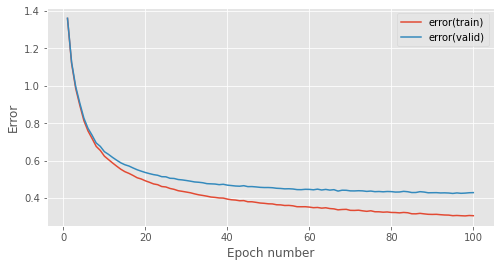

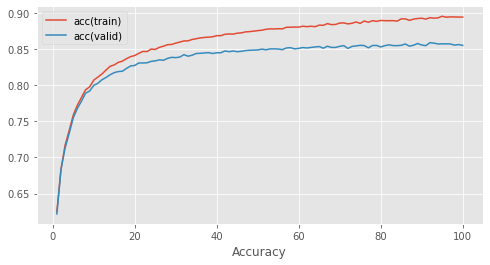

In [72]:
print("error(train):"+str(stats_dp99_L25e[1:, keys['error(train)']][99]))
print("error(valid):"+str(stats_dp99_L25e[1:, keys['error(valid)']][99]))
print("acc(train):"+str(stats_dp99_L25e[1:, keys['acc(train)']][99]))
print("acc(valid):"+str(stats_dp99_L25e[1:, keys['acc(valid)']][99]))

# Plot the change in the validation and training set error over training.
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for k in ['error(train)', 'error(valid)']:
    ax_1.plot(np.arange(1, stats_dp99_L25e.shape[0]) * stats_interval, 
              stats_dp99_L25e[1:, keys[k]], label=k)
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')
ax_1.set_ylabel('Error')
#     fig_1.savefig('width accuracy graph.png')

# Plot the change in the validation and training set accuracy over training.
fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)
for k in ['acc(train)', 'acc(valid)']:
    ax_2.plot(np.arange(1, stats_dp99_L25e.shape[0]) * stats_interval, 
              stats_dp99_L25e[1:, keys[k]], label=k)
ax_2.legend(loc=0)
ax_2.set_xlabel('Epoch number')
ax_2.set_xlabel('Accuracy')
#     fig_2.savefig('img2.png')